In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/codeforces-dataset/data.csv
/kaggle/input/embeddingsforcodeforces/embedding_cache.p


In [2]:
df = pd.read_csv("/kaggle/input/codeforces-dataset/data.csv")

In [3]:
df.head()

,contest,problem_name,problem_statement,problem_tags
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500"
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900"
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,..."


In [4]:
lst  = list(df["contest"])
print(max(lst), min(lst), len(set(lst)))

1549 1 1424


In [5]:
!pip install sentence-transformers

     |████████████████████████████████| 79 kB 338 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120748 sha256=eb8f74a6cd31f70142194ec9ab971f96860e45efcf93b9888815c46860687c78
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers


In [6]:
import re

def my_tokenize(text):
    return re.split("\.| |,|!|\$|\\n", text)

print(my_tokenize("Hello my name is Bogdan\nHi"))

['Hello', 'my', 'name', 'is', 'Bogdan', 'Hi']


In [7]:
import re
from collections import defaultdict

freq = defaultdict(int)
for text in df["problem_statement"]:
    if type(text) is not str:
        pass
    try:
        tokens = my_tokenize(text)
        for token in tokens:
            freq[token] += 1
    except Exception:
        print(f"Error on {text}")
pairs = list(freq.items())
pairs.sort(key=lambda t: t[1], reverse=True)
print("\n".join(str(pair) for pair in pairs[:10]))

Error on nan
Error on nan
Error on nan
Error on nan
Error on nan
Error on nan
Error on nan
('', 870170)
('the', 181003)
('of', 94305)
('to', 52856)
('is', 48457)
('and', 47960)
('a', 45875)
('in', 32840)
('The', 30264)
('that', 27760)


In [8]:
print("\n".join(str(pair) for pair in pairs[:1000]))

('', 870170)
('the', 181003)
('of', 94305)
('to', 52856)
('is', 48457)
('and', 47960)
('a', 45875)
('in', 32840)
('The', 30264)
('that', 27760)
('n', 27521)
('number', 24512)
('are', 22654)
('line', 20430)
('first', 19390)
('1', 19128)
('contains', 17557)
('one', 15220)
('can', 15123)
('integers', 14317)
('\\le', 14225)
('be', 14066)
('In', 13064)
('each', 12855)
('from', 12732)
('with', 11807)
('for', 11655)
('two', 11513)
('integer', 11052)
('it', 11011)
('on', 10885)
('you', 10870)
('second', 10859)
('all', 10520)
('will', 9884)
('if', 9765)
('—', 9301)
('at', 9262)
('by', 9011)
('he', 9003)
('2', 8491)
('there', 8424)
('has', 8415)
('(', 8311)
('an', 8052)
('as', 7999)
('not', 7916)
('print', 7454)
('i', 7361)
('test', 7334)
('m', 7322)
('or', 7159)
('this', 7087)
('any', 7045)
('k', 6973)
(')', 6956)
('string', 6657)
('single', 6418)
('example', 6325)
('have', 6220)
('only', 6213)
('given', 6185)
('lines', 6127)
('should', 6024)
('You', 6000)
('which', 5968)
('possible', 5957)
('I

In [9]:
tags = set()
nans = 0
for text in df["problem_tags"]:
    if type(text) is not str:
        pass
    try:
        tokens = text.split(",")
        for token in tokens:
            tags.add(token)
    except Exception:
        nans += 1
print(f"{nans} errors")
print(len(tags))

64 errors
65


In [10]:
filtered_tags = [tag for tag in tags if "*" not in tag]
print(filtered_tags)

['dsu', 'geometry', 'datastructures', 'bruteforce', 'constructivealgorithms', 'combinatorics', 'dp', 'sortings', 'dfsandsimilar', 'trees', 'fft', 'ternarysearch', '2-sat', 'games', 'implementation', 'interactive', 'schedules', 'bitmasks', 'binarysearch', 'flows', 'numbertheory', 'hashing', 'probabilities', 'stringsuffixstructures', 'math', 'divideandconquer', 'shortestpaths', 'twopointers', 'meet-in-the-middle', 'expressionparsing', 'graphmatchings', 'matrices', 'greedy', 'graphs', 'chineseremaindertheorem', 'strings']


In [11]:
!pip install tqdm

In [12]:
from tqdm import tqdm

for tag in tqdm(filtered_tags):
    df[tag] = df["problem_tags"].map(lambda tags: 1 if type(tags) == str  and tag in tags else 0)

100%|██████████| 36/36 [00:00<00:00, 133.00it/s]


In [13]:
df.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


contest                    786.816493
dsu                          0.029606
geometry                     0.041112
datastructures               0.154621
bruteforce                   0.140357
constructivealgorithms       0.141556
combinatorics                0.055256
dp                           0.200408
sortings                     0.090974
dfsandsimilar                0.086060
trees                        0.073954
fft                          0.007312
ternarysearch                0.006233
2-sat                        0.002997
games                        0.019298
implementation               0.266211
interactive                  0.017380
schedules                    0.000839
bitmasks                     0.041831
binarysearch                 0.094211
flows                        0.013065
numbertheory                 0.066403
hashing                      0.019178
probabilities                0.023493
stringsuffixstructures       0.008990
math                         0.242958
divideandcon

In [14]:
relevant_tokens = [
    'string', 
    'directed', 
    'undirected', 
    'array',
    'minimum',
    'game',
    'cell',
    'vertices',
    'distinct',
    'point',
    'graph',
    'characters',
    'queries',
    'path',
    'edge',
    'permutation',
    'possible',
    'order',
    'minimum',
    'first',
    'probability',
    'lexicographically'
]

In [15]:
print(relevant_tokens)

['string', 'directed', 'undirected', 'array', 'minimum', 'game', 'cell', 'vertices', 'distinct', 'point', 'graph', 'characters', 'queries', 'path', 'edge', 'permutation', 'possible', 'order', 'minimum', 'first', 'probability', 'lexicographically']


In [16]:
print(list(df.columns))

['contest', 'problem_name', 'problem_statement', 'problem_tags', 'dsu', 'geometry', 'datastructures', 'bruteforce', 'constructivealgorithms', 'combinatorics', 'dp', 'sortings', 'dfsandsimilar', 'trees', 'fft', 'ternarysearch', '2-sat', 'games', 'implementation', 'interactive', 'schedules', 'bitmasks', 'binarysearch', 'flows', 'numbertheory', 'hashing', 'probabilities', 'stringsuffixstructures', 'math', 'divideandconquer', 'shortestpaths', 'twopointers', 'meet-in-the-middle', 'expressionparsing', 'graphmatchings', 'matrices', 'greedy', 'graphs', 'chineseremaindertheorem', 'strings']


In [17]:
for token in tqdm(relevant_tokens):
    df[f"token_{token}"] = df["problem_statement"].map(lambda problem_statement: 1 if type(problem_statement) == str  and token in problem_statement else 0)

100%|██████████| 22/22 [00:00<00:00, 48.81it/s]


In [18]:
df.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


contest                    786.816493
dsu                          0.029606
geometry                     0.041112
datastructures               0.154621
bruteforce                   0.140357
constructivealgorithms       0.141556
combinatorics                0.055256
dp                           0.200408
sortings                     0.090974
dfsandsimilar                0.086060
trees                        0.073954
fft                          0.007312
ternarysearch                0.006233
2-sat                        0.002997
games                        0.019298
implementation               0.266211
interactive                  0.017380
schedules                    0.000839
bitmasks                     0.041831
binarysearch                 0.094211
flows                        0.013065
numbertheory                 0.066403
hashing                      0.019178
probabilities                0.023493
stringsuffixstructures       0.008990
math                         0.242958
divideandcon

In [19]:
print(len(set(df['contest'])))

1424


In [20]:
contests = list(set(df['contest']))
contests.sort()
print(contests[int(0.8*len(contests))])
print(contests[int(0.9*len(contests))])

1214
1367


In [21]:
non_features = filtered_tags + ['contest', 'problem_name', 'problem_statement', 'problem_tags']
features = [feature for feature in df.columns if feature not in non_features]
print(features)
split = 1214
split_val = 1367
df_train = df.loc[df['contest'] <= split]
df_val = df.loc[(split < df['contest']) & (df['contest'] <=split_val)]
df_test = df.loc[df['contest'] > split_val]
X_train, ys_train = df_train[features], df_train[filtered_tags]
X_val, ys_val = df_val[features], df_val[filtered_tags]
X_test, ys_test = df_test[features], df_test[filtered_tags]

['token_string', 'token_directed', 'token_undirected', 'token_array', 'token_minimum', 'token_game', 'token_cell', 'token_vertices', 'token_distinct', 'token_point', 'token_graph', 'token_characters', 'token_queries', 'token_path', 'token_edge', 'token_permutation', 'token_possible', 'token_order', 'token_first', 'token_probability', 'token_lexicographically']


In [22]:
print(X_val.shape, ys_val.shape)

(941, 21) (941, 36)


In [23]:
print(X_train.shape, ys_train.shape)

(6508, 21) (6508, 36)


In [24]:
df[features]

,token_string,token_directed,token_undirected,token_array,token_minimum,token_game,token_cell,token_vertices,token_distinct,token_point,...,token_characters,token_queries,token_path,token_edge,token_permutation,token_possible,token_order,token_first,token_probability,token_lexicographically
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8338,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8339,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
8340,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
8341,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [25]:
# df = df.head(50)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, mean_absolute_error, roc_auc_score, f1_score

label_to_model ={}
meta = {}
for target_label in filtered_tags:
    y_train = ys_train[target_label]
    y_test = ys_test[target_label]
    y_val = ys_val[target_label]
    best_f1 = -1
    best_depth = 0
    for max_depth in [2, 3, 5, 7, 10]:
        clf = DecisionTreeClassifier(random_state=12345, max_depth=max_depth)
        clf.fit(X_train, y_train)
        y_pred_val = clf.predict(X_val)
        try:
            f1 = f1_score(y_val, y_pred_val)
        except Exception as e:
            print(e)
            f1 = 0
        if f1 > best_f1:
            label_to_model[target_label] = clf
            best_f1 = f1
            best_depth = max_depth
            
    label_to_model[target_label] = clf
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    error = mean_absolute_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(target_label, precision, recall, 1 - error, "f1", f1, "best depth", best_depth)
    y_prob = clf.predict_proba(X_test)
    # print(y_prob)
    roc = roc_auc_score(y_test, y_prob[:,1])
    meta[target_label] = {"F1": f1, "roc": roc, "best_depth": best_depth}
    print("ROC:", roc)

dsu 0.0625 0.03333333333333333 0.9507829977628636 f1 0.04347826086956522 best depth 5
ROC: 0.5128472222222222
geometry 0.21428571428571427 0.09375 0.9552572706935123 f1 0.13043478260869562 best depth 3
ROC: 0.7548397621809744
datastructures 0.47368421052631576 0.13705583756345177 0.7762863534675615 f1 0.21259842519685038 best depth 10
ROC: 0.588577587776475
bruteforce 0.25 0.012658227848101266 0.8187919463087249 f1 0.024096385542168672 best depth 10
ROC: 0.5535265891579527
constructivealgorithms 0.45454545454545453 0.022026431718061675 0.7449664429530201 f1 0.04201680672268908 best depth 10
ROC: 0.5669940360216368
combinatorics 0.0 0.0 0.9284116331096197 f1 0.0 best depth 7
ROC: 0.5725058357860551
dp 0.25 0.03056768558951965 0.7281879194630873 f1 0.05447470817120622 best depth 10
ROC: 0.5480185179104967
sortings 0.2222222222222222 0.016129032258064516 0.8557046979865772 f1 0.03007518796992481 best depth 5
ROC: 0.619752827817344
dfsandsimilar 0.4782608695652174 0.14102564102564102 0.911

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2-sat 0.0 0.0 0.9932885906040269 f1 0.0 best depth 2
ROC: 0.5411974474474475
games 0.0 0.0 0.9519015659955258 f1 0.0 best depth 10
ROC: 0.7203226342923665
implementation 0.24242424242424243 0.03980099502487562 0.756152125279642 f1 0.06837606837606837 best depth 7
ROC: 0.5554335106573912
interactive 0.3333333333333333 0.07317073170731707 0.9507829977628636 f1 0.12 best depth 5
ROC: 0.611400223029194


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_cl

schedules 0.0 0.0 0.9988814317673378 f1 0.0 best depth 2
ROC: 0.4955207166853303
bitmasks 0.0 0.0 0.9295302013422819 f1 0.0 best depth 2
ROC: 0.5544364508393286
binarysearch 0.2222222222222222 0.01652892561983471 0.8590604026845637 f1 0.03076923076923077 best depth 5
ROC: 0.6155955652015866
flows 0.3333333333333333 0.05 0.9765100671140939 f1 0.08695652173913045 best depth 2
ROC: 0.4970823798627002
numbertheory 0.0 0.0 0.9149888143176734 f1 0.0 best depth 2
ROC: 0.6362842914106754
hashing 0.3333333333333333 0.1 0.9753914988814317 f1 0.15384615384615383 best depth 2
ROC: 0.5457379862700229
probabilities 0.45454545454545453 0.2777777777777778 0.9787472035794184 f1 0.3448275862068966 best depth 2
ROC: 0.6256024860476916
stringsuffixstructures 0.6666666666666666 0.25 0.9921700223713646 f1 0.36363636363636365 best depth 2
ROC: 0.7315180586907448
math 0.3611111111111111 0.0436241610738255 0.6554809843400448 f1 0.07784431137724551 best depth 10
ROC: 0.574748885185352
divideandconquer 0.0 0.0 0

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


greedy 0.45454545454545453 0.04285714285714286 0.6051454138702461 f1 0.0783289817232376 best depth 10
ROC: 0.6147794117647059
graphs 0.5454545454545454 0.2631578947368421 0.8780760626398211 f1 0.35502958579881655 best depth 10
ROC: 0.6411381016644174
chineseremaindertheorem 0.0 0.0 0.9977628635346756 f1 0.0 best depth 2
ROC: 0.3789237668161435
strings 0.16666666666666666 0.046153846153846156 0.9138702460850112 f1 0.07228915662650603 best depth 5
ROC: 0.828226779252111


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import json

json.dump(meta, open("decision_tree_info.json","w"))

[Text(220.35243932038836, 207.55636363636364, 'X[7] <= 0.5\ngini = 0.134\nsamples = 6508\nvalue = [6038, 470]'),
 Text(164.08856796116507, 187.7890909090909, 'X[13] <= 0.5\ngini = 0.088\nsamples = 6035\nvalue = [5757, 278]'),
 Text(119.71944174757282, 168.0218181818182, 'X[2] <= 0.5\ngini = 0.062\nsamples = 5694\nvalue = [5511, 183]'),
 Text(93.16703883495146, 148.25454545454545, 'X[14] <= 0.5\ngini = 0.058\nsamples = 5667\nvalue = [5499, 168]'),
 Text(60.70281553398058, 128.48727272727274, 'X[12] <= 0.5\ngini = 0.054\nsamples = 5525\nvalue = [5371, 154]'),
 Text(32.50485436893204, 108.72, 'X[16] <= 0.5\ngini = 0.049\nsamples = 5151\nvalue = [5022, 129]'),
 Text(18.202718446601942, 88.95272727272729, 'X[9] <= 0.5\ngini = 0.04\nsamples = 2948\nvalue = [2888, 60]'),
 Text(10.401553398058253, 69.18545454545455, 'X[4] <= 0.5\ngini = 0.044\nsamples = 2508\nvalue = [2451, 57]'),
 Text(5.200776699029126, 49.418181818181836, 'X[18] <= 0.5\ngini = 0.04\nsamples = 2100\nvalue = [2057, 43]'),
 Te

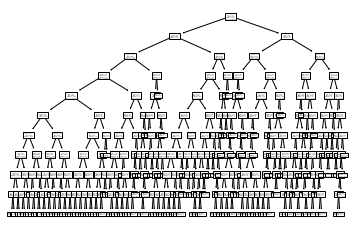

In [28]:
from sklearn.tree import plot_tree

plot_tree(label_to_model['trees'])

In [29]:
!mkdir models

In [30]:
import pickle

for label, model in label_to_model.items():
    with open(f"models/{label}.p", "wb") as f:
        pickle.dump(model, f)

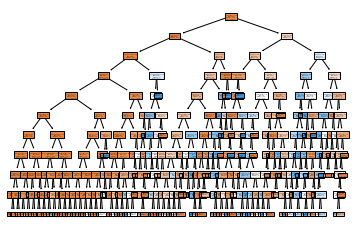

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plot_tree(label_to_model['trees'],filled=True, feature_names=features)  
plt.savefig('tree.jpg',format='jpg',bbox_inches = "tight", dpi=3000)

In [32]:
os.listdir()

['decision_tree_info.json', 'models', 'tree.jpg', '__notebook__.ipynb']

In [33]:
from sklearn.metrics import plot_roc_curve

def evaluate(label):
    model = label_to_model[label]
    plot_roc_curve(model, X_test, ys_test[label])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


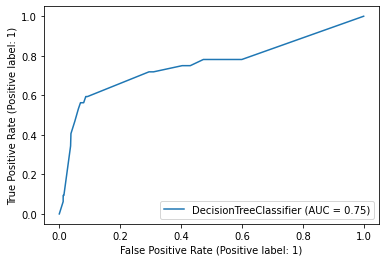

In [34]:
evaluate("geometry")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


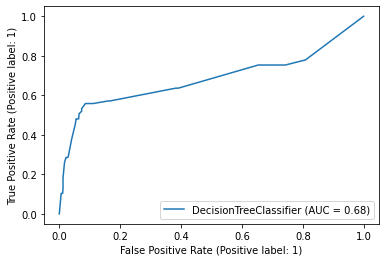

In [35]:
evaluate("trees")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


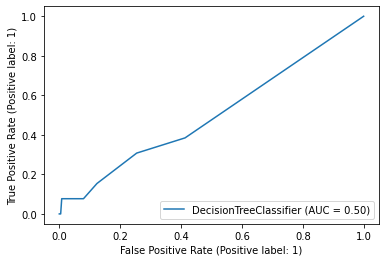

In [36]:
evaluate("fft")

In [37]:
!pip install sentence_transformers

In [38]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [39]:
import pickle

recompute = True
try:
    with open("../input/embeddingsforcodeforces/embedding_cache.p", "rb") as f:
        id_to_embedding = pickle.load(f)
        if id_to_embedding:
            recompute = False
except Exception as e:
    print("Couldn't read:", e)

In [40]:
rows = df_train.to_dict(orient='index').values()

In [41]:
all_rows = df.to_dict(orient='index').values()

In [42]:
from tqdm import tqdm
recompute = True
if recompute:
    id_to_embedding = {}
    all_rows = df.to_dict(orient='index').values()
    for row in tqdm(all_rows):
        id_to_embedding[(row['contest'], row['problem_name'])] = sentence_model.encode(str(row['problem_statement']), show_progress_bar=False)

100%|██████████| 8343/8343 [11:09<00:00, 12.45it/s]


In [43]:
with open("embedding_cache.p", "wb") as f:
    pickle.dump(id_to_embedding, f)

In [44]:
print(len(id_to_embedding))

8343


In [45]:
print(str(id_to_embedding.keys())[:100])

dict_keys([(325, 'A'), (325, 'B'), (325, 'C'), (325, 'D'), (325, 'E'), (1, 'A'), (1, 'B'), (1, 'C'),


In [46]:
print(len(id_to_embedding[(325, 'A')]))

384


In [47]:
import pickle

recompute_graph = True

try:
    with open("graph_cache.p", "rb") as f:
        adj = pickle.load(f)
        if id_to_embedding:
            recompute_graph = False
except Exception as e:
        print("Couldn't read:", e)

Couldn't read: [Errno 2] No such file or directory: 'graph_cache.p'


In [48]:
valid_rows = [row for row in all_rows if split<row['contest']<split_val]
test_rows = [row for row in all_rows if split_val<=row['contest']]
validtest_rows =  valid_rows + test_rows

In [49]:
#print([row['contest'] for row in rows])

In [50]:
print(len(validtest_rows), len(valid_rows))

1835 934


In [51]:
from sentence_transformers import util

def get_key(row):
    return (row['contest'], row['problem_name'])
print("ok")
if recompute_graph:
    adj = {}
    for row in tqdm(list(validtest_rows)):
        key = get_key(row)
        print(key)
        neighs = []
        for other_row in rows:
            other_key = get_key(other_row)
            if other_key[0] < key[0]:
                neighs.append((other_key, util.cos_sim(id_to_embedding[key], id_to_embedding[key])))
        neighs.sort(key=lambda pair: pair[1], reverse=True)
        adj[key] = [pair[0] for pair in neighs[:100]]

ok


  0%|          | 0/1835 [00:00<?, ?it/s]

(1348, 'A')


  0%|          | 1/1835 [00:00<17:23,  1.76it/s]

(1348, 'B')


  0%|          | 2/1835 [00:01<17:45,  1.72it/s]

(1348, 'C')


  0%|          | 3/1835 [00:02<21:58,  1.39it/s]

(1348, 'D')


  0%|          | 4/1835 [00:02<20:09,  1.51it/s]

(1348, 'E')


  0%|          | 5/1835 [00:03<19:11,  1.59it/s]

(1348, 'F')


  0%|          | 6/1835 [00:03<18:33,  1.64it/s]

(1349, 'A')


  0%|          | 7/1835 [00:04<18:00,  1.69it/s]

(1349, 'B')


  0%|          | 8/1835 [00:04<17:49,  1.71it/s]

(1349, 'C')


  0%|          | 9/1835 [00:05<18:07,  1.68it/s]

(1349, 'D')


  1%|          | 10/1835 [00:06<18:22,  1.65it/s]

(1349, 'E')


  1%|          | 11/1835 [00:06<18:08,  1.68it/s]

(1349, 'F1')


  1%|          | 12/1835 [00:07<18:01,  1.69it/s]

(1349, 'F2')


  1%|          | 13/1835 [00:07<17:57,  1.69it/s]

(1350, 'A')


  1%|          | 14/1835 [00:08<17:44,  1.71it/s]

(1350, 'B')


  1%|          | 15/1835 [00:09<19:27,  1.56it/s]

(1350, 'C')


  1%|          | 16/1835 [00:09<18:48,  1.61it/s]

(1350, 'D')


  1%|          | 17/1835 [00:10<18:20,  1.65it/s]

(1350, 'E')


  1%|          | 18/1835 [00:10<17:56,  1.69it/s]

(1350, 'F')


  1%|          | 19/1835 [00:11<17:43,  1.71it/s]

(1351, 'A')


  1%|          | 20/1835 [00:12<17:34,  1.72it/s]

(1351, 'B')


  1%|          | 21/1835 [00:12<17:22,  1.74it/s]

(1351, 'C')


  1%|          | 22/1835 [00:13<17:18,  1.75it/s]

(1352, 'A')


  1%|▏         | 23/1835 [00:13<17:07,  1.76it/s]

(1352, 'B')


  1%|▏         | 24/1835 [00:14<16:59,  1.78it/s]

(1352, 'C')


  1%|▏         | 25/1835 [00:14<16:59,  1.78it/s]

(1352, 'D')


  1%|▏         | 26/1835 [00:15<16:56,  1.78it/s]

(1352, 'E')


  1%|▏         | 27/1835 [00:16<18:56,  1.59it/s]

(1352, 'F')


  2%|▏         | 28/1835 [00:16<18:47,  1.60it/s]

(1352, 'G')


  2%|▏         | 29/1835 [00:17<18:25,  1.63it/s]

(1353, 'A')


  2%|▏         | 30/1835 [00:17<17:55,  1.68it/s]

(1353, 'B')


  2%|▏         | 31/1835 [00:18<17:39,  1.70it/s]

(1353, 'C')


  2%|▏         | 32/1835 [00:19<17:34,  1.71it/s]

(1353, 'D')


  2%|▏         | 33/1835 [00:19<17:29,  1.72it/s]

(1353, 'E')


  2%|▏         | 34/1835 [00:20<17:22,  1.73it/s]

(1353, 'F')


  2%|▏         | 35/1835 [00:20<17:11,  1.75it/s]

(1354, 'A')


  2%|▏         | 36/1835 [00:21<17:04,  1.76it/s]

(1354, 'B')


  2%|▏         | 37/1835 [00:21<16:55,  1.77it/s]

(1354, 'C1')


  2%|▏         | 38/1835 [00:22<16:52,  1.77it/s]

(1354, 'C2')


  2%|▏         | 39/1835 [00:23<18:41,  1.60it/s]

(1354, 'D')


  2%|▏         | 40/1835 [00:23<18:01,  1.66it/s]

(1354, 'E')


  2%|▏         | 41/1835 [00:24<17:40,  1.69it/s]

(1354, 'F')


  2%|▏         | 42/1835 [00:24<17:35,  1.70it/s]

(1354, 'G')


  2%|▏         | 43/1835 [00:25<17:23,  1.72it/s]

(1355, 'A')


  2%|▏         | 44/1835 [00:26<17:12,  1.74it/s]

(1355, 'B')


  2%|▏         | 45/1835 [00:26<16:58,  1.76it/s]

(1355, 'C')


  3%|▎         | 46/1835 [00:27<16:55,  1.76it/s]

(1355, 'D')


  3%|▎         | 47/1835 [00:27<17:08,  1.74it/s]

(1355, 'E')


  3%|▎         | 48/1835 [00:28<16:59,  1.75it/s]

(1355, 'F')


  3%|▎         | 49/1835 [00:28<16:51,  1.77it/s]

(1356, 'A1')


  3%|▎         | 50/1835 [00:29<16:40,  1.78it/s]

(1356, 'A2')


  3%|▎         | 51/1835 [00:30<18:33,  1.60it/s]

(1356, 'A3')


  3%|▎         | 52/1835 [00:30<18:11,  1.63it/s]

(1356, 'A4')


  3%|▎         | 53/1835 [00:31<17:54,  1.66it/s]

(1356, 'A5')


  3%|▎         | 54/1835 [00:31<17:36,  1.69it/s]

(1356, 'B1')


  3%|▎         | 55/1835 [00:32<17:17,  1.72it/s]

(1356, 'B2')


  3%|▎         | 56/1835 [00:33<17:08,  1.73it/s]

(1356, 'C')


  3%|▎         | 57/1835 [00:33<17:00,  1.74it/s]

(1356, 'D1')


  3%|▎         | 58/1835 [00:34<16:55,  1.75it/s]

(1356, 'D2')


  3%|▎         | 59/1835 [00:34<16:47,  1.76it/s]

(1357, 'A1')


  3%|▎         | 60/1835 [00:35<16:48,  1.76it/s]

(1357, 'A2')


  3%|▎         | 61/1835 [00:35<16:42,  1.77it/s]

(1357, 'A3')


  3%|▎         | 62/1835 [00:36<16:37,  1.78it/s]

(1357, 'A4')


  3%|▎         | 63/1835 [00:37<18:25,  1.60it/s]

(1357, 'A5')


  3%|▎         | 64/1835 [00:37<17:50,  1.66it/s]

(1357, 'A6')


  4%|▎         | 65/1835 [00:38<17:21,  1.70it/s]

(1357, 'A7')


  4%|▎         | 66/1835 [00:38<17:45,  1.66it/s]

(1357, 'B1')


  4%|▎         | 67/1835 [00:39<17:26,  1.69it/s]

(1357, 'B2')


  4%|▎         | 68/1835 [00:40<17:11,  1.71it/s]

(1357, 'C1')


  4%|▍         | 69/1835 [00:40<16:52,  1.74it/s]

(1357, 'C2')


  4%|▍         | 70/1835 [00:41<16:42,  1.76it/s]

(1357, 'D1')


  4%|▍         | 71/1835 [00:41<16:33,  1.78it/s]

(1357, 'D2')


  4%|▍         | 72/1835 [00:42<16:26,  1.79it/s]

(1357, 'D3')


  4%|▍         | 73/1835 [00:42<16:27,  1.78it/s]

(1357, 'D4')


  4%|▍         | 74/1835 [00:43<16:25,  1.79it/s]

(1357, 'D5')


  4%|▍         | 75/1835 [00:44<18:14,  1.61it/s]

(1357, 'E1')


  4%|▍         | 76/1835 [00:44<17:44,  1.65it/s]

(1357, 'E2')


  4%|▍         | 77/1835 [00:45<17:19,  1.69it/s]

(1358, 'A')


  4%|▍         | 78/1835 [00:45<16:57,  1.73it/s]

(1358, 'B')


  4%|▍         | 79/1835 [00:46<16:48,  1.74it/s]

(1358, 'C')


  4%|▍         | 80/1835 [00:47<16:42,  1.75it/s]

(1358, 'D')


  4%|▍         | 81/1835 [00:47<16:36,  1.76it/s]

(1358, 'E')


  4%|▍         | 82/1835 [00:48<16:28,  1.77it/s]

(1358, 'F')


  5%|▍         | 83/1835 [00:48<16:22,  1.78it/s]

(1359, 'A')


  5%|▍         | 84/1835 [00:49<16:20,  1.79it/s]

(1359, 'B')


  5%|▍         | 85/1835 [00:49<16:31,  1.77it/s]

(1359, 'C')


  5%|▍         | 86/1835 [00:50<16:27,  1.77it/s]

(1359, 'D')


  5%|▍         | 87/1835 [00:51<18:13,  1.60it/s]

(1359, 'E')


  5%|▍         | 88/1835 [00:51<17:38,  1.65it/s]

(1359, 'F')


  5%|▍         | 89/1835 [00:52<17:16,  1.68it/s]

(1360, 'A')


  5%|▍         | 90/1835 [00:52<16:57,  1.72it/s]

(1360, 'B')


  5%|▍         | 91/1835 [00:53<16:42,  1.74it/s]

(1360, 'C')


  5%|▌         | 92/1835 [00:53<16:33,  1.75it/s]

(1360, 'D')


  5%|▌         | 93/1835 [00:54<16:24,  1.77it/s]

(1360, 'E')


  5%|▌         | 94/1835 [00:55<16:21,  1.77it/s]

(1360, 'F')


  5%|▌         | 95/1835 [00:55<16:14,  1.78it/s]

(1360, 'G')


  5%|▌         | 96/1835 [00:56<16:13,  1.79it/s]

(1360, 'H')


  5%|▌         | 97/1835 [00:56<16:08,  1.79it/s]

(1361, 'A')


  5%|▌         | 98/1835 [00:57<16:14,  1.78it/s]

(1361, 'B')


  5%|▌         | 99/1835 [00:58<18:00,  1.61it/s]

(1361, 'C')


  5%|▌         | 100/1835 [00:58<17:23,  1.66it/s]

(1361, 'D')


  6%|▌         | 101/1835 [00:59<16:57,  1.70it/s]

(1361, 'E')


  6%|▌         | 102/1835 [00:59<16:40,  1.73it/s]

(1361, 'F')


  6%|▌         | 103/1835 [01:00<16:30,  1.75it/s]

(1362, 'A')


  6%|▌         | 104/1835 [01:00<16:41,  1.73it/s]

(1362, 'B')


  6%|▌         | 105/1835 [01:01<16:28,  1.75it/s]

(1362, 'C')


  6%|▌         | 106/1835 [01:01<16:22,  1.76it/s]

(1362, 'D')


  6%|▌         | 107/1835 [01:02<16:24,  1.76it/s]

(1362, 'E')


  6%|▌         | 108/1835 [01:03<16:22,  1.76it/s]

(1362, 'F')


  6%|▌         | 109/1835 [01:03<16:19,  1.76it/s]

(1363, 'A')


  6%|▌         | 110/1835 [01:04<16:22,  1.76it/s]

(1363, 'B')


  6%|▌         | 111/1835 [01:05<18:10,  1.58it/s]

(1363, 'C')


  6%|▌         | 112/1835 [01:05<17:34,  1.63it/s]

(1363, 'D')


  6%|▌         | 113/1835 [01:06<17:12,  1.67it/s]

(1363, 'E')


  6%|▌         | 114/1835 [01:06<16:55,  1.69it/s]

(1363, 'F')


  6%|▋         | 115/1835 [01:07<16:42,  1.72it/s]

(1364, 'A')


  6%|▋         | 116/1835 [01:07<16:27,  1.74it/s]

(1364, 'B')


  6%|▋         | 117/1835 [01:08<16:18,  1.76it/s]

(1364, 'C')


  6%|▋         | 118/1835 [01:08<16:17,  1.76it/s]

(1364, 'D')


  6%|▋         | 119/1835 [01:09<16:13,  1.76it/s]

(1364, 'E')


  7%|▋         | 120/1835 [01:10<16:10,  1.77it/s]

(1365, 'A')


  7%|▋         | 121/1835 [01:10<16:10,  1.77it/s]

(1365, 'B')


  7%|▋         | 122/1835 [01:11<16:08,  1.77it/s]

(1365, 'C')


  7%|▋         | 123/1835 [01:12<18:24,  1.55it/s]

(1365, 'D')


  7%|▋         | 124/1835 [01:12<18:04,  1.58it/s]

(1365, 'E')


  7%|▋         | 125/1835 [01:13<17:23,  1.64it/s]

(1365, 'F')


  7%|▋         | 126/1835 [01:13<16:53,  1.69it/s]

(1365, 'G')


  7%|▋         | 127/1835 [01:14<16:35,  1.72it/s]

(1366, 'A')


  7%|▋         | 128/1835 [01:14<16:32,  1.72it/s]

(1366, 'B')


  7%|▋         | 129/1835 [01:15<16:22,  1.74it/s]

(1366, 'C')


  7%|▋         | 130/1835 [01:16<16:23,  1.73it/s]

(1366, 'D')


  7%|▋         | 131/1835 [01:16<16:11,  1.75it/s]

(1366, 'E')


  7%|▋         | 132/1835 [01:17<16:15,  1.75it/s]

(1366, 'F')


  7%|▋         | 133/1835 [01:17<16:22,  1.73it/s]

(1366, 'G')


  7%|▋         | 134/1835 [01:18<16:26,  1.72it/s]

(1220, 'A')


  7%|▋         | 135/1835 [01:19<18:15,  1.55it/s]

(1220, 'B')


  7%|▋         | 136/1835 [01:19<17:32,  1.61it/s]

(1220, 'C')


  7%|▋         | 137/1835 [01:20<17:06,  1.65it/s]

(1220, 'D')


  8%|▊         | 138/1835 [01:20<16:37,  1.70it/s]

(1220, 'E')


  8%|▊         | 139/1835 [01:21<16:24,  1.72it/s]

(1220, 'F')


  8%|▊         | 140/1835 [01:21<16:14,  1.74it/s]

(1220, 'G')


  8%|▊         | 141/1835 [01:22<16:16,  1.73it/s]

(1245, 'A')


  8%|▊         | 142/1835 [01:23<16:07,  1.75it/s]

(1245, 'B')


  8%|▊         | 143/1835 [01:23<15:59,  1.76it/s]

(1245, 'C')


  8%|▊         | 144/1835 [01:24<15:53,  1.77it/s]

(1245, 'D')


  8%|▊         | 145/1835 [01:24<15:54,  1.77it/s]

(1245, 'E')


  8%|▊         | 146/1835 [01:25<16:04,  1.75it/s]

(1245, 'F')


  8%|▊         | 147/1835 [01:26<17:50,  1.58it/s]

(1272, 'A')


  8%|▊         | 148/1835 [01:26<17:09,  1.64it/s]

(1272, 'B')


  8%|▊         | 149/1835 [01:27<16:43,  1.68it/s]

(1272, 'C')


  8%|▊         | 150/1835 [01:27<16:26,  1.71it/s]

(1272, 'D')


  8%|▊         | 151/1835 [01:28<16:12,  1.73it/s]

(1272, 'E')


  8%|▊         | 152/1835 [01:28<16:04,  1.74it/s]

(1272, 'F')


  8%|▊         | 153/1835 [01:29<15:53,  1.76it/s]

(1310, 'A')


  8%|▊         | 154/1835 [01:30<15:50,  1.77it/s]

(1310, 'B')


  8%|▊         | 155/1835 [01:30<15:54,  1.76it/s]

(1310, 'C')


  9%|▊         | 156/1835 [01:31<15:56,  1.76it/s]

(1310, 'D')


  9%|▊         | 157/1835 [01:31<15:53,  1.76it/s]

(1310, 'E')


  9%|▊         | 158/1835 [01:32<15:48,  1.77it/s]

(1310, 'F')


  9%|▊         | 159/1835 [01:33<17:34,  1.59it/s]

(1347, 'A')


  9%|▊         | 160/1835 [01:33<17:08,  1.63it/s]

(1347, 'B')


  9%|▉         | 161/1835 [01:34<16:40,  1.67it/s]

(1347, 'C')


  9%|▉         | 162/1835 [01:34<16:28,  1.69it/s]

(1347, 'D')


  9%|▉         | 163/1835 [01:35<16:28,  1.69it/s]

(1347, 'E')


  9%|▉         | 164/1835 [01:36<16:28,  1.69it/s]

(1215, 'A')


  9%|▉         | 165/1835 [01:36<16:15,  1.71it/s]

(1215, 'B')


  9%|▉         | 166/1835 [01:37<16:03,  1.73it/s]

(1215, 'C')


  9%|▉         | 167/1835 [01:37<15:57,  1.74it/s]

(1215, 'D')


  9%|▉         | 168/1835 [01:38<15:52,  1.75it/s]

(1215, 'E')


  9%|▉         | 169/1835 [01:38<15:50,  1.75it/s]

(1215, 'F')


  9%|▉         | 170/1835 [01:39<15:46,  1.76it/s]

(1216, 'A')


  9%|▉         | 171/1835 [01:40<17:29,  1.59it/s]

(1216, 'B')


  9%|▉         | 172/1835 [01:40<16:56,  1.64it/s]

(1216, 'C')


  9%|▉         | 173/1835 [01:41<16:32,  1.68it/s]

(1216, 'D')


  9%|▉         | 174/1835 [01:41<16:10,  1.71it/s]

(1216, 'E1')


 10%|▉         | 175/1835 [01:42<15:54,  1.74it/s]

(1216, 'E2')


 10%|▉         | 176/1835 [01:42<15:49,  1.75it/s]

(1216, 'F')


 10%|▉         | 177/1835 [01:43<15:42,  1.76it/s]

(1217, 'A')


 10%|▉         | 178/1835 [01:44<15:39,  1.76it/s]

(1217, 'B')


 10%|▉         | 179/1835 [01:44<15:53,  1.74it/s]

(1217, 'C')


 10%|▉         | 180/1835 [01:45<16:12,  1.70it/s]

(1217, 'D')


 10%|▉         | 181/1835 [01:45<16:35,  1.66it/s]

(1217, 'E')


 10%|▉         | 182/1835 [01:46<16:30,  1.67it/s]

(1217, 'F')


 10%|▉         | 183/1835 [01:47<18:16,  1.51it/s]

(1218, 'A')


 10%|█         | 184/1835 [01:47<17:21,  1.59it/s]

(1218, 'B')


 10%|█         | 185/1835 [01:48<16:42,  1.65it/s]

(1218, 'C')


 10%|█         | 186/1835 [01:49<16:16,  1.69it/s]

(1218, 'D')


 10%|█         | 187/1835 [01:49<16:03,  1.71it/s]

(1218, 'E')


 10%|█         | 188/1835 [01:50<15:49,  1.73it/s]

(1218, 'F')


 10%|█         | 189/1835 [01:50<15:39,  1.75it/s]

(1218, 'G')


 10%|█         | 190/1835 [01:51<15:31,  1.77it/s]

(1218, 'H')


 10%|█         | 191/1835 [01:51<15:24,  1.78it/s]

(1218, 'I')


 10%|█         | 192/1835 [01:52<15:20,  1.78it/s]

(1219, 'A')


 11%|█         | 193/1835 [01:52<15:21,  1.78it/s]

(1219, 'B')


 11%|█         | 194/1835 [01:53<15:20,  1.78it/s]

(1219, 'C')


 11%|█         | 195/1835 [01:54<16:58,  1.61it/s]

(1219, 'D')


 11%|█         | 196/1835 [01:54<16:27,  1.66it/s]

(1219, 'E')


 11%|█         | 197/1835 [01:55<16:11,  1.69it/s]

(1219, 'F')


 11%|█         | 198/1835 [01:55<16:08,  1.69it/s]

(1219, 'G')


 11%|█         | 199/1835 [01:56<15:50,  1.72it/s]

(1219, 'H')


 11%|█         | 200/1835 [01:57<15:45,  1.73it/s]

(1219, 'I')


 11%|█         | 201/1835 [01:57<15:37,  1.74it/s]

(1273, 'A')


 11%|█         | 202/1835 [01:58<15:30,  1.76it/s]

(1273, 'B')


 11%|█         | 203/1835 [01:58<15:22,  1.77it/s]

(1273, 'C')


 11%|█         | 204/1835 [01:59<15:15,  1.78it/s]

(1273, 'D')


 11%|█         | 205/1835 [01:59<15:13,  1.79it/s]

(1274, 'A')


 11%|█         | 206/1835 [02:00<15:15,  1.78it/s]

(1274, 'B')


 11%|█▏        | 207/1835 [02:01<17:00,  1.60it/s]

(1275, 'A')


 11%|█▏        | 208/1835 [02:01<16:25,  1.65it/s]

(1275, 'B')


 11%|█▏        | 209/1835 [02:02<16:04,  1.69it/s]

(1275, 'C')


 11%|█▏        | 210/1835 [02:02<15:52,  1.71it/s]

(1275, 'D')


 11%|█▏        | 211/1835 [02:03<15:35,  1.74it/s]

(1275, 'E1')


 12%|█▏        | 212/1835 [02:04<15:24,  1.75it/s]

(1275, 'E2')


 12%|█▏        | 213/1835 [02:04<15:14,  1.77it/s]

(1275, 'E3')


 12%|█▏        | 214/1835 [02:05<15:13,  1.77it/s]

(1275, 'F')


 12%|█▏        | 215/1835 [02:05<15:09,  1.78it/s]

(1276, 'A')


 12%|█▏        | 216/1835 [02:06<15:09,  1.78it/s]

(1276, 'B')


 12%|█▏        | 217/1835 [02:06<16:00,  1.68it/s]

(1276, 'C')


 12%|█▏        | 218/1835 [02:07<16:08,  1.67it/s]

(1276, 'D')


 12%|█▏        | 219/1835 [02:08<18:03,  1.49it/s]

(1276, 'E')


 12%|█▏        | 220/1835 [02:08<17:29,  1.54it/s]

(1276, 'F')


 12%|█▏        | 221/1835 [02:09<17:12,  1.56it/s]

(1277, 'A')


 12%|█▏        | 222/1835 [02:10<16:56,  1.59it/s]

(1277, 'B')


 12%|█▏        | 223/1835 [02:10<16:44,  1.61it/s]

(1277, 'C')


 12%|█▏        | 224/1835 [02:11<16:19,  1.65it/s]

(1277, 'D')


 12%|█▏        | 225/1835 [02:11<16:03,  1.67it/s]

(1277, 'E')


 12%|█▏        | 226/1835 [02:12<15:51,  1.69it/s]

(1277, 'F')


 12%|█▏        | 227/1835 [02:13<15:39,  1.71it/s]

(1278, 'A')


 12%|█▏        | 228/1835 [02:13<15:24,  1.74it/s]

(1278, 'B')


 12%|█▏        | 229/1835 [02:14<15:14,  1.76it/s]

(1278, 'C')


 13%|█▎        | 230/1835 [02:14<15:13,  1.76it/s]

(1278, 'D')


 13%|█▎        | 231/1835 [02:15<16:55,  1.58it/s]

(1278, 'E')


 13%|█▎        | 232/1835 [02:16<16:34,  1.61it/s]

(1278, 'F')


 13%|█▎        | 233/1835 [02:16<16:18,  1.64it/s]

(1279, 'A')


 13%|█▎        | 234/1835 [02:17<16:08,  1.65it/s]

(1279, 'B')


 13%|█▎        | 235/1835 [02:17<16:23,  1.63it/s]

(1279, 'C')


 13%|█▎        | 236/1835 [02:18<16:16,  1.64it/s]

(1279, 'D')


 13%|█▎        | 237/1835 [02:19<16:00,  1.66it/s]

(1279, 'E')


 13%|█▎        | 238/1835 [02:19<15:45,  1.69it/s]

(1279, 'F')


 13%|█▎        | 239/1835 [02:20<15:42,  1.69it/s]

(1280, 'A')


 13%|█▎        | 240/1835 [02:20<15:32,  1.71it/s]

(1280, 'B')


 13%|█▎        | 241/1835 [02:21<15:24,  1.72it/s]

(1280, 'C')


 13%|█▎        | 242/1835 [02:22<15:24,  1.72it/s]

(1280, 'D')


 13%|█▎        | 243/1835 [02:22<15:14,  1.74it/s]

(1280, 'E')


 13%|█▎        | 244/1835 [02:23<16:45,  1.58it/s]

(1280, 'F')


 13%|█▎        | 245/1835 [02:23<16:08,  1.64it/s]

(1281, 'A')


 13%|█▎        | 246/1835 [02:24<15:43,  1.68it/s]

(1281, 'B')


 13%|█▎        | 247/1835 [02:25<15:32,  1.70it/s]

(1281, 'C')


 14%|█▎        | 248/1835 [02:25<15:19,  1.73it/s]

(1281, 'D')


 14%|█▎        | 249/1835 [02:26<15:10,  1.74it/s]

(1281, 'E')


 14%|█▎        | 250/1835 [02:26<15:01,  1.76it/s]

(1281, 'F')


 14%|█▎        | 251/1835 [02:27<14:57,  1.77it/s]

(1282, 'A')


 14%|█▎        | 252/1835 [02:27<15:02,  1.75it/s]

(1282, 'B1')


 14%|█▍        | 253/1835 [02:28<15:01,  1.75it/s]

(1282, 'B2')


 14%|█▍        | 254/1835 [02:29<15:02,  1.75it/s]

(1282, 'C')


 14%|█▍        | 255/1835 [02:29<14:58,  1.76it/s]

(1282, 'D')


 14%|█▍        | 256/1835 [02:30<16:26,  1.60it/s]

(1282, 'E')


 14%|█▍        | 257/1835 [02:30<15:53,  1.66it/s]

(1283, 'A')


 14%|█▍        | 258/1835 [02:31<15:33,  1.69it/s]

(1283, 'B')


 14%|█▍        | 259/1835 [02:32<15:14,  1.72it/s]

(1283, 'C')


 14%|█▍        | 260/1835 [02:32<15:04,  1.74it/s]

(1283, 'D')


 14%|█▍        | 261/1835 [02:33<14:56,  1.76it/s]

(1283, 'E')


 14%|█▍        | 262/1835 [02:33<14:47,  1.77it/s]

(1283, 'F')


 14%|█▍        | 263/1835 [02:34<14:43,  1.78it/s]

(1284, 'A')


 14%|█▍        | 264/1835 [02:34<14:41,  1.78it/s]

(1284, 'B')


 14%|█▍        | 265/1835 [02:35<14:39,  1.78it/s]

(1284, 'C')


 14%|█▍        | 266/1835 [02:35<14:45,  1.77it/s]

(1284, 'D')


 15%|█▍        | 267/1835 [02:36<14:48,  1.76it/s]

(1284, 'E')


 15%|█▍        | 268/1835 [02:37<16:25,  1.59it/s]

(1284, 'F')


 15%|█▍        | 269/1835 [02:37<15:47,  1.65it/s]

(1284, 'G')


 15%|█▍        | 270/1835 [02:38<15:23,  1.69it/s]

(1285, 'A')


 15%|█▍        | 271/1835 [02:38<15:12,  1.71it/s]

(1285, 'B')


 15%|█▍        | 272/1835 [02:39<15:26,  1.69it/s]

(1285, 'C')


 15%|█▍        | 273/1835 [02:40<15:17,  1.70it/s]

(1285, 'D')


 15%|█▍        | 274/1835 [02:40<15:05,  1.72it/s]

(1285, 'E')


 15%|█▍        | 275/1835 [02:41<14:54,  1.74it/s]

(1285, 'F')


 15%|█▌        | 276/1835 [02:41<14:46,  1.76it/s]

(1286, 'A')


 15%|█▌        | 277/1835 [02:42<14:44,  1.76it/s]

(1286, 'B')


 15%|█▌        | 278/1835 [02:42<14:46,  1.76it/s]

(1286, 'C1')


 15%|█▌        | 279/1835 [02:43<14:43,  1.76it/s]

(1286, 'C2')


 15%|█▌        | 280/1835 [02:44<16:16,  1.59it/s]

(1286, 'D')


 15%|█▌        | 281/1835 [02:44<15:53,  1.63it/s]

(1286, 'E')


 15%|█▌        | 282/1835 [02:45<15:31,  1.67it/s]

(1286, 'F')


 15%|█▌        | 283/1835 [02:46<15:18,  1.69it/s]

(1287, 'A')


 15%|█▌        | 284/1835 [02:46<14:59,  1.72it/s]

(1287, 'B')


 16%|█▌        | 285/1835 [02:47<14:49,  1.74it/s]

(1287, 'C')


 16%|█▌        | 286/1835 [02:47<14:40,  1.76it/s]

(1287, 'D')


 16%|█▌        | 287/1835 [02:48<14:37,  1.76it/s]

(1287, 'E1')


 16%|█▌        | 288/1835 [02:48<14:32,  1.77it/s]

(1287, 'E2')


 16%|█▌        | 289/1835 [02:49<14:30,  1.78it/s]

(1287, 'F')


 16%|█▌        | 290/1835 [02:49<14:29,  1.78it/s]

(1288, 'A')


 16%|█▌        | 291/1835 [02:50<14:34,  1.77it/s]

(1288, 'B')


 16%|█▌        | 292/1835 [02:51<16:30,  1.56it/s]

(1288, 'C')


 16%|█▌        | 293/1835 [02:51<15:50,  1.62it/s]

(1288, 'D')


 16%|█▌        | 294/1835 [02:52<15:24,  1.67it/s]

(1288, 'E')


 16%|█▌        | 295/1835 [02:52<15:06,  1.70it/s]

(1288, 'F')


 16%|█▌        | 296/1835 [02:53<14:51,  1.73it/s]

(1290, 'A')


 16%|█▌        | 297/1835 [02:54<14:41,  1.75it/s]

(1290, 'B')


 16%|█▌        | 298/1835 [02:54<14:33,  1.76it/s]

(1290, 'C')


 16%|█▋        | 299/1835 [02:55<14:32,  1.76it/s]

(1290, 'D')


 16%|█▋        | 300/1835 [02:55<14:27,  1.77it/s]

(1290, 'E')


 16%|█▋        | 301/1835 [02:56<14:24,  1.77it/s]

(1290, 'F')


 16%|█▋        | 302/1835 [02:56<14:22,  1.78it/s]

(1291, 'A')


 17%|█▋        | 303/1835 [02:57<14:19,  1.78it/s]

(1291, 'B')


 17%|█▋        | 304/1835 [02:58<15:52,  1.61it/s]

(1291, 'C')


 17%|█▋        | 305/1835 [02:58<15:22,  1.66it/s]

(1291, 'D')


 17%|█▋        | 306/1835 [02:59<14:58,  1.70it/s]

(1291, 'E')


 17%|█▋        | 307/1835 [02:59<14:46,  1.72it/s]

(1291, 'F')


 17%|█▋        | 308/1835 [03:00<14:34,  1.75it/s]

(1292, 'A')


 17%|█▋        | 309/1835 [03:01<14:26,  1.76it/s]

(1292, 'B')


 17%|█▋        | 310/1835 [03:01<14:31,  1.75it/s]

(1292, 'C')


 17%|█▋        | 311/1835 [03:02<14:26,  1.76it/s]

(1292, 'D')


 17%|█▋        | 312/1835 [03:02<14:21,  1.77it/s]

(1292, 'E')


 17%|█▋        | 313/1835 [03:03<14:19,  1.77it/s]

(1292, 'F')


 17%|█▋        | 314/1835 [03:03<14:11,  1.79it/s]

(1293, 'A')


 17%|█▋        | 315/1835 [03:04<14:09,  1.79it/s]

(1293, 'B')


 17%|█▋        | 316/1835 [03:05<15:43,  1.61it/s]

(1293, 'C')


 17%|█▋        | 317/1835 [03:05<15:12,  1.66it/s]

(1293, 'D')


 17%|█▋        | 318/1835 [03:06<14:53,  1.70it/s]

(1293, 'E')


 17%|█▋        | 319/1835 [03:06<14:39,  1.72it/s]

(1293, 'F')


 17%|█▋        | 320/1835 [03:07<14:28,  1.74it/s]

(1294, 'A')


 17%|█▋        | 321/1835 [03:07<14:21,  1.76it/s]

(1294, 'B')


 18%|█▊        | 322/1835 [03:08<14:15,  1.77it/s]

(1294, 'C')


 18%|█▊        | 323/1835 [03:09<14:12,  1.77it/s]

(1294, 'D')


 18%|█▊        | 324/1835 [03:09<14:15,  1.77it/s]

(1294, 'E')


 18%|█▊        | 325/1835 [03:10<14:10,  1.77it/s]

(1294, 'F')


 18%|█▊        | 326/1835 [03:10<14:10,  1.78it/s]

(1295, 'A')


 18%|█▊        | 327/1835 [03:11<14:13,  1.77it/s]

(1295, 'B')


 18%|█▊        | 328/1835 [03:12<15:58,  1.57it/s]

(1295, 'C')


 18%|█▊        | 329/1835 [03:12<15:44,  1.59it/s]

(1295, 'D')


 18%|█▊        | 330/1835 [03:13<15:17,  1.64it/s]

(1295, 'E')


 18%|█▊        | 331/1835 [03:13<14:52,  1.69it/s]

(1295, 'F')


 18%|█▊        | 332/1835 [03:14<14:36,  1.71it/s]

(1296, 'A')


 18%|█▊        | 333/1835 [03:14<14:33,  1.72it/s]

(1296, 'B')


 18%|█▊        | 334/1835 [03:15<14:30,  1.72it/s]

(1296, 'C')


 18%|█▊        | 335/1835 [03:16<14:26,  1.73it/s]

(1296, 'D')


 18%|█▊        | 336/1835 [03:16<14:16,  1.75it/s]

(1296, 'E1')


 18%|█▊        | 337/1835 [03:17<14:14,  1.75it/s]

(1296, 'E2')


 18%|█▊        | 338/1835 [03:17<14:09,  1.76it/s]

(1296, 'F')


 18%|█▊        | 339/1835 [03:18<14:12,  1.75it/s]

(1297, 'A')


 19%|█▊        | 340/1835 [03:19<15:54,  1.57it/s]

(1297, 'B')


 19%|█▊        | 341/1835 [03:19<15:25,  1.61it/s]

(1297, 'C')


 19%|█▊        | 342/1835 [03:20<15:00,  1.66it/s]

(1297, 'D')


 19%|█▊        | 343/1835 [03:20<14:41,  1.69it/s]

(1297, 'E')


 19%|█▊        | 344/1835 [03:21<14:31,  1.71it/s]

(1297, 'F')


 19%|█▉        | 345/1835 [03:22<14:25,  1.72it/s]

(1297, 'G')


 19%|█▉        | 346/1835 [03:22<14:23,  1.72it/s]

(1297, 'H')


 19%|█▉        | 347/1835 [03:23<14:37,  1.70it/s]

(1297, 'I')


 19%|█▉        | 348/1835 [03:23<14:49,  1.67it/s]

(1298, 'A')


 19%|█▉        | 349/1835 [03:24<14:37,  1.69it/s]

(1298, 'B')


 19%|█▉        | 350/1835 [03:24<14:24,  1.72it/s]

(1298, 'C')


 19%|█▉        | 351/1835 [03:25<14:14,  1.74it/s]

(1298, 'D')


 19%|█▉        | 352/1835 [03:26<15:42,  1.57it/s]

(1298, 'E')


 19%|█▉        | 353/1835 [03:26<15:12,  1.62it/s]

(1298, 'F1')


 19%|█▉        | 354/1835 [03:27<14:48,  1.67it/s]

(1298, 'F2')


 19%|█▉        | 355/1835 [03:28<14:33,  1.69it/s]

(1299, 'A')


 19%|█▉        | 356/1835 [03:28<14:15,  1.73it/s]

(1299, 'B')


 19%|█▉        | 357/1835 [03:29<14:05,  1.75it/s]

(1299, 'C')


 20%|█▉        | 358/1835 [03:29<14:02,  1.75it/s]

(1299, 'D')


 20%|█▉        | 359/1835 [03:30<13:58,  1.76it/s]

(1299, 'E')


 20%|█▉        | 360/1835 [03:30<13:54,  1.77it/s]

(1300, 'A')


 20%|█▉        | 361/1835 [03:31<13:51,  1.77it/s]

(1300, 'B')


 20%|█▉        | 362/1835 [03:31<13:48,  1.78it/s]

(1300, 'C')


 20%|█▉        | 363/1835 [03:32<13:47,  1.78it/s]

(1300, 'D')


 20%|█▉        | 364/1835 [03:33<15:20,  1.60it/s]

(1300, 'E')


 20%|█▉        | 365/1835 [03:33<14:49,  1.65it/s]

(1301, 'A')


 20%|█▉        | 366/1835 [03:34<14:28,  1.69it/s]

(1301, 'B')


 20%|██        | 367/1835 [03:34<14:27,  1.69it/s]

(1301, 'C')


 20%|██        | 368/1835 [03:35<14:15,  1.72it/s]

(1301, 'D')


 20%|██        | 369/1835 [03:36<14:10,  1.72it/s]

(1301, 'E')


 20%|██        | 370/1835 [03:36<13:59,  1.74it/s]

(1301, 'F')


 20%|██        | 371/1835 [03:37<13:53,  1.76it/s]

(1302, 'A')


 20%|██        | 372/1835 [03:37<13:50,  1.76it/s]

(1302, 'B')


 20%|██        | 373/1835 [03:38<13:45,  1.77it/s]

(1302, 'C')


 20%|██        | 374/1835 [03:38<13:41,  1.78it/s]

(1302, 'D')


 20%|██        | 375/1835 [03:39<13:41,  1.78it/s]

(1302, 'E')


 20%|██        | 376/1835 [03:40<15:13,  1.60it/s]

(1302, 'F')


 21%|██        | 377/1835 [03:40<14:42,  1.65it/s]

(1302, 'G')


 21%|██        | 378/1835 [03:41<14:21,  1.69it/s]

(1302, 'H')


 21%|██        | 379/1835 [03:41<14:08,  1.72it/s]

(1302, 'I')


 21%|██        | 380/1835 [03:42<14:01,  1.73it/s]

(1302, 'J')


 21%|██        | 381/1835 [03:43<14:07,  1.71it/s]

(1303, 'A')


 21%|██        | 382/1835 [03:43<14:04,  1.72it/s]

(1303, 'B')


 21%|██        | 383/1835 [03:44<14:00,  1.73it/s]

(1303, 'C')


 21%|██        | 384/1835 [03:44<13:58,  1.73it/s]

(1303, 'D')


 21%|██        | 385/1835 [03:45<13:55,  1.74it/s]

(1303, 'E')


 21%|██        | 386/1835 [03:46<14:16,  1.69it/s]

(1303, 'F')


 21%|██        | 387/1835 [03:46<14:04,  1.71it/s]

(1303, 'G')


 21%|██        | 388/1835 [03:47<15:27,  1.56it/s]

(1304, 'A')


 21%|██        | 389/1835 [03:47<14:56,  1.61it/s]

(1304, 'B')


 21%|██▏       | 390/1835 [03:48<14:26,  1.67it/s]

(1304, 'C')


 21%|██▏       | 391/1835 [03:49<14:09,  1.70it/s]

(1304, 'D')


 21%|██▏       | 392/1835 [03:49<13:53,  1.73it/s]

(1304, 'E')


 21%|██▏       | 393/1835 [03:50<13:47,  1.74it/s]

(1304, 'F1')


 21%|██▏       | 394/1835 [03:50<13:44,  1.75it/s]

(1304, 'F2')


 22%|██▏       | 395/1835 [03:51<13:37,  1.76it/s]

(1305, 'A')


 22%|██▏       | 396/1835 [03:51<13:40,  1.75it/s]

(1305, 'B')


 22%|██▏       | 397/1835 [03:52<13:47,  1.74it/s]

(1305, 'C')


 22%|██▏       | 398/1835 [03:53<13:41,  1.75it/s]

(1305, 'D')


 22%|██▏       | 399/1835 [03:53<13:38,  1.76it/s]

(1305, 'E')


 22%|██▏       | 400/1835 [03:54<15:09,  1.58it/s]

(1305, 'F')


 22%|██▏       | 401/1835 [03:54<14:43,  1.62it/s]

(1305, 'G')


 22%|██▏       | 402/1835 [03:55<14:22,  1.66it/s]

(1305, 'H')


 22%|██▏       | 403/1835 [03:56<14:33,  1.64it/s]

(1307, 'A')


 22%|██▏       | 404/1835 [03:56<14:34,  1.64it/s]

(1307, 'B')


 22%|██▏       | 405/1835 [03:57<14:13,  1.67it/s]

(1307, 'C')


 22%|██▏       | 406/1835 [03:57<14:04,  1.69it/s]

(1307, 'D')


 22%|██▏       | 407/1835 [03:58<13:49,  1.72it/s]

(1307, 'E')


 22%|██▏       | 408/1835 [03:59<13:37,  1.74it/s]

(1307, 'F')


 22%|██▏       | 409/1835 [03:59<13:32,  1.75it/s]

(1307, 'G')


 22%|██▏       | 410/1835 [04:00<13:29,  1.76it/s]

(1308, 'A')


 22%|██▏       | 411/1835 [04:00<13:24,  1.77it/s]

(1309, 'A')


 22%|██▏       | 412/1835 [04:01<14:51,  1.60it/s]

(1309, 'B')


 23%|██▎       | 413/1835 [04:02<14:25,  1.64it/s]

(1309, 'C')


 23%|██▎       | 414/1835 [04:02<14:06,  1.68it/s]

(1309, 'D')


 23%|██▎       | 415/1835 [04:03<13:51,  1.71it/s]

(1309, 'E')


 23%|██▎       | 416/1835 [04:03<13:38,  1.73it/s]

(1309, 'F')


 23%|██▎       | 417/1835 [04:04<13:29,  1.75it/s]

(1309, 'G')


 23%|██▎       | 418/1835 [04:04<13:21,  1.77it/s]

(1221, 'A')


 23%|██▎       | 419/1835 [04:05<13:18,  1.77it/s]

(1221, 'B')


 23%|██▎       | 420/1835 [04:05<13:22,  1.76it/s]

(1221, 'C')


 23%|██▎       | 421/1835 [04:06<13:22,  1.76it/s]

(1221, 'D')


 23%|██▎       | 422/1835 [04:07<13:17,  1.77it/s]

(1221, 'E')


 23%|██▎       | 423/1835 [04:07<13:22,  1.76it/s]

(1221, 'F')


 23%|██▎       | 424/1835 [04:08<14:44,  1.59it/s]

(1221, 'G')


 23%|██▎       | 425/1835 [04:08<14:14,  1.65it/s]

(1223, 'A')


 23%|██▎       | 426/1835 [04:09<13:54,  1.69it/s]

(1223, 'B')


 23%|██▎       | 427/1835 [04:10<13:41,  1.71it/s]

(1223, 'C')


 23%|██▎       | 428/1835 [04:10<13:27,  1.74it/s]

(1223, 'D')


 23%|██▎       | 429/1835 [04:11<13:26,  1.74it/s]

(1223, 'E')


 23%|██▎       | 430/1835 [04:11<13:20,  1.76it/s]

(1223, 'F')


 23%|██▎       | 431/1835 [04:12<13:14,  1.77it/s]

(1223, 'G')


 24%|██▎       | 432/1835 [04:12<13:19,  1.75it/s]

(1225, 'A')


 24%|██▎       | 433/1835 [04:13<13:12,  1.77it/s]

(1225, 'B1')


 24%|██▎       | 434/1835 [04:14<13:09,  1.78it/s]

(1225, 'B2')


 24%|██▎       | 435/1835 [04:14<13:13,  1.76it/s]

(1225, 'C')


 24%|██▍       | 436/1835 [04:15<14:55,  1.56it/s]

(1225, 'D')


 24%|██▍       | 437/1835 [04:16<14:43,  1.58it/s]

(1225, 'E')


 24%|██▍       | 438/1835 [04:16<14:36,  1.59it/s]

(1225, 'F')


 24%|██▍       | 439/1835 [04:17<14:17,  1.63it/s]

(1225, 'G')


 24%|██▍       | 440/1835 [04:17<14:07,  1.65it/s]

(1227, 'A')


 24%|██▍       | 441/1835 [04:18<14:07,  1.65it/s]

(1227, 'B')


 24%|██▍       | 442/1835 [04:19<14:13,  1.63it/s]

(1227, 'C')


 24%|██▍       | 443/1835 [04:19<14:06,  1.64it/s]

(1227, 'D1')


 24%|██▍       | 444/1835 [04:20<13:57,  1.66it/s]

(1227, 'D2')


 24%|██▍       | 445/1835 [04:20<13:43,  1.69it/s]

(1227, 'E')


 24%|██▍       | 446/1835 [04:21<13:35,  1.70it/s]

(1227, 'F1')


 24%|██▍       | 447/1835 [04:21<13:31,  1.71it/s]

(1227, 'F2')


 24%|██▍       | 448/1835 [04:22<14:50,  1.56it/s]

(1227, 'G')


 24%|██▍       | 449/1835 [04:23<14:13,  1.62it/s]

(1228, 'A')


 25%|██▍       | 450/1835 [04:23<13:52,  1.66it/s]

(1228, 'B')


 25%|██▍       | 451/1835 [04:24<13:34,  1.70it/s]

(1228, 'C')


 25%|██▍       | 452/1835 [04:25<13:27,  1.71it/s]

(1228, 'D')


 25%|██▍       | 453/1835 [04:25<13:28,  1.71it/s]

(1228, 'E')


 25%|██▍       | 454/1835 [04:26<13:35,  1.69it/s]

(1228, 'F')


 25%|██▍       | 455/1835 [04:26<13:36,  1.69it/s]

(1229, 'A')


 25%|██▍       | 456/1835 [04:27<13:30,  1.70it/s]

(1229, 'B')


 25%|██▍       | 457/1835 [04:27<13:22,  1.72it/s]

(1229, 'C')


 25%|██▍       | 458/1835 [04:28<13:56,  1.65it/s]

(1229, 'D')


 25%|██▌       | 459/1835 [04:29<13:45,  1.67it/s]

(1229, 'E1')


 25%|██▌       | 460/1835 [04:29<15:06,  1.52it/s]

(1229, 'E2')


 25%|██▌       | 461/1835 [04:30<14:26,  1.59it/s]

(1229, 'F')


 25%|██▌       | 462/1835 [04:31<13:59,  1.64it/s]

(1230, 'A')


 25%|██▌       | 463/1835 [04:31<13:34,  1.68it/s]

(1230, 'B')


 25%|██▌       | 464/1835 [04:32<13:24,  1.70it/s]

(1230, 'C')


 25%|██▌       | 465/1835 [04:32<13:14,  1.73it/s]

(1230, 'D')


 25%|██▌       | 466/1835 [04:33<13:05,  1.74it/s]

(1230, 'E')


 25%|██▌       | 467/1835 [04:33<13:00,  1.75it/s]

(1230, 'F')


 26%|██▌       | 468/1835 [04:34<12:58,  1.76it/s]

(1231, 'A')


 26%|██▌       | 469/1835 [04:35<12:55,  1.76it/s]

(1231, 'B')


 26%|██▌       | 470/1835 [04:35<12:56,  1.76it/s]

(1231, 'C')


 26%|██▌       | 471/1835 [04:36<12:57,  1.75it/s]

(1231, 'D')


 26%|██▌       | 472/1835 [04:37<14:35,  1.56it/s]

(1231, 'E')


 26%|██▌       | 473/1835 [04:37<14:07,  1.61it/s]

(1231, 'F')


 26%|██▌       | 474/1835 [04:38<13:43,  1.65it/s]

(1231, 'G')


 26%|██▌       | 475/1835 [04:38<13:22,  1.69it/s]

(1234, 'A')


 26%|██▌       | 476/1835 [04:39<13:10,  1.72it/s]

(1234, 'B1')


 26%|██▌       | 477/1835 [04:39<13:03,  1.73it/s]

(1234, 'B2')


 26%|██▌       | 478/1835 [04:40<12:56,  1.75it/s]

(1234, 'C')


 26%|██▌       | 479/1835 [04:41<13:16,  1.70it/s]

(1234, 'D')


 26%|██▌       | 480/1835 [04:41<13:20,  1.69it/s]

(1234, 'E')


 26%|██▌       | 481/1835 [04:42<13:27,  1.68it/s]

(1234, 'F')


 26%|██▋       | 482/1835 [04:42<13:37,  1.65it/s]

(1235, 'A3')


 26%|██▋       | 483/1835 [04:43<13:38,  1.65it/s]

(1235, 'B3')


 26%|██▋       | 484/1835 [04:44<15:09,  1.49it/s]

(1235, 'C3')


 26%|██▋       | 485/1835 [04:44<14:36,  1.54it/s]

(1236, 'A')


 26%|██▋       | 486/1835 [04:45<14:25,  1.56it/s]

(1236, 'B')


 27%|██▋       | 487/1835 [04:46<14:11,  1.58it/s]

(1236, 'C')


 27%|██▋       | 488/1835 [04:46<13:53,  1.62it/s]

(1236, 'D')


 27%|██▋       | 489/1835 [04:47<13:34,  1.65it/s]

(1236, 'E')


 27%|██▋       | 490/1835 [04:47<13:24,  1.67it/s]

(1236, 'F')


 27%|██▋       | 491/1835 [04:48<13:11,  1.70it/s]

(1237, 'A')


 27%|██▋       | 492/1835 [04:48<13:06,  1.71it/s]

(1237, 'B')


 27%|██▋       | 493/1835 [04:49<12:56,  1.73it/s]

(1237, 'C1')


 27%|██▋       | 494/1835 [04:50<12:48,  1.74it/s]

(1237, 'C2')


 27%|██▋       | 495/1835 [04:50<12:41,  1.76it/s]

(1237, 'D')


 27%|██▋       | 496/1835 [04:51<14:09,  1.58it/s]

(1237, 'E')


 27%|██▋       | 497/1835 [04:52<13:49,  1.61it/s]

(1237, 'F')


 27%|██▋       | 498/1835 [04:52<13:26,  1.66it/s]

(1237, 'G')


 27%|██▋       | 499/1835 [04:53<13:07,  1.70it/s]

(1237, 'H')


 27%|██▋       | 500/1835 [04:53<12:52,  1.73it/s]

(1238, 'A')


 27%|██▋       | 501/1835 [04:54<12:43,  1.75it/s]

(1238, 'B')


 27%|██▋       | 502/1835 [04:54<12:47,  1.74it/s]

(1238, 'C')


 27%|██▋       | 503/1835 [04:55<12:41,  1.75it/s]

(1238, 'D')


 27%|██▋       | 504/1835 [04:55<12:39,  1.75it/s]

(1238, 'E')


 28%|██▊       | 505/1835 [04:56<12:36,  1.76it/s]

(1238, 'F')


 28%|██▊       | 506/1835 [04:57<12:35,  1.76it/s]

(1238, 'G')


 28%|██▊       | 507/1835 [04:57<12:33,  1.76it/s]

(1239, 'A')


 28%|██▊       | 508/1835 [04:58<13:58,  1.58it/s]

(1239, 'B')


 28%|██▊       | 509/1835 [04:59<13:29,  1.64it/s]

(1239, 'C')


 28%|██▊       | 510/1835 [04:59<13:05,  1.69it/s]

(1239, 'D')


 28%|██▊       | 511/1835 [05:00<12:55,  1.71it/s]

(1239, 'E')


 28%|██▊       | 512/1835 [05:00<12:46,  1.73it/s]

(1239, 'F')


 28%|██▊       | 513/1835 [05:01<13:25,  1.64it/s]

(1240, 'A')


 28%|██▊       | 514/1835 [05:01<13:13,  1.67it/s]

(1240, 'B')


 28%|██▊       | 515/1835 [05:02<13:10,  1.67it/s]

(1240, 'C')


 28%|██▊       | 516/1835 [05:03<12:58,  1.69it/s]

(1240, 'D')


 28%|██▊       | 517/1835 [05:03<12:48,  1.72it/s]

(1240, 'E')


 28%|██▊       | 518/1835 [05:04<12:46,  1.72it/s]

(1240, 'F')


 28%|██▊       | 519/1835 [05:04<12:46,  1.72it/s]

(1241, 'A')


 28%|██▊       | 520/1835 [05:05<14:07,  1.55it/s]

(1241, 'B')


 28%|██▊       | 521/1835 [05:06<13:41,  1.60it/s]

(1241, 'C')


 28%|██▊       | 522/1835 [05:06<13:23,  1.63it/s]

(1241, 'D')


 29%|██▊       | 523/1835 [05:07<13:04,  1.67it/s]

(1241, 'E')


 29%|██▊       | 524/1835 [05:07<12:56,  1.69it/s]

(1241, 'F')


 29%|██▊       | 525/1835 [05:08<12:45,  1.71it/s]

(1242, 'A')


 29%|██▊       | 526/1835 [05:09<12:38,  1.72it/s]

(1242, 'B')


 29%|██▊       | 527/1835 [05:09<12:37,  1.73it/s]

(1242, 'C')


 29%|██▉       | 528/1835 [05:10<12:33,  1.74it/s]

(1242, 'D')


 29%|██▉       | 529/1835 [05:10<12:31,  1.74it/s]

(1242, 'E')


 29%|██▉       | 530/1835 [05:11<12:22,  1.76it/s]

(1243, 'A')


 29%|██▉       | 531/1835 [05:11<12:17,  1.77it/s]

(1243, 'B1')


 29%|██▉       | 532/1835 [05:12<13:41,  1.59it/s]

(1243, 'B2')


 29%|██▉       | 533/1835 [05:13<13:15,  1.64it/s]

(1243, 'C')


 29%|██▉       | 534/1835 [05:13<13:07,  1.65it/s]

(1243, 'D')


 29%|██▉       | 535/1835 [05:14<12:48,  1.69it/s]

(1243, 'E')


 29%|██▉       | 536/1835 [05:15<12:42,  1.70it/s]

(1244, 'A')


 29%|██▉       | 537/1835 [05:15<12:31,  1.73it/s]

(1244, 'B')


 29%|██▉       | 538/1835 [05:16<12:29,  1.73it/s]

(1244, 'C')


 29%|██▉       | 539/1835 [05:16<12:21,  1.75it/s]

(1244, 'D')


 29%|██▉       | 540/1835 [05:17<12:22,  1.75it/s]

(1244, 'E')


 29%|██▉       | 541/1835 [05:17<12:20,  1.75it/s]

(1244, 'F')


 30%|██▉       | 542/1835 [05:18<12:18,  1.75it/s]

(1244, 'G')


 30%|██▉       | 543/1835 [05:18<12:12,  1.76it/s]

(1311, 'A')


 30%|██▉       | 544/1835 [05:19<13:35,  1.58it/s]

(1311, 'B')


 30%|██▉       | 545/1835 [05:20<13:12,  1.63it/s]

(1311, 'C')


 30%|██▉       | 546/1835 [05:20<12:53,  1.67it/s]

(1311, 'D')


 30%|██▉       | 547/1835 [05:21<12:39,  1.70it/s]

(1311, 'E')


 30%|██▉       | 548/1835 [05:22<12:27,  1.72it/s]

(1311, 'F')


 30%|██▉       | 549/1835 [05:22<12:23,  1.73it/s]

(1312, 'A')


 30%|██▉       | 550/1835 [05:23<12:14,  1.75it/s]

(1312, 'B')


 30%|███       | 551/1835 [05:23<12:08,  1.76it/s]

(1312, 'C')


 30%|███       | 552/1835 [05:24<12:03,  1.77it/s]

(1312, 'D')


 30%|███       | 553/1835 [05:24<12:07,  1.76it/s]

(1312, 'E')


 30%|███       | 554/1835 [05:25<12:03,  1.77it/s]

(1312, 'F')


 30%|███       | 555/1835 [05:25<12:00,  1.78it/s]

(1312, 'G')


 30%|███       | 556/1835 [05:26<13:17,  1.60it/s]

(1313, 'A')


 30%|███       | 557/1835 [05:27<12:53,  1.65it/s]

(1313, 'B')


 30%|███       | 558/1835 [05:27<12:38,  1.68it/s]

(1313, 'C1')


 30%|███       | 559/1835 [05:28<12:28,  1.71it/s]

(1313, 'C2')


 31%|███       | 560/1835 [05:29<12:21,  1.72it/s]

(1313, 'D')


 31%|███       | 561/1835 [05:29<12:11,  1.74it/s]

(1313, 'E')


 31%|███       | 562/1835 [05:30<12:11,  1.74it/s]

(1314, 'A')


 31%|███       | 563/1835 [05:30<12:04,  1.76it/s]

(1314, 'B')


 31%|███       | 564/1835 [05:31<12:02,  1.76it/s]

(1314, 'C')


 31%|███       | 565/1835 [05:31<12:00,  1.76it/s]

(1314, 'D')


 31%|███       | 566/1835 [05:32<11:58,  1.77it/s]

(1314, 'E')


 31%|███       | 567/1835 [05:32<11:55,  1.77it/s]

(1314, 'F')


 31%|███       | 568/1835 [05:33<13:09,  1.60it/s]

(1315, 'A')


 31%|███       | 569/1835 [05:34<13:00,  1.62it/s]

(1315, 'B')


 31%|███       | 570/1835 [05:34<12:57,  1.63it/s]

(1315, 'C')


 31%|███       | 571/1835 [05:35<12:51,  1.64it/s]

(1315, 'D')


 31%|███       | 572/1835 [05:36<12:36,  1.67it/s]

(1315, 'E')


 31%|███       | 573/1835 [05:36<12:37,  1.67it/s]

(1315, 'F')


 31%|███▏      | 574/1835 [05:37<12:24,  1.69it/s]

(1316, 'A')


 31%|███▏      | 575/1835 [05:37<12:11,  1.72it/s]

(1316, 'B')


 31%|███▏      | 576/1835 [05:38<12:02,  1.74it/s]

(1316, 'C')


 31%|███▏      | 577/1835 [05:38<11:54,  1.76it/s]

(1316, 'D')


 31%|███▏      | 578/1835 [05:39<11:48,  1.77it/s]

(1316, 'E')


 32%|███▏      | 579/1835 [05:40<11:48,  1.77it/s]

(1316, 'F')


 32%|███▏      | 580/1835 [05:40<13:02,  1.60it/s]

(1319, 'A')


 32%|███▏      | 581/1835 [05:41<12:38,  1.65it/s]

(1319, 'B')


 32%|███▏      | 582/1835 [05:41<12:20,  1.69it/s]

(1319, 'C')


 32%|███▏      | 583/1835 [05:42<12:13,  1.71it/s]

(1319, 'D')


 32%|███▏      | 584/1835 [05:43<12:06,  1.72it/s]

(1319, 'E')


 32%|███▏      | 585/1835 [05:43<11:58,  1.74it/s]

(1319, 'F')


 32%|███▏      | 586/1835 [05:44<11:50,  1.76it/s]

(1319, 'G')


 32%|███▏      | 587/1835 [05:44<11:50,  1.76it/s]

(1319, 'H')


 32%|███▏      | 588/1835 [05:45<11:53,  1.75it/s]

(1320, 'A')


 32%|███▏      | 589/1835 [05:45<11:55,  1.74it/s]

(1320, 'B')


 32%|███▏      | 590/1835 [05:46<11:57,  1.74it/s]

(1320, 'C')


 32%|███▏      | 591/1835 [05:47<11:57,  1.73it/s]

(1320, 'D')


 32%|███▏      | 592/1835 [05:47<13:11,  1.57it/s]

(1320, 'E')


 32%|███▏      | 593/1835 [05:48<12:42,  1.63it/s]

(1320, 'F')


 32%|███▏      | 594/1835 [05:48<12:19,  1.68it/s]

(1321, 'A')


 32%|███▏      | 595/1835 [05:49<12:04,  1.71it/s]

(1321, 'B')


 32%|███▏      | 596/1835 [05:50<11:59,  1.72it/s]

(1321, 'C')


 33%|███▎      | 597/1835 [05:50<11:53,  1.74it/s]

(1321, 'D')


 33%|███▎      | 598/1835 [05:51<11:51,  1.74it/s]

(1321, 'E')


 33%|███▎      | 599/1835 [05:51<11:50,  1.74it/s]

(1321, 'F')


 33%|███▎      | 600/1835 [05:52<11:52,  1.73it/s]

(1322, 'A')


 33%|███▎      | 601/1835 [05:52<11:55,  1.72it/s]

(1322, 'B')


 33%|███▎      | 602/1835 [05:53<11:53,  1.73it/s]

(1322, 'C')


 33%|███▎      | 603/1835 [05:54<11:49,  1.74it/s]

(1322, 'D')


 33%|███▎      | 604/1835 [05:54<13:09,  1.56it/s]

(1322, 'E')


 33%|███▎      | 605/1835 [05:55<12:48,  1.60it/s]

(1322, 'F')


 33%|███▎      | 606/1835 [05:56<12:27,  1.65it/s]

(1323, 'A')


 33%|███▎      | 607/1835 [05:56<12:10,  1.68it/s]

(1323, 'B')


 33%|███▎      | 608/1835 [05:57<11:56,  1.71it/s]

(1323, 'C')


 33%|███▎      | 609/1835 [05:57<11:57,  1.71it/s]

(1323, 'D')


 33%|███▎      | 610/1835 [05:58<11:52,  1.72it/s]

(1323, 'E')


 33%|███▎      | 611/1835 [05:58<11:42,  1.74it/s]

(1323, 'F')


 33%|███▎      | 612/1835 [05:59<11:35,  1.76it/s]

(1324, 'A')


 33%|███▎      | 613/1835 [06:00<11:29,  1.77it/s]

(1324, 'B')


 33%|███▎      | 614/1835 [06:00<11:29,  1.77it/s]

(1324, 'C')


 34%|███▎      | 615/1835 [06:01<11:31,  1.77it/s]

(1324, 'D')


 34%|███▎      | 616/1835 [06:01<12:46,  1.59it/s]

(1324, 'E')


 34%|███▎      | 617/1835 [06:02<12:27,  1.63it/s]

(1324, 'F')


 34%|███▎      | 618/1835 [06:03<12:06,  1.67it/s]

(1325, 'A')


 34%|███▎      | 619/1835 [06:03<11:53,  1.70it/s]

(1325, 'B')


 34%|███▍      | 620/1835 [06:04<11:45,  1.72it/s]

(1325, 'C')


 34%|███▍      | 621/1835 [06:04<11:44,  1.72it/s]

(1325, 'D')


 34%|███▍      | 622/1835 [06:05<11:37,  1.74it/s]

(1325, 'E')


 34%|███▍      | 623/1835 [06:05<11:33,  1.75it/s]

(1325, 'F')


 34%|███▍      | 624/1835 [06:06<11:25,  1.77it/s]

(1326, 'A')


 34%|███▍      | 625/1835 [06:07<11:22,  1.77it/s]

(1326, 'B')


 34%|███▍      | 626/1835 [06:07<11:21,  1.77it/s]

(1326, 'C')


 34%|███▍      | 627/1835 [06:08<11:20,  1.78it/s]

(1326, 'D1')


 34%|███▍      | 628/1835 [06:08<12:47,  1.57it/s]

(1326, 'D2')


 34%|███▍      | 629/1835 [06:09<12:21,  1.63it/s]

(1326, 'E')


 34%|███▍      | 630/1835 [06:10<12:02,  1.67it/s]

(1326, 'F1')


 34%|███▍      | 631/1835 [06:10<11:46,  1.70it/s]

(1326, 'F2')


 34%|███▍      | 632/1835 [06:11<11:36,  1.73it/s]

(1326, 'G')


 34%|███▍      | 633/1835 [06:11<11:31,  1.74it/s]

(1327, 'A')


 35%|███▍      | 634/1835 [06:12<11:55,  1.68it/s]

(1327, 'B')


 35%|███▍      | 635/1835 [06:13<12:00,  1.67it/s]

(1327, 'C')


 35%|███▍      | 636/1835 [06:13<11:59,  1.67it/s]

(1327, 'D')


 35%|███▍      | 637/1835 [06:14<11:56,  1.67it/s]

(1327, 'E')


 35%|███▍      | 638/1835 [06:14<11:42,  1.70it/s]

(1327, 'F')


 35%|███▍      | 639/1835 [06:15<11:39,  1.71it/s]

(1327, 'G')


 35%|███▍      | 640/1835 [06:16<12:49,  1.55it/s]

(1328, 'A')


 35%|███▍      | 641/1835 [06:16<12:22,  1.61it/s]

(1328, 'B')


 35%|███▍      | 642/1835 [06:17<12:10,  1.63it/s]

(1328, 'C')


 35%|███▌      | 643/1835 [06:17<11:53,  1.67it/s]

(1328, 'D')


 35%|███▌      | 644/1835 [06:18<11:45,  1.69it/s]

(1328, 'E')


 35%|███▌      | 645/1835 [06:19<11:37,  1.70it/s]

(1328, 'F')


 35%|███▌      | 646/1835 [06:19<11:46,  1.68it/s]

(1329, 'A')


 35%|███▌      | 647/1835 [06:20<11:47,  1.68it/s]

(1329, 'B')


 35%|███▌      | 648/1835 [06:20<11:58,  1.65it/s]

(1329, 'C')


 35%|███▌      | 649/1835 [06:21<12:01,  1.64it/s]

(1329, 'D')


 35%|███▌      | 650/1835 [06:22<12:03,  1.64it/s]

(1329, 'E')


 35%|███▌      | 651/1835 [06:22<11:56,  1.65it/s]

(1330, 'A')


 36%|███▌      | 652/1835 [06:23<13:27,  1.46it/s]

(1330, 'B')


 36%|███▌      | 653/1835 [06:24<13:00,  1.51it/s]

(1330, 'C')


 36%|███▌      | 654/1835 [06:24<12:36,  1.56it/s]

(1330, 'D')


 36%|███▌      | 655/1835 [06:25<12:23,  1.59it/s]

(1330, 'E')


 36%|███▌      | 656/1835 [06:25<12:09,  1.62it/s]

(1331, 'A')


 36%|███▌      | 657/1835 [06:26<11:47,  1.66it/s]

(1331, 'B')


 36%|███▌      | 658/1835 [06:27<11:36,  1.69it/s]

(1331, 'C')


 36%|███▌      | 659/1835 [06:27<11:24,  1.72it/s]

(1331, 'D')


 36%|███▌      | 660/1835 [06:28<11:20,  1.73it/s]

(1331, 'E')


 36%|███▌      | 661/1835 [06:28<11:17,  1.73it/s]

(1331, 'F')


 36%|███▌      | 662/1835 [06:29<11:14,  1.74it/s]

(1331, 'G')


 36%|███▌      | 663/1835 [06:29<11:15,  1.74it/s]

(1331, 'H')


 36%|███▌      | 664/1835 [06:30<12:29,  1.56it/s]

(1332, 'A')


 36%|███▌      | 665/1835 [06:31<12:04,  1.61it/s]

(1332, 'B')


 36%|███▋      | 666/1835 [06:31<11:45,  1.66it/s]

(1332, 'C')


 36%|███▋      | 667/1835 [06:32<11:27,  1.70it/s]

(1332, 'D')


 36%|███▋      | 668/1835 [06:32<11:18,  1.72it/s]

(1332, 'E')


 36%|███▋      | 669/1835 [06:33<11:11,  1.74it/s]

(1332, 'F')


 37%|███▋      | 670/1835 [06:34<11:06,  1.75it/s]

(1332, 'G')


 37%|███▋      | 671/1835 [06:34<11:02,  1.76it/s]

(1333, 'A')


 37%|███▋      | 672/1835 [06:35<11:06,  1.75it/s]

(1333, 'B')


 37%|███▋      | 673/1835 [06:35<11:08,  1.74it/s]

(1333, 'C')


 37%|███▋      | 674/1835 [06:36<11:02,  1.75it/s]

(1333, 'D')


 37%|███▋      | 675/1835 [06:36<11:03,  1.75it/s]

(1333, 'E')


 37%|███▋      | 676/1835 [06:37<12:13,  1.58it/s]

(1333, 'F')


 37%|███▋      | 677/1835 [06:38<11:49,  1.63it/s]

(1334, 'A')


 37%|███▋      | 678/1835 [06:38<11:33,  1.67it/s]

(1334, 'B')


 37%|███▋      | 679/1835 [06:39<11:20,  1.70it/s]

(1334, 'C')


 37%|███▋      | 680/1835 [06:39<11:07,  1.73it/s]

(1334, 'D')


 37%|███▋      | 681/1835 [06:40<11:01,  1.75it/s]

(1334, 'E')


 37%|███▋      | 682/1835 [06:41<10:56,  1.76it/s]

(1334, 'F')


 37%|███▋      | 683/1835 [06:41<11:01,  1.74it/s]

(1334, 'G')


 37%|███▋      | 684/1835 [06:42<10:57,  1.75it/s]

(1335, 'A')


 37%|███▋      | 685/1835 [06:42<10:56,  1.75it/s]

(1335, 'B')


 37%|███▋      | 686/1835 [06:43<10:56,  1.75it/s]

(1335, 'C')


 37%|███▋      | 687/1835 [06:43<10:50,  1.76it/s]

(1335, 'D')


 37%|███▋      | 688/1835 [06:44<12:03,  1.59it/s]

(1335, 'E1')


 38%|███▊      | 689/1835 [06:45<11:49,  1.62it/s]

(1335, 'E2')


 38%|███▊      | 690/1835 [06:45<11:50,  1.61it/s]

(1335, 'F')


 38%|███▊      | 691/1835 [06:46<11:34,  1.65it/s]

(1336, 'A')


 38%|███▊      | 692/1835 [06:47<11:24,  1.67it/s]

(1336, 'B')


 38%|███▊      | 693/1835 [06:47<11:10,  1.70it/s]

(1336, 'C')


 38%|███▊      | 694/1835 [06:48<11:00,  1.73it/s]

(1336, 'D')


 38%|███▊      | 695/1835 [06:48<10:51,  1.75it/s]

(1336, 'E1')


 38%|███▊      | 696/1835 [06:49<10:47,  1.76it/s]

(1336, 'E2')


 38%|███▊      | 697/1835 [06:49<10:42,  1.77it/s]

(1336, 'F')


 38%|███▊      | 698/1835 [06:50<10:41,  1.77it/s]

(1337, 'A')


 38%|███▊      | 699/1835 [06:51<10:42,  1.77it/s]

(1337, 'B')


 38%|███▊      | 700/1835 [06:51<11:53,  1.59it/s]

(1337, 'C')


 38%|███▊      | 701/1835 [06:52<11:31,  1.64it/s]

(1337, 'D')


 38%|███▊      | 702/1835 [06:52<11:26,  1.65it/s]

(1337, 'E')


 38%|███▊      | 703/1835 [06:53<11:09,  1.69it/s]

(1337, 'F')


 38%|███▊      | 704/1835 [06:54<10:57,  1.72it/s]

(1338, 'A')


 38%|███▊      | 705/1835 [06:54<10:50,  1.74it/s]

(1338, 'B')


 38%|███▊      | 706/1835 [06:55<10:43,  1.75it/s]

(1338, 'C')


 39%|███▊      | 707/1835 [06:55<10:40,  1.76it/s]

(1338, 'D')


 39%|███▊      | 708/1835 [06:56<10:41,  1.76it/s]

(1338, 'E')


 39%|███▊      | 709/1835 [06:56<10:41,  1.76it/s]

(1339, 'A')


 39%|███▊      | 710/1835 [06:57<10:38,  1.76it/s]

(1339, 'B')


 39%|███▊      | 711/1835 [06:58<10:41,  1.75it/s]

(1339, 'C')


 39%|███▉      | 712/1835 [06:58<11:52,  1.58it/s]

(1339, 'D')


 39%|███▉      | 713/1835 [06:59<11:26,  1.63it/s]

(1339, 'E')


 39%|███▉      | 714/1835 [06:59<11:06,  1.68it/s]

(1340, 'A')


 39%|███▉      | 715/1835 [07:00<10:55,  1.71it/s]

(1340, 'B')


 39%|███▉      | 716/1835 [07:01<10:49,  1.72it/s]

(1340, 'C')


 39%|███▉      | 717/1835 [07:01<10:47,  1.73it/s]

(1340, 'D')


 39%|███▉      | 718/1835 [07:02<10:41,  1.74it/s]

(1340, 'E')


 39%|███▉      | 719/1835 [07:02<10:38,  1.75it/s]

(1340, 'F')


 39%|███▉      | 720/1835 [07:03<10:39,  1.74it/s]

(1341, 'A')


 39%|███▉      | 721/1835 [07:03<10:46,  1.72it/s]

(1341, 'B')


 39%|███▉      | 722/1835 [07:04<10:36,  1.75it/s]

(1341, 'C')


 39%|███▉      | 723/1835 [07:05<10:33,  1.75it/s]

(1341, 'D')


 39%|███▉      | 724/1835 [07:05<11:46,  1.57it/s]

(1341, 'E')


 40%|███▉      | 725/1835 [07:06<11:26,  1.62it/s]

(1341, 'F')


 40%|███▉      | 726/1835 [07:07<11:15,  1.64it/s]

(1342, 'A')


 40%|███▉      | 727/1835 [07:07<11:05,  1.66it/s]

(1342, 'B')


 40%|███▉      | 728/1835 [07:08<10:52,  1.70it/s]

(1342, 'C')


 40%|███▉      | 729/1835 [07:08<10:47,  1.71it/s]

(1342, 'D')


 40%|███▉      | 730/1835 [07:09<10:39,  1.73it/s]

(1342, 'E')


 40%|███▉      | 731/1835 [07:09<10:34,  1.74it/s]

(1342, 'F')


 40%|███▉      | 732/1835 [07:10<10:30,  1.75it/s]

(1343, 'A')


 40%|███▉      | 733/1835 [07:10<10:26,  1.76it/s]

(1343, 'B')


 40%|████      | 734/1835 [07:11<10:23,  1.77it/s]

(1343, 'C')


 40%|████      | 735/1835 [07:12<10:20,  1.77it/s]

(1343, 'D')


 40%|████      | 736/1835 [07:12<11:33,  1.58it/s]

(1343, 'E')


 40%|████      | 737/1835 [07:13<11:11,  1.64it/s]

(1343, 'F')


 40%|████      | 738/1835 [07:14<10:52,  1.68it/s]

(1344, 'A')


 40%|████      | 739/1835 [07:14<10:49,  1.69it/s]

(1344, 'B')


 40%|████      | 740/1835 [07:15<10:43,  1.70it/s]

(1344, 'C')


 40%|████      | 741/1835 [07:15<10:40,  1.71it/s]

(1344, 'D')


 40%|████      | 742/1835 [07:16<10:40,  1.71it/s]

(1344, 'E')


 40%|████      | 743/1835 [07:16<10:40,  1.71it/s]

(1344, 'F')


 41%|████      | 744/1835 [07:17<10:35,  1.72it/s]

(1345, 'A')


 41%|████      | 745/1835 [07:18<10:31,  1.73it/s]

(1345, 'B')


 41%|████      | 746/1835 [07:18<10:27,  1.73it/s]

(1345, 'C')


 41%|████      | 747/1835 [07:19<10:55,  1.66it/s]

(1345, 'D')


 41%|████      | 748/1835 [07:20<12:01,  1.51it/s]

(1345, 'E')


 41%|████      | 749/1835 [07:20<11:28,  1.58it/s]

(1345, 'F')


 41%|████      | 750/1835 [07:21<11:05,  1.63it/s]

(1346, 'A')


 41%|████      | 751/1835 [07:21<10:48,  1.67it/s]

(1346, 'B')


 41%|████      | 752/1835 [07:22<10:37,  1.70it/s]

(1346, 'C')


 41%|████      | 753/1835 [07:22<10:30,  1.72it/s]

(1346, 'D')


 41%|████      | 754/1835 [07:23<10:25,  1.73it/s]

(1346, 'E')


 41%|████      | 755/1835 [07:24<10:21,  1.74it/s]

(1346, 'F')


 41%|████      | 756/1835 [07:24<10:22,  1.73it/s]

(1346, 'G')


 41%|████▏     | 757/1835 [07:25<10:20,  1.74it/s]

(1346, 'H')


 41%|████▏     | 758/1835 [07:25<10:28,  1.71it/s]

(1346, 'I')


 41%|████▏     | 759/1835 [07:26<10:24,  1.72it/s]

(1246, 'A')


 41%|████▏     | 760/1835 [07:27<11:29,  1.56it/s]

(1246, 'B')


 41%|████▏     | 761/1835 [07:27<11:02,  1.62it/s]

(1246, 'C')


 42%|████▏     | 762/1835 [07:28<10:44,  1.66it/s]

(1246, 'D')


 42%|████▏     | 763/1835 [07:28<10:37,  1.68it/s]

(1246, 'E')


 42%|████▏     | 764/1835 [07:29<10:32,  1.69it/s]

(1246, 'F')


 42%|████▏     | 765/1835 [07:30<10:26,  1.71it/s]

(1247, 'A')


 42%|████▏     | 766/1835 [07:30<10:22,  1.72it/s]

(1247, 'B1')


 42%|████▏     | 767/1835 [07:31<10:20,  1.72it/s]

(1247, 'B2')


 42%|████▏     | 768/1835 [07:31<10:13,  1.74it/s]

(1247, 'C')


 42%|████▏     | 769/1835 [07:32<10:10,  1.75it/s]

(1247, 'D')


 42%|████▏     | 770/1835 [07:32<10:07,  1.75it/s]

(1247, 'E')


 42%|████▏     | 771/1835 [07:33<10:03,  1.76it/s]

(1247, 'F')


 42%|████▏     | 772/1835 [07:34<11:08,  1.59it/s]

(1248, 'A')


 42%|████▏     | 773/1835 [07:34<10:48,  1.64it/s]

(1248, 'B')


 42%|████▏     | 774/1835 [07:35<10:33,  1.67it/s]

(1248, 'C')


 42%|████▏     | 775/1835 [07:35<10:25,  1.69it/s]

(1248, 'D1')


 42%|████▏     | 776/1835 [07:36<10:27,  1.69it/s]

(1248, 'D2')


 42%|████▏     | 777/1835 [07:37<10:20,  1.70it/s]

(1248, 'E')


 42%|████▏     | 778/1835 [07:37<10:14,  1.72it/s]

(1248, 'F')


 42%|████▏     | 779/1835 [07:38<10:07,  1.74it/s]

(1249, 'A')


 43%|████▎     | 780/1835 [07:38<10:03,  1.75it/s]

(1249, 'B1')


 43%|████▎     | 781/1835 [07:39<10:00,  1.76it/s]

(1249, 'B2')


 43%|████▎     | 782/1835 [07:39<09:58,  1.76it/s]

(1249, 'C1')


 43%|████▎     | 783/1835 [07:40<09:57,  1.76it/s]

(1249, 'C2')


 43%|████▎     | 784/1835 [07:41<11:03,  1.58it/s]

(1249, 'D1')


 43%|████▎     | 785/1835 [07:41<10:44,  1.63it/s]

(1249, 'D2')


 43%|████▎     | 786/1835 [07:42<10:28,  1.67it/s]

(1249, 'E')


 43%|████▎     | 787/1835 [07:42<10:18,  1.69it/s]

(1249, 'F')


 43%|████▎     | 788/1835 [07:43<10:10,  1.72it/s]

(1250, 'A')


 43%|████▎     | 789/1835 [07:44<10:03,  1.73it/s]

(1250, 'B')


 43%|████▎     | 790/1835 [07:44<10:01,  1.74it/s]

(1250, 'C')


 43%|████▎     | 791/1835 [07:45<10:03,  1.73it/s]

(1250, 'D')


 43%|████▎     | 792/1835 [07:45<10:01,  1.74it/s]

(1250, 'E')


 43%|████▎     | 793/1835 [07:46<09:59,  1.74it/s]

(1250, 'F')


 43%|████▎     | 794/1835 [07:46<09:56,  1.75it/s]

(1250, 'G')


 43%|████▎     | 795/1835 [07:47<09:59,  1.73it/s]

(1250, 'H')


 43%|████▎     | 796/1835 [07:48<11:01,  1.57it/s]

(1250, 'I')


 43%|████▎     | 797/1835 [07:48<10:34,  1.64it/s]

(1250, 'J')


 43%|████▎     | 798/1835 [07:49<10:20,  1.67it/s]

(1250, 'K')


 44%|████▎     | 799/1835 [07:50<10:08,  1.70it/s]

(1250, 'L')


 44%|████▎     | 800/1835 [07:50<10:03,  1.71it/s]

(1250, 'M')


 44%|████▎     | 801/1835 [07:51<09:58,  1.73it/s]

(1250, 'N')


 44%|████▎     | 802/1835 [07:51<09:54,  1.74it/s]

(1251, 'A')


 44%|████▍     | 803/1835 [07:52<09:48,  1.75it/s]

(1251, 'B')


 44%|████▍     | 804/1835 [07:52<09:50,  1.75it/s]

(1251, 'C')


 44%|████▍     | 805/1835 [07:53<09:54,  1.73it/s]

(1251, 'D')


 44%|████▍     | 806/1835 [07:54<09:51,  1.74it/s]

(1251, 'E1')


 44%|████▍     | 807/1835 [07:54<09:44,  1.76it/s]

(1251, 'E2')


 44%|████▍     | 808/1835 [07:55<10:48,  1.58it/s]

(1251, 'F')


 44%|████▍     | 809/1835 [07:55<10:26,  1.64it/s]

(1252, 'A')


 44%|████▍     | 810/1835 [07:56<10:12,  1.67it/s]

(1252, 'B')


 44%|████▍     | 811/1835 [07:57<10:04,  1.69it/s]

(1252, 'C')


 44%|████▍     | 812/1835 [07:57<10:00,  1.70it/s]

(1252, 'D')


 44%|████▍     | 813/1835 [07:58<09:55,  1.72it/s]

(1252, 'E')


 44%|████▍     | 814/1835 [07:58<09:52,  1.72it/s]

(1252, 'F')


 44%|████▍     | 815/1835 [07:59<09:48,  1.73it/s]

(1252, 'G')


 44%|████▍     | 816/1835 [07:59<09:41,  1.75it/s]

(1252, 'H')


 45%|████▍     | 817/1835 [08:00<09:36,  1.76it/s]

(1252, 'I')


 45%|████▍     | 818/1835 [08:01<09:38,  1.76it/s]

(1252, 'J')


 45%|████▍     | 819/1835 [08:01<09:37,  1.76it/s]

(1252, 'K')


 45%|████▍     | 820/1835 [08:02<10:49,  1.56it/s]

(1252, 'L')


 45%|████▍     | 821/1835 [08:03<10:30,  1.61it/s]

(1253, 'A')


 45%|████▍     | 822/1835 [08:03<10:09,  1.66it/s]

(1253, 'B')


 45%|████▍     | 823/1835 [08:04<09:55,  1.70it/s]

(1253, 'C')


 45%|████▍     | 824/1835 [08:04<09:44,  1.73it/s]

(1253, 'D')


 45%|████▍     | 825/1835 [08:05<09:45,  1.73it/s]

(1253, 'E')


 45%|████▌     | 826/1835 [08:05<09:39,  1.74it/s]

(1253, 'F')


 45%|████▌     | 827/1835 [08:06<09:35,  1.75it/s]

(1254, 'A')


 45%|████▌     | 828/1835 [08:06<09:30,  1.76it/s]

(1254, 'B1')


 45%|████▌     | 829/1835 [08:07<09:29,  1.77it/s]

(1254, 'B2')


 45%|████▌     | 830/1835 [08:08<09:28,  1.77it/s]

(1254, 'C')


 45%|████▌     | 831/1835 [08:08<09:26,  1.77it/s]

(1254, 'D')


 45%|████▌     | 832/1835 [08:09<10:27,  1.60it/s]

(1254, 'E')


 45%|████▌     | 833/1835 [08:09<10:15,  1.63it/s]

(1255, 'A')


 45%|████▌     | 834/1835 [08:10<09:58,  1.67it/s]

(1255, 'B')


 46%|████▌     | 835/1835 [08:11<09:48,  1.70it/s]

(1255, 'C')


 46%|████▌     | 836/1835 [08:11<09:41,  1.72it/s]

(1255, 'D')


 46%|████▌     | 837/1835 [08:12<09:34,  1.74it/s]

(1255, 'E1')


 46%|████▌     | 838/1835 [08:12<09:36,  1.73it/s]

(1255, 'E2')


 46%|████▌     | 839/1835 [08:13<09:34,  1.73it/s]

(1255, 'F')


 46%|████▌     | 840/1835 [08:13<09:28,  1.75it/s]

(1256, 'A')


 46%|████▌     | 841/1835 [08:14<09:24,  1.76it/s]

(1256, 'B')


 46%|████▌     | 842/1835 [08:15<09:26,  1.75it/s]

(1256, 'C')


 46%|████▌     | 843/1835 [08:15<09:24,  1.76it/s]

(1256, 'D')


 46%|████▌     | 844/1835 [08:16<10:29,  1.57it/s]

(1256, 'E')


 46%|████▌     | 845/1835 [08:17<10:15,  1.61it/s]

(1256, 'F')


 46%|████▌     | 846/1835 [08:17<10:04,  1.64it/s]

(1257, 'A')


 46%|████▌     | 847/1835 [08:18<09:54,  1.66it/s]

(1257, 'B')


 46%|████▌     | 848/1835 [08:18<09:47,  1.68it/s]

(1257, 'C')


 46%|████▋     | 849/1835 [08:19<09:41,  1.70it/s]

(1257, 'D')


 46%|████▋     | 850/1835 [08:19<09:36,  1.71it/s]

(1257, 'E')


 46%|████▋     | 851/1835 [08:20<09:40,  1.70it/s]

(1257, 'F')


 46%|████▋     | 852/1835 [08:21<09:33,  1.71it/s]

(1257, 'G')


 46%|████▋     | 853/1835 [08:21<09:30,  1.72it/s]

(1259, 'A')


 47%|████▋     | 854/1835 [08:22<09:25,  1.74it/s]

(1259, 'B')


 47%|████▋     | 855/1835 [08:22<09:25,  1.73it/s]

(1259, 'C')


 47%|████▋     | 856/1835 [08:23<10:27,  1.56it/s]

(1259, 'D')


 47%|████▋     | 857/1835 [08:24<10:06,  1.61it/s]

(1259, 'E')


 47%|████▋     | 858/1835 [08:24<09:51,  1.65it/s]

(1259, 'F')


 47%|████▋     | 859/1835 [08:25<09:47,  1.66it/s]

(1259, 'G')


 47%|████▋     | 860/1835 [08:25<09:54,  1.64it/s]

(1260, 'A')


 47%|████▋     | 861/1835 [08:26<09:53,  1.64it/s]

(1260, 'B')


 47%|████▋     | 862/1835 [08:27<09:48,  1.65it/s]

(1260, 'C')


 47%|████▋     | 863/1835 [08:27<09:37,  1.68it/s]

(1260, 'D')


 47%|████▋     | 864/1835 [08:28<09:27,  1.71it/s]

(1260, 'E')


 47%|████▋     | 865/1835 [08:28<09:20,  1.73it/s]

(1260, 'F')


 47%|████▋     | 866/1835 [08:29<09:17,  1.74it/s]

(1261, 'A')


 47%|████▋     | 867/1835 [08:30<09:13,  1.75it/s]

(1261, 'B1')


 47%|████▋     | 868/1835 [08:30<10:13,  1.57it/s]

(1261, 'B2')


 47%|████▋     | 869/1835 [08:31<09:53,  1.63it/s]

(1261, 'C')


 47%|████▋     | 870/1835 [08:31<09:45,  1.65it/s]

(1261, 'D1')


 47%|████▋     | 871/1835 [08:32<09:30,  1.69it/s]

(1261, 'D2')


 48%|████▊     | 872/1835 [08:33<09:21,  1.72it/s]

(1261, 'E')


 48%|████▊     | 873/1835 [08:33<09:14,  1.74it/s]

(1261, 'F')


 48%|████▊     | 874/1835 [08:34<09:12,  1.74it/s]

(1262, 'A')


 48%|████▊     | 875/1835 [08:34<09:14,  1.73it/s]

(1262, 'B')


 48%|████▊     | 876/1835 [08:35<09:12,  1.73it/s]

(1262, 'C')


 48%|████▊     | 877/1835 [08:35<09:12,  1.73it/s]

(1262, 'D1')


 48%|████▊     | 878/1835 [08:36<09:08,  1.74it/s]

(1262, 'D2')


 48%|████▊     | 879/1835 [08:37<09:05,  1.75it/s]

(1262, 'E')


 48%|████▊     | 880/1835 [08:37<10:04,  1.58it/s]

(1262, 'F1')


 48%|████▊     | 881/1835 [08:38<09:43,  1.64it/s]

(1262, 'F2')


 48%|████▊     | 882/1835 [08:38<09:30,  1.67it/s]

(1263, 'A')


 48%|████▊     | 883/1835 [08:39<09:17,  1.71it/s]

(1263, 'B')


 48%|████▊     | 884/1835 [08:40<09:11,  1.72it/s]

(1263, 'C')


 48%|████▊     | 885/1835 [08:40<09:04,  1.74it/s]

(1263, 'D')


 48%|████▊     | 886/1835 [08:41<09:00,  1.75it/s]

(1263, 'E')


 48%|████▊     | 887/1835 [08:41<08:58,  1.76it/s]

(1263, 'F')


 48%|████▊     | 888/1835 [08:42<08:58,  1.76it/s]

(1264, 'A')


 48%|████▊     | 889/1835 [08:42<09:10,  1.72it/s]

(1264, 'B')


 49%|████▊     | 890/1835 [08:43<09:01,  1.74it/s]

(1264, 'C')


 49%|████▊     | 891/1835 [08:44<08:58,  1.75it/s]

(1264, 'D1')


 49%|████▊     | 892/1835 [08:44<09:57,  1.58it/s]

(1264, 'D2')


 49%|████▊     | 893/1835 [08:45<09:39,  1.63it/s]

(1264, 'E')


 49%|████▊     | 894/1835 [08:46<09:27,  1.66it/s]

(1264, 'F')


 49%|████▉     | 895/1835 [08:46<09:23,  1.67it/s]

(1265, 'A')


 49%|████▉     | 896/1835 [08:47<09:15,  1.69it/s]

(1265, 'B')


 49%|████▉     | 897/1835 [08:47<09:05,  1.72it/s]

(1265, 'C')


 49%|████▉     | 898/1835 [08:48<08:58,  1.74it/s]

(1265, 'D')


 49%|████▉     | 899/1835 [08:48<08:54,  1.75it/s]

(1265, 'E')


 49%|████▉     | 900/1835 [08:49<09:04,  1.72it/s]

(1265, 'F')


 49%|████▉     | 901/1835 [08:50<09:08,  1.70it/s]

(1266, 'A')


 49%|████▉     | 902/1835 [08:50<09:13,  1.69it/s]

(1266, 'B')


 49%|████▉     | 903/1835 [08:51<09:16,  1.67it/s]

(1266, 'C')


 49%|████▉     | 904/1835 [08:52<10:18,  1.50it/s]

(1266, 'D')


 49%|████▉     | 905/1835 [08:52<10:02,  1.54it/s]

(1266, 'E')


 49%|████▉     | 906/1835 [08:53<09:51,  1.57it/s]

(1266, 'F')


 49%|████▉     | 907/1835 [08:53<09:41,  1.60it/s]

(1266, 'G')


 49%|████▉     | 908/1835 [08:54<09:22,  1.65it/s]

(1266, 'H')


 50%|████▉     | 909/1835 [08:55<09:09,  1.68it/s]

(1268, 'A')


 50%|████▉     | 910/1835 [08:55<09:00,  1.71it/s]

(1268, 'B')


 50%|████▉     | 911/1835 [08:56<08:54,  1.73it/s]

(1268, 'C')


 50%|████▉     | 912/1835 [08:56<08:47,  1.75it/s]

(1268, 'D')


 50%|████▉     | 913/1835 [08:57<08:48,  1.75it/s]

(1268, 'E')


 50%|████▉     | 914/1835 [08:57<08:44,  1.76it/s]

(1269, 'A')


 50%|████▉     | 915/1835 [08:58<08:43,  1.76it/s]

(1269, 'B')


 50%|████▉     | 916/1835 [08:59<09:37,  1.59it/s]

(1269, 'C')


 50%|████▉     | 917/1835 [08:59<09:27,  1.62it/s]

(1269, 'D')


 50%|█████     | 918/1835 [09:00<09:17,  1.64it/s]

(1269, 'E')


 50%|█████     | 919/1835 [09:00<09:04,  1.68it/s]

(1270, 'A')


 50%|█████     | 920/1835 [09:01<08:52,  1.72it/s]

(1270, 'B')


 50%|█████     | 921/1835 [09:02<08:44,  1.74it/s]

(1270, 'C')


 50%|█████     | 922/1835 [09:02<08:42,  1.75it/s]

(1270, 'D')


 50%|█████     | 923/1835 [09:03<08:38,  1.76it/s]

(1270, 'E')


 50%|█████     | 924/1835 [09:03<08:35,  1.77it/s]

(1270, 'F')


 50%|█████     | 925/1835 [09:04<08:32,  1.78it/s]

(1270, 'G')


 50%|█████     | 926/1835 [09:04<08:38,  1.75it/s]

(1270, 'H')


 51%|█████     | 927/1835 [09:05<08:34,  1.76it/s]

(1270, 'I')


 51%|█████     | 928/1835 [09:06<09:34,  1.58it/s]

(1271, 'A')


 51%|█████     | 929/1835 [09:06<09:19,  1.62it/s]

(1271, 'B')


 51%|█████     | 930/1835 [09:07<09:12,  1.64it/s]

(1271, 'C')


 51%|█████     | 931/1835 [09:07<09:01,  1.67it/s]

(1271, 'D')


 51%|█████     | 932/1835 [09:08<08:48,  1.71it/s]

(1271, 'E')


 51%|█████     | 933/1835 [09:09<08:41,  1.73it/s]

(1271, 'F')


 51%|█████     | 934/1835 [09:09<08:35,  1.75it/s]

(1367, 'A')


 51%|█████     | 935/1835 [09:10<08:32,  1.75it/s]

(1367, 'B')


 51%|█████     | 936/1835 [09:10<08:27,  1.77it/s]

(1367, 'C')


 51%|█████     | 937/1835 [09:11<08:25,  1.78it/s]

(1367, 'D')


 51%|█████     | 938/1835 [09:11<08:23,  1.78it/s]

(1367, 'E')


 51%|█████     | 939/1835 [09:12<08:23,  1.78it/s]

(1367, 'F1')


 51%|█████     | 940/1835 [09:13<09:22,  1.59it/s]

(1367, 'F2')


 51%|█████▏    | 941/1835 [09:13<09:05,  1.64it/s]

(1368, 'A')


 51%|█████▏    | 942/1835 [09:14<08:52,  1.68it/s]

(1368, 'B')


 51%|█████▏    | 943/1835 [09:14<08:45,  1.70it/s]

(1368, 'C')


 51%|█████▏    | 944/1835 [09:15<08:45,  1.70it/s]

(1368, 'D')


 51%|█████▏    | 945/1835 [09:16<08:43,  1.70it/s]

(1368, 'E')


 52%|█████▏    | 946/1835 [09:16<08:40,  1.71it/s]

(1368, 'F')


 52%|█████▏    | 947/1835 [09:17<08:38,  1.71it/s]

(1368, 'G')


 52%|█████▏    | 948/1835 [09:17<08:41,  1.70it/s]

(1368, 'H1')


 52%|█████▏    | 949/1835 [09:18<08:45,  1.69it/s]

(1368, 'H2')


 52%|█████▏    | 950/1835 [09:19<08:45,  1.68it/s]

(1369, 'A')


 52%|█████▏    | 951/1835 [09:19<08:40,  1.70it/s]

(1369, 'B')


 52%|█████▏    | 952/1835 [09:20<09:30,  1.55it/s]

(1369, 'C')


 52%|█████▏    | 953/1835 [09:20<09:06,  1.61it/s]

(1369, 'D')


 52%|█████▏    | 954/1835 [09:21<08:55,  1.65it/s]

(1369, 'E')


 52%|█████▏    | 955/1835 [09:22<08:45,  1.68it/s]

(1369, 'F')


 52%|█████▏    | 956/1835 [09:22<08:36,  1.70it/s]

(1370, 'A')


 52%|█████▏    | 957/1835 [09:23<08:33,  1.71it/s]

(1370, 'B')


 52%|█████▏    | 958/1835 [09:23<08:28,  1.72it/s]

(1370, 'C')


 52%|█████▏    | 959/1835 [09:24<08:25,  1.73it/s]

(1370, 'D')


 52%|█████▏    | 960/1835 [09:25<08:25,  1.73it/s]

(1370, 'E')


 52%|█████▏    | 961/1835 [09:25<08:21,  1.74it/s]

(1370, 'F1')


 52%|█████▏    | 962/1835 [09:26<08:24,  1.73it/s]

(1370, 'F2')


 52%|█████▏    | 963/1835 [09:26<08:27,  1.72it/s]

(1371, 'A')


 53%|█████▎    | 964/1835 [09:27<09:16,  1.57it/s]

(1371, 'B')


 53%|█████▎    | 965/1835 [09:28<08:56,  1.62it/s]

(1371, 'C')


 53%|█████▎    | 966/1835 [09:28<08:42,  1.66it/s]

(1371, 'D')


 53%|█████▎    | 967/1835 [09:29<08:38,  1.68it/s]

(1371, 'E1')


 53%|█████▎    | 968/1835 [09:29<08:32,  1.69it/s]

(1371, 'E2')


 53%|█████▎    | 969/1835 [09:30<08:25,  1.71it/s]

(1371, 'F')


 53%|█████▎    | 970/1835 [09:30<08:21,  1.72it/s]

(1372, 'A')


 53%|█████▎    | 971/1835 [09:31<08:16,  1.74it/s]

(1372, 'B')


 53%|█████▎    | 972/1835 [09:32<08:30,  1.69it/s]

(1372, 'C')


 53%|█████▎    | 973/1835 [09:32<08:27,  1.70it/s]

(1372, 'D')


 53%|█████▎    | 974/1835 [09:33<08:19,  1.72it/s]

(1372, 'E')


 53%|█████▎    | 975/1835 [09:33<08:14,  1.74it/s]

(1372, 'F')


 53%|█████▎    | 976/1835 [09:34<09:04,  1.58it/s]

(1373, 'A')


 53%|█████▎    | 977/1835 [09:35<08:48,  1.62it/s]

(1373, 'B')


 53%|█████▎    | 978/1835 [09:35<08:35,  1.66it/s]

(1373, 'C')


 53%|█████▎    | 979/1835 [09:36<08:25,  1.69it/s]

(1373, 'D')


 53%|█████▎    | 980/1835 [09:36<08:19,  1.71it/s]

(1373, 'E')


 53%|█████▎    | 981/1835 [09:37<08:21,  1.70it/s]

(1373, 'F')


 54%|█████▎    | 982/1835 [09:38<08:20,  1.70it/s]

(1373, 'G')


 54%|█████▎    | 983/1835 [09:38<08:20,  1.70it/s]

(1374, 'A')


 54%|█████▎    | 984/1835 [09:39<08:20,  1.70it/s]

(1374, 'B')


 54%|█████▎    | 985/1835 [09:39<08:18,  1.71it/s]

(1374, 'C')


 54%|█████▎    | 986/1835 [09:40<08:17,  1.71it/s]

(1374, 'D')


 54%|█████▍    | 987/1835 [09:41<08:16,  1.71it/s]

(1374, 'E1')


 54%|█████▍    | 988/1835 [09:41<09:03,  1.56it/s]

(1374, 'E2')


 54%|█████▍    | 989/1835 [09:42<08:46,  1.61it/s]

(1374, 'F')


 54%|█████▍    | 990/1835 [09:42<08:31,  1.65it/s]

(1375, 'A')


 54%|█████▍    | 991/1835 [09:43<08:20,  1.69it/s]

(1375, 'B')


 54%|█████▍    | 992/1835 [09:44<08:11,  1.71it/s]

(1375, 'C')


 54%|█████▍    | 993/1835 [09:44<08:07,  1.73it/s]

(1375, 'D')


 54%|█████▍    | 994/1835 [09:45<08:08,  1.72it/s]

(1375, 'E')


 54%|█████▍    | 995/1835 [09:45<08:09,  1.72it/s]

(1375, 'F')


 54%|█████▍    | 996/1835 [09:46<08:09,  1.71it/s]

(1375, 'G')


 54%|█████▍    | 997/1835 [09:46<08:08,  1.71it/s]

(1375, 'H')


 54%|█████▍    | 998/1835 [09:47<08:07,  1.72it/s]

(1375, 'I')


 54%|█████▍    | 999/1835 [09:48<08:08,  1.71it/s]

(1376, 'A1')


 54%|█████▍    | 1000/1835 [09:48<09:06,  1.53it/s]

(1376, 'B1')


 55%|█████▍    | 1001/1835 [09:49<08:45,  1.59it/s]

(1376, 'B2')


 55%|█████▍    | 1002/1835 [09:50<08:29,  1.64it/s]

(1376, 'B3')


 55%|█████▍    | 1003/1835 [09:50<08:18,  1.67it/s]

(1376, 'B4')


 55%|█████▍    | 1004/1835 [09:51<08:10,  1.70it/s]

(1377, 'A1')


 55%|█████▍    | 1005/1835 [09:51<08:09,  1.70it/s]

(1377, 'A2')


 55%|█████▍    | 1006/1835 [09:52<08:11,  1.69it/s]

(1377, 'A3')


 55%|█████▍    | 1007/1835 [09:52<08:08,  1.70it/s]

(1378, 'A1')


 55%|█████▍    | 1008/1835 [09:53<08:05,  1.70it/s]

(1378, 'A2')


 55%|█████▍    | 1009/1835 [09:54<08:03,  1.71it/s]

(1378, 'A3')


 55%|█████▌    | 1010/1835 [09:54<08:02,  1.71it/s]

(1379, 'A')


 55%|█████▌    | 1011/1835 [09:55<07:59,  1.72it/s]

(1379, 'B')


 55%|█████▌    | 1012/1835 [09:56<08:53,  1.54it/s]

(1379, 'C')


 55%|█████▌    | 1013/1835 [09:56<08:35,  1.60it/s]

(1379, 'D')


 55%|█████▌    | 1014/1835 [09:57<08:28,  1.62it/s]

(1379, 'E')


 55%|█████▌    | 1015/1835 [09:57<08:20,  1.64it/s]

(1379, 'F1')


 55%|█████▌    | 1016/1835 [09:58<08:19,  1.64it/s]

(1379, 'F2')


 55%|█████▌    | 1017/1835 [09:59<08:10,  1.67it/s]

(1380, 'A')


 55%|█████▌    | 1018/1835 [09:59<08:07,  1.68it/s]

(1380, 'B')


 56%|█████▌    | 1019/1835 [10:00<08:00,  1.70it/s]

(1380, 'C')


 56%|█████▌    | 1020/1835 [10:00<07:54,  1.72it/s]

(1380, 'D')


 56%|█████▌    | 1021/1835 [10:01<07:50,  1.73it/s]

(1380, 'E')


 56%|█████▌    | 1022/1835 [10:01<07:49,  1.73it/s]

(1380, 'F')


 56%|█████▌    | 1023/1835 [10:02<07:45,  1.74it/s]

(1380, 'G')


 56%|█████▌    | 1024/1835 [10:03<08:41,  1.56it/s]

(1381, 'A1')


 56%|█████▌    | 1025/1835 [10:03<08:25,  1.60it/s]

(1381, 'A2')


 56%|█████▌    | 1026/1835 [10:04<08:14,  1.64it/s]

(1381, 'B')


 56%|█████▌    | 1027/1835 [10:05<08:22,  1.61it/s]

(1381, 'C')


 56%|█████▌    | 1028/1835 [10:05<08:09,  1.65it/s]

(1381, 'D')


 56%|█████▌    | 1029/1835 [10:06<08:05,  1.66it/s]

(1381, 'E')


 56%|█████▌    | 1030/1835 [10:06<08:04,  1.66it/s]

(1411, 'A')


 56%|█████▌    | 1031/1835 [10:07<07:56,  1.69it/s]

(1411, 'B')


 56%|█████▌    | 1032/1835 [10:08<07:57,  1.68it/s]

(1411, 'C')


 56%|█████▋    | 1033/1835 [10:08<07:52,  1.70it/s]

(1411, 'D')


 56%|█████▋    | 1034/1835 [10:09<07:51,  1.70it/s]

(1411, 'E')


 56%|█████▋    | 1035/1835 [10:09<07:54,  1.69it/s]

(1411, 'F')


 56%|█████▋    | 1036/1835 [10:10<08:54,  1.49it/s]

(1411, 'G')


 57%|█████▋    | 1037/1835 [10:11<08:38,  1.54it/s]

(1460, 'A')


 57%|█████▋    | 1038/1835 [10:11<08:23,  1.58it/s]

(1487, 'A')


 57%|█████▋    | 1039/1835 [10:12<08:16,  1.60it/s]

(1487, 'B')


 57%|█████▋    | 1040/1835 [10:13<08:10,  1.62it/s]

(1487, 'C')


 57%|█████▋    | 1041/1835 [10:13<07:58,  1.66it/s]

(1487, 'D')


 57%|█████▋    | 1042/1835 [10:14<07:48,  1.69it/s]

(1487, 'E')


 57%|█████▋    | 1043/1835 [10:14<07:45,  1.70it/s]

(1487, 'F')


 57%|█████▋    | 1044/1835 [10:15<07:42,  1.71it/s]

(1487, 'G')


 57%|█████▋    | 1045/1835 [10:15<07:39,  1.72it/s]

(1512, 'A')


 57%|█████▋    | 1046/1835 [10:16<07:34,  1.73it/s]

(1512, 'B')


 57%|█████▋    | 1047/1835 [10:17<07:40,  1.71it/s]

(1512, 'C')


 57%|█████▋    | 1048/1835 [10:17<08:29,  1.55it/s]

(1512, 'D')


 57%|█████▋    | 1049/1835 [10:18<08:13,  1.59it/s]

(1512, 'E')


 57%|█████▋    | 1050/1835 [10:19<08:05,  1.62it/s]

(1512, 'F')


 57%|█████▋    | 1051/1835 [10:19<07:56,  1.65it/s]

(1512, 'G')


 57%|█████▋    | 1052/1835 [10:20<07:50,  1.66it/s]

(1540, 'A')


 57%|█████▋    | 1053/1835 [10:20<07:41,  1.69it/s]

(1540, 'B')


 57%|█████▋    | 1054/1835 [10:21<07:35,  1.71it/s]

(1540, 'C1')


 57%|█████▋    | 1055/1835 [10:21<07:39,  1.70it/s]

(1540, 'C2')


 58%|█████▊    | 1056/1835 [10:22<07:35,  1.71it/s]

(1540, 'D')


 58%|█████▊    | 1057/1835 [10:23<07:31,  1.72it/s]

(1540, 'E')


 58%|█████▊    | 1058/1835 [10:23<07:27,  1.74it/s]

(1461, 'A')


 58%|█████▊    | 1059/1835 [10:24<07:24,  1.75it/s]

(1461, 'B')


 58%|█████▊    | 1060/1835 [10:25<08:15,  1.56it/s]

(1461, 'C')


 58%|█████▊    | 1061/1835 [10:25<08:02,  1.61it/s]

(1461, 'D')


 58%|█████▊    | 1062/1835 [10:26<07:49,  1.65it/s]

(1461, 'E')


 58%|█████▊    | 1063/1835 [10:26<07:40,  1.68it/s]

(1461, 'F')


 58%|█████▊    | 1064/1835 [10:27<07:34,  1.70it/s]

(1462, 'A')


 58%|█████▊    | 1065/1835 [10:27<07:31,  1.71it/s]

(1462, 'B')


 58%|█████▊    | 1066/1835 [10:28<07:28,  1.72it/s]

(1462, 'C')


 58%|█████▊    | 1067/1835 [10:29<07:25,  1.72it/s]

(1462, 'D')


 58%|█████▊    | 1068/1835 [10:29<07:20,  1.74it/s]

(1462, 'E1')


 58%|█████▊    | 1069/1835 [10:30<07:19,  1.74it/s]

(1462, 'E2')


 58%|█████▊    | 1070/1835 [10:30<07:16,  1.75it/s]

(1462, 'F')


 58%|█████▊    | 1071/1835 [10:31<07:16,  1.75it/s]

(1463, 'A')


 58%|█████▊    | 1072/1835 [10:32<08:02,  1.58it/s]

(1463, 'B')


 58%|█████▊    | 1073/1835 [10:32<07:50,  1.62it/s]

(1463, 'C')


 59%|█████▊    | 1074/1835 [10:33<07:37,  1.66it/s]

(1463, 'D')


 59%|█████▊    | 1075/1835 [10:33<07:26,  1.70it/s]

(1463, 'E')


 59%|█████▊    | 1076/1835 [10:34<07:20,  1.72it/s]

(1463, 'F')


 59%|█████▊    | 1077/1835 [10:34<07:19,  1.73it/s]

(1464, 'A')


 59%|█████▊    | 1078/1835 [10:35<07:16,  1.73it/s]

(1464, 'B')


 59%|█████▉    | 1079/1835 [10:36<07:14,  1.74it/s]

(1464, 'C')


 59%|█████▉    | 1080/1835 [10:36<07:14,  1.74it/s]

(1464, 'D')


 59%|█████▉    | 1081/1835 [10:37<07:16,  1.73it/s]

(1464, 'E')


 59%|█████▉    | 1082/1835 [10:37<07:14,  1.73it/s]

(1464, 'F')


 59%|█████▉    | 1083/1835 [10:38<07:16,  1.72it/s]

(1468, 'A')


 59%|█████▉    | 1084/1835 [10:39<08:09,  1.53it/s]

(1468, 'B')


 59%|█████▉    | 1085/1835 [10:39<07:49,  1.60it/s]

(1468, 'C')


 59%|█████▉    | 1086/1835 [10:40<07:35,  1.65it/s]

(1468, 'D')


 59%|█████▉    | 1087/1835 [10:40<07:23,  1.69it/s]

(1468, 'E')


 59%|█████▉    | 1088/1835 [10:41<07:14,  1.72it/s]

(1468, 'F')


 59%|█████▉    | 1089/1835 [10:42<07:09,  1.74it/s]

(1468, 'G')


 59%|█████▉    | 1090/1835 [10:42<07:05,  1.75it/s]

(1468, 'H')


 59%|█████▉    | 1091/1835 [10:43<07:03,  1.76it/s]

(1468, 'I')


 60%|█████▉    | 1092/1835 [10:43<07:04,  1.75it/s]

(1468, 'J')


 60%|█████▉    | 1093/1835 [10:44<07:06,  1.74it/s]

(1468, 'K')


 60%|█████▉    | 1094/1835 [10:44<07:10,  1.72it/s]

(1468, 'L')


 60%|█████▉    | 1095/1835 [10:45<07:11,  1.71it/s]

(1468, 'M')


 60%|█████▉    | 1096/1835 [10:46<08:00,  1.54it/s]

(1468, 'N')


 60%|█████▉    | 1097/1835 [10:46<07:44,  1.59it/s]

(1470, 'A')


 60%|█████▉    | 1098/1835 [10:47<07:29,  1.64it/s]

(1470, 'B')


 60%|█████▉    | 1099/1835 [10:48<07:18,  1.68it/s]

(1470, 'C')


 60%|█████▉    | 1100/1835 [10:48<07:08,  1.71it/s]

(1470, 'D')


 60%|██████    | 1101/1835 [10:49<07:02,  1.74it/s]

(1470, 'E')


 60%|██████    | 1102/1835 [10:49<07:00,  1.74it/s]

(1470, 'F')


 60%|██████    | 1103/1835 [10:50<06:58,  1.75it/s]

(1471, 'A')


 60%|██████    | 1104/1835 [10:50<06:55,  1.76it/s]

(1471, 'B')


 60%|██████    | 1105/1835 [10:51<06:53,  1.76it/s]

(1471, 'C')


 60%|██████    | 1106/1835 [10:51<06:52,  1.77it/s]

(1471, 'D')


 60%|██████    | 1107/1835 [10:52<06:52,  1.77it/s]

(1471, 'E')


 60%|██████    | 1108/1835 [10:53<07:37,  1.59it/s]

(1471, 'F')


 60%|██████    | 1109/1835 [10:53<07:20,  1.65it/s]

(1472, 'A')


 60%|██████    | 1110/1835 [10:54<07:10,  1.68it/s]

(1472, 'B')


 61%|██████    | 1111/1835 [10:55<07:09,  1.68it/s]

(1472, 'C')


 61%|██████    | 1112/1835 [10:55<07:00,  1.72it/s]

(1472, 'D')


 61%|██████    | 1113/1835 [10:56<06:56,  1.74it/s]

(1472, 'E')


 61%|██████    | 1114/1835 [10:56<06:50,  1.76it/s]

(1472, 'F')


 61%|██████    | 1115/1835 [10:57<06:47,  1.77it/s]

(1472, 'G')


 61%|██████    | 1116/1835 [10:57<06:46,  1.77it/s]

(1473, 'A')


 61%|██████    | 1117/1835 [10:58<06:47,  1.76it/s]

(1473, 'B')


 61%|██████    | 1118/1835 [10:58<06:45,  1.77it/s]

(1473, 'C')


 61%|██████    | 1119/1835 [10:59<06:43,  1.77it/s]

(1473, 'D')


 61%|██████    | 1120/1835 [11:00<07:30,  1.59it/s]

(1473, 'E')


 61%|██████    | 1121/1835 [11:00<07:16,  1.64it/s]

(1473, 'F')


 61%|██████    | 1122/1835 [11:01<07:07,  1.67it/s]

(1473, 'G')


 61%|██████    | 1123/1835 [11:01<06:59,  1.70it/s]

(1474, 'A')


 61%|██████▏   | 1124/1835 [11:02<06:52,  1.72it/s]

(1474, 'B')


 61%|██████▏   | 1125/1835 [11:03<06:48,  1.74it/s]

(1474, 'C')


 61%|██████▏   | 1126/1835 [11:03<06:42,  1.76it/s]

(1474, 'D')


 61%|██████▏   | 1127/1835 [11:04<06:41,  1.76it/s]

(1474, 'E')


 61%|██████▏   | 1128/1835 [11:04<06:40,  1.77it/s]

(1474, 'F')


 62%|██████▏   | 1129/1835 [11:05<06:41,  1.76it/s]

(1476, 'A')


 62%|██████▏   | 1130/1835 [11:05<06:45,  1.74it/s]

(1476, 'B')


 62%|██████▏   | 1131/1835 [11:06<06:41,  1.75it/s]

(1476, 'C')


 62%|██████▏   | 1132/1835 [11:07<07:25,  1.58it/s]

(1476, 'D')


 62%|██████▏   | 1133/1835 [11:07<07:11,  1.63it/s]

(1476, 'E')


 62%|██████▏   | 1134/1835 [11:08<06:59,  1.67it/s]

(1476, 'F')


 62%|██████▏   | 1135/1835 [11:09<06:53,  1.69it/s]

(1476, 'G')


 62%|██████▏   | 1136/1835 [11:09<06:48,  1.71it/s]

(1477, 'A')


 62%|██████▏   | 1137/1835 [11:10<06:42,  1.73it/s]

(1477, 'B')


 62%|██████▏   | 1138/1835 [11:10<06:38,  1.75it/s]

(1477, 'C')


 62%|██████▏   | 1139/1835 [11:11<06:49,  1.70it/s]

(1477, 'D')


 62%|██████▏   | 1140/1835 [11:11<06:43,  1.72it/s]

(1477, 'E')


 62%|██████▏   | 1141/1835 [11:12<06:39,  1.74it/s]

(1477, 'F')


 62%|██████▏   | 1142/1835 [11:13<06:39,  1.73it/s]

(1479, 'A')


 62%|██████▏   | 1143/1835 [11:13<06:35,  1.75it/s]

(1479, 'B1')


 62%|██████▏   | 1144/1835 [11:14<07:16,  1.58it/s]

(1479, 'B2')


 62%|██████▏   | 1145/1835 [11:14<07:04,  1.63it/s]

(1479, 'C')


 62%|██████▏   | 1146/1835 [11:15<06:54,  1.66it/s]

(1479, 'D')


 63%|██████▎   | 1147/1835 [11:16<06:47,  1.69it/s]

(1479, 'E')


 63%|██████▎   | 1148/1835 [11:16<06:51,  1.67it/s]

(1480, 'A')


 63%|██████▎   | 1149/1835 [11:17<06:49,  1.68it/s]

(1480, 'B')


 63%|██████▎   | 1150/1835 [11:17<06:44,  1.69it/s]

(1480, 'C')


 63%|██████▎   | 1151/1835 [11:18<06:41,  1.70it/s]

(1480, 'D1')


 63%|██████▎   | 1152/1835 [11:19<06:37,  1.72it/s]

(1480, 'D2')


 63%|██████▎   | 1153/1835 [11:19<06:36,  1.72it/s]

(1480, 'E')


 63%|██████▎   | 1154/1835 [11:20<06:34,  1.72it/s]

(1481, 'A')


 63%|██████▎   | 1155/1835 [11:20<06:30,  1.74it/s]

(1481, 'B')


 63%|██████▎   | 1156/1835 [11:21<07:13,  1.57it/s]

(1481, 'C')


 63%|██████▎   | 1157/1835 [11:22<06:58,  1.62it/s]

(1481, 'D')


 63%|██████▎   | 1158/1835 [11:22<06:46,  1.67it/s]

(1481, 'E')


 63%|██████▎   | 1159/1835 [11:23<06:38,  1.70it/s]

(1481, 'F')


 63%|██████▎   | 1160/1835 [11:23<06:33,  1.72it/s]

(1482, 'A')


 63%|██████▎   | 1161/1835 [11:24<06:29,  1.73it/s]

(1482, 'B')


 63%|██████▎   | 1162/1835 [11:24<06:30,  1.72it/s]

(1482, 'C')


 63%|██████▎   | 1163/1835 [11:25<06:28,  1.73it/s]

(1482, 'D')


 63%|██████▎   | 1164/1835 [11:26<06:30,  1.72it/s]

(1482, 'E')


 63%|██████▎   | 1165/1835 [11:26<06:25,  1.74it/s]

(1482, 'F')


 64%|██████▎   | 1166/1835 [11:27<06:23,  1.75it/s]

(1482, 'G')


 64%|██████▎   | 1167/1835 [11:27<06:27,  1.72it/s]

(1482, 'H')


 64%|██████▎   | 1168/1835 [11:28<07:03,  1.57it/s]

(1483, 'A')


 64%|██████▎   | 1169/1835 [11:29<06:52,  1.62it/s]

(1483, 'B')


 64%|██████▍   | 1170/1835 [11:29<06:43,  1.65it/s]

(1483, 'C')


 64%|██████▍   | 1171/1835 [11:30<06:34,  1.68it/s]

(1483, 'D')


 64%|██████▍   | 1172/1835 [11:30<06:27,  1.71it/s]

(1483, 'E')


 64%|██████▍   | 1173/1835 [11:31<06:25,  1.72it/s]

(1483, 'F')


 64%|██████▍   | 1174/1835 [11:32<06:23,  1.72it/s]

(1484, 'A')


 64%|██████▍   | 1175/1835 [11:32<06:19,  1.74it/s]

(1484, 'B')


 64%|██████▍   | 1176/1835 [11:33<06:16,  1.75it/s]

(1484, 'C')


 64%|██████▍   | 1177/1835 [11:33<06:13,  1.76it/s]

(1484, 'D')


 64%|██████▍   | 1178/1835 [11:34<06:11,  1.77it/s]

(1484, 'E')


 64%|██████▍   | 1179/1835 [11:34<06:10,  1.77it/s]

(1484, 'F')


 64%|██████▍   | 1180/1835 [11:35<06:56,  1.57it/s]

(1486, 'A')


 64%|██████▍   | 1181/1835 [11:36<06:44,  1.62it/s]

(1486, 'B')


 64%|██████▍   | 1182/1835 [11:36<06:32,  1.66it/s]

(1486, 'C1')


 64%|██████▍   | 1183/1835 [11:37<06:24,  1.70it/s]

(1486, 'C2')


 65%|██████▍   | 1184/1835 [11:37<06:17,  1.72it/s]

(1486, 'D')


 65%|██████▍   | 1185/1835 [11:38<06:14,  1.73it/s]

(1486, 'E')


 65%|██████▍   | 1186/1835 [11:39<06:18,  1.72it/s]

(1486, 'F')


 65%|██████▍   | 1187/1835 [11:39<06:15,  1.73it/s]

(1516, 'A')


 65%|██████▍   | 1188/1835 [11:40<06:13,  1.73it/s]

(1516, 'B')


 65%|██████▍   | 1189/1835 [11:40<06:10,  1.74it/s]

(1516, 'C')


 65%|██████▍   | 1190/1835 [11:41<06:06,  1.76it/s]

(1516, 'D')


 65%|██████▍   | 1191/1835 [11:41<06:04,  1.77it/s]

(1516, 'E')


 65%|██████▍   | 1192/1835 [11:42<06:46,  1.58it/s]

(1519, 'A')


 65%|██████▌   | 1193/1835 [11:43<06:35,  1.62it/s]

(1519, 'B')


 65%|██████▌   | 1194/1835 [11:43<06:33,  1.63it/s]

(1519, 'C')


 65%|██████▌   | 1195/1835 [11:44<06:32,  1.63it/s]

(1519, 'D')


 65%|██████▌   | 1196/1835 [11:45<06:30,  1.64it/s]

(1519, 'E')


 65%|██████▌   | 1197/1835 [11:45<06:29,  1.64it/s]

(1519, 'F')


 65%|██████▌   | 1198/1835 [11:46<06:23,  1.66it/s]

(1520, 'A')


 65%|██████▌   | 1199/1835 [11:46<06:18,  1.68it/s]

(1520, 'B')


 65%|██████▌   | 1200/1835 [11:47<06:13,  1.70it/s]

(1520, 'C')


 65%|██████▌   | 1201/1835 [11:47<06:08,  1.72it/s]

(1520, 'D')


 66%|██████▌   | 1202/1835 [11:48<06:04,  1.74it/s]

(1520, 'E')


 66%|██████▌   | 1203/1835 [11:49<06:01,  1.75it/s]

(1520, 'F1')


 66%|██████▌   | 1204/1835 [11:49<06:52,  1.53it/s]

(1520, 'F2')


 66%|██████▌   | 1205/1835 [11:50<06:40,  1.57it/s]

(1520, 'G')


 66%|██████▌   | 1206/1835 [11:51<06:27,  1.62it/s]

(1521, 'A')


 66%|██████▌   | 1207/1835 [11:51<06:20,  1.65it/s]

(1521, 'B')


 66%|██████▌   | 1208/1835 [11:52<06:13,  1.68it/s]

(1521, 'C')


 66%|██████▌   | 1209/1835 [11:52<06:06,  1.71it/s]

(1521, 'D')


 66%|██████▌   | 1210/1835 [11:53<06:02,  1.72it/s]

(1521, 'E')


 66%|██████▌   | 1211/1835 [11:53<05:59,  1.74it/s]

(1522, 'A')


 66%|██████▌   | 1212/1835 [11:54<05:56,  1.75it/s]

(1523, 'A')


 66%|██████▌   | 1213/1835 [11:55<05:55,  1.75it/s]

(1523, 'B')


 66%|██████▌   | 1214/1835 [11:55<05:54,  1.75it/s]

(1523, 'C')


 66%|██████▌   | 1215/1835 [11:56<05:52,  1.76it/s]

(1523, 'D')


 66%|██████▋   | 1216/1835 [11:57<06:30,  1.58it/s]

(1523, 'E')


 66%|██████▋   | 1217/1835 [11:57<06:17,  1.64it/s]

(1523, 'F')


 66%|██████▋   | 1218/1835 [11:58<06:08,  1.67it/s]

(1523, 'G')


 66%|██████▋   | 1219/1835 [11:58<06:00,  1.71it/s]

(1523, 'H')


 66%|██████▋   | 1220/1835 [11:59<05:55,  1.73it/s]

(1524, 'A')


 67%|██████▋   | 1221/1835 [11:59<05:54,  1.73it/s]

(1525, 'A')


 67%|██████▋   | 1222/1835 [12:00<05:50,  1.75it/s]

(1525, 'B')


 67%|██████▋   | 1223/1835 [12:00<05:56,  1.71it/s]

(1525, 'C')


 67%|██████▋   | 1224/1835 [12:01<05:57,  1.71it/s]

(1525, 'D')


 67%|██████▋   | 1225/1835 [12:02<05:58,  1.70it/s]

(1525, 'E')


 67%|██████▋   | 1226/1835 [12:02<05:57,  1.71it/s]

(1525, 'F')


 67%|██████▋   | 1227/1835 [12:03<05:57,  1.70it/s]

(1526, 'A')


 67%|██████▋   | 1228/1835 [12:04<06:38,  1.52it/s]

(1526, 'B')


 67%|██████▋   | 1229/1835 [12:04<06:29,  1.56it/s]

(1526, 'C1')


 67%|██████▋   | 1230/1835 [12:05<06:17,  1.60it/s]

(1526, 'C2')


 67%|██████▋   | 1231/1835 [12:05<06:08,  1.64it/s]

(1526, 'D')


 67%|██████▋   | 1232/1835 [12:06<05:59,  1.68it/s]

(1526, 'E')


 67%|██████▋   | 1233/1835 [12:07<05:54,  1.70it/s]

(1526, 'F')


 67%|██████▋   | 1234/1835 [12:07<05:50,  1.72it/s]

(1527, 'A')


 67%|██████▋   | 1235/1835 [12:08<05:46,  1.73it/s]

(1527, 'B1')


 67%|██████▋   | 1236/1835 [12:08<05:43,  1.75it/s]

(1527, 'B2')


 67%|██████▋   | 1237/1835 [12:09<05:41,  1.75it/s]

(1527, 'C')


 67%|██████▋   | 1238/1835 [12:09<05:38,  1.76it/s]

(1527, 'D')


 68%|██████▊   | 1239/1835 [12:10<05:37,  1.77it/s]

(1527, 'E')


 68%|██████▊   | 1240/1835 [12:11<06:13,  1.59it/s]

(1528, 'A')


 68%|██████▊   | 1241/1835 [12:11<06:04,  1.63it/s]

(1528, 'B')


 68%|██████▊   | 1242/1835 [12:12<05:54,  1.67it/s]

(1528, 'C')


 68%|██████▊   | 1243/1835 [12:12<05:49,  1.69it/s]

(1528, 'D')


 68%|██████▊   | 1244/1835 [12:13<05:46,  1.71it/s]

(1528, 'E')


 68%|██████▊   | 1245/1835 [12:14<05:41,  1.73it/s]

(1528, 'F')


 68%|██████▊   | 1246/1835 [12:14<05:39,  1.74it/s]

(1530, 'A')


 68%|██████▊   | 1247/1835 [12:15<05:41,  1.72it/s]

(1530, 'B')


 68%|██████▊   | 1248/1835 [12:15<05:38,  1.73it/s]

(1530, 'C')


 68%|██████▊   | 1249/1835 [12:16<05:41,  1.72it/s]

(1530, 'D')


 68%|██████▊   | 1250/1835 [12:17<05:47,  1.68it/s]

(1530, 'E')


 68%|██████▊   | 1251/1835 [12:17<05:45,  1.69it/s]

(1530, 'F')


 68%|██████▊   | 1252/1835 [12:18<06:19,  1.54it/s]

(1530, 'G')


 68%|██████▊   | 1253/1835 [12:18<06:06,  1.59it/s]

(1530, 'H')


 68%|██████▊   | 1254/1835 [12:19<05:52,  1.65it/s]

(1532, 'A')


 68%|██████▊   | 1255/1835 [12:20<05:46,  1.67it/s]

(1532, 'B')


 68%|██████▊   | 1256/1835 [12:20<05:42,  1.69it/s]

(1532, 'C')


 69%|██████▊   | 1257/1835 [12:21<05:38,  1.71it/s]

(1532, 'D')


 69%|██████▊   | 1258/1835 [12:21<05:36,  1.72it/s]

(1532, 'E')


 69%|██████▊   | 1259/1835 [12:22<05:32,  1.73it/s]

(1532, 'F')


 69%|██████▊   | 1260/1835 [12:23<05:41,  1.68it/s]

(1533, 'A')


 69%|██████▊   | 1261/1835 [12:23<05:38,  1.69it/s]

(1533, 'C')


 69%|██████▉   | 1262/1835 [12:24<05:37,  1.70it/s]

(1533, 'D')


 69%|██████▉   | 1263/1835 [12:24<05:37,  1.70it/s]

(1533, 'G')


 69%|██████▉   | 1264/1835 [12:25<06:12,  1.53it/s]

(1533, 'H')


 69%|██████▉   | 1265/1835 [12:26<05:58,  1.59it/s]

(1533, 'I')


 69%|██████▉   | 1266/1835 [12:26<05:46,  1.64it/s]

(1534, 'A')


 69%|██████▉   | 1267/1835 [12:27<05:38,  1.68it/s]

(1534, 'B')


 69%|██████▉   | 1268/1835 [12:27<05:33,  1.70it/s]

(1534, 'C')


 69%|██████▉   | 1269/1835 [12:28<05:28,  1.72it/s]

(1534, 'D')


 69%|██████▉   | 1270/1835 [12:28<05:26,  1.73it/s]

(1534, 'E')


 69%|██████▉   | 1271/1835 [12:29<05:24,  1.74it/s]

(1534, 'F1')


 69%|██████▉   | 1272/1835 [12:30<05:22,  1.75it/s]

(1534, 'F2')


 69%|██████▉   | 1273/1835 [12:30<05:18,  1.76it/s]

(1534, 'G')


 69%|██████▉   | 1274/1835 [12:31<05:19,  1.75it/s]

(1534, 'H')


 69%|██████▉   | 1275/1835 [12:31<05:17,  1.77it/s]

(1535, 'A')


 70%|██████▉   | 1276/1835 [12:32<05:50,  1.59it/s]

(1535, 'B')


 70%|██████▉   | 1277/1835 [12:33<05:39,  1.64it/s]

(1535, 'C')


 70%|██████▉   | 1278/1835 [12:33<05:36,  1.66it/s]

(1535, 'D')


 70%|██████▉   | 1279/1835 [12:34<05:28,  1.69it/s]

(1535, 'E')


 70%|██████▉   | 1280/1835 [12:34<05:24,  1.71it/s]

(1535, 'F')


 70%|██████▉   | 1281/1835 [12:35<05:21,  1.73it/s]

(1538, 'A')


 70%|██████▉   | 1282/1835 [12:36<05:19,  1.73it/s]

(1538, 'B')


 70%|██████▉   | 1283/1835 [12:36<05:17,  1.74it/s]

(1538, 'C')


 70%|██████▉   | 1284/1835 [12:37<05:16,  1.74it/s]

(1538, 'D')


 70%|███████   | 1285/1835 [12:37<05:14,  1.75it/s]

(1538, 'E')


 70%|███████   | 1286/1835 [12:38<05:14,  1.75it/s]

(1538, 'F')


 70%|███████   | 1287/1835 [12:38<05:13,  1.75it/s]

(1538, 'G')


 70%|███████   | 1288/1835 [12:39<05:48,  1.57it/s]

(1539, 'A')


 70%|███████   | 1289/1835 [12:40<05:37,  1.62it/s]

(1539, 'B')


 70%|███████   | 1290/1835 [12:40<05:29,  1.65it/s]

(1539, 'C')


 70%|███████   | 1291/1835 [12:41<05:23,  1.68it/s]

(1539, 'D')


 70%|███████   | 1292/1835 [12:41<05:21,  1.69it/s]

(1539, 'E')


 70%|███████   | 1293/1835 [12:42<05:16,  1.71it/s]

(1539, 'F')


 71%|███████   | 1294/1835 [12:43<05:13,  1.72it/s]

(1413, 'A')


 71%|███████   | 1295/1835 [12:43<05:10,  1.74it/s]

(1413, 'B')


 71%|███████   | 1296/1835 [12:44<05:07,  1.75it/s]

(1413, 'C')


 71%|███████   | 1297/1835 [12:44<05:11,  1.73it/s]

(1413, 'D')


 71%|███████   | 1298/1835 [12:45<05:11,  1.73it/s]

(1413, 'E')


 71%|███████   | 1299/1835 [12:45<05:10,  1.73it/s]

(1413, 'F')


 71%|███████   | 1300/1835 [12:46<05:41,  1.57it/s]

(1415, 'A')


 71%|███████   | 1301/1835 [12:47<05:31,  1.61it/s]

(1415, 'B')


 71%|███████   | 1302/1835 [12:47<05:22,  1.65it/s]

(1415, 'C')


 71%|███████   | 1303/1835 [12:48<05:15,  1.69it/s]

(1415, 'D')


 71%|███████   | 1304/1835 [12:49<05:09,  1.72it/s]

(1415, 'E')


 71%|███████   | 1305/1835 [12:49<05:05,  1.74it/s]

(1415, 'F')


 71%|███████   | 1306/1835 [12:50<05:09,  1.71it/s]

(1416, 'A')


 71%|███████   | 1307/1835 [12:50<05:07,  1.72it/s]

(1416, 'B')


 71%|███████▏  | 1308/1835 [12:51<05:05,  1.73it/s]

(1416, 'C')


 71%|███████▏  | 1309/1835 [12:51<05:03,  1.73it/s]

(1416, 'D')


 71%|███████▏  | 1310/1835 [12:52<05:00,  1.75it/s]

(1416, 'E')


 71%|███████▏  | 1311/1835 [12:53<04:57,  1.76it/s]

(1416, 'F')


 71%|███████▏  | 1312/1835 [12:53<05:28,  1.59it/s]

(1417, 'A')


 72%|███████▏  | 1313/1835 [12:54<05:17,  1.64it/s]

(1417, 'B')


 72%|███████▏  | 1314/1835 [12:54<05:10,  1.68it/s]

(1417, 'C')


 72%|███████▏  | 1315/1835 [12:55<05:11,  1.67it/s]

(1417, 'D')


 72%|███████▏  | 1316/1835 [12:56<05:11,  1.67it/s]

(1417, 'E')


 72%|███████▏  | 1317/1835 [12:56<05:09,  1.67it/s]

(1417, 'F')


 72%|███████▏  | 1318/1835 [12:57<05:11,  1.66it/s]

(1418, 'A')


 72%|███████▏  | 1319/1835 [12:57<05:14,  1.64it/s]

(1418, 'B')


 72%|███████▏  | 1320/1835 [12:58<05:11,  1.66it/s]

(1418, 'C')


 72%|███████▏  | 1321/1835 [12:59<05:06,  1.67it/s]

(1418, 'D')


 72%|███████▏  | 1322/1835 [12:59<05:04,  1.69it/s]

(1418, 'E')


 72%|███████▏  | 1323/1835 [13:00<05:01,  1.70it/s]

(1418, 'F')


 72%|███████▏  | 1324/1835 [13:01<05:35,  1.52it/s]

(1418, 'G')


 72%|███████▏  | 1325/1835 [13:01<05:21,  1.59it/s]

(1419, 'A')


 72%|███████▏  | 1326/1835 [13:02<05:10,  1.64it/s]

(1419, 'B')


 72%|███████▏  | 1327/1835 [13:02<05:03,  1.67it/s]

(1419, 'C')


 72%|███████▏  | 1328/1835 [13:03<04:57,  1.71it/s]

(1419, 'D1')


 72%|███████▏  | 1329/1835 [13:03<04:53,  1.73it/s]

(1419, 'D2')


 72%|███████▏  | 1330/1835 [13:04<04:48,  1.75it/s]

(1419, 'E')


 73%|███████▎  | 1331/1835 [13:05<04:48,  1.75it/s]

(1419, 'F')


 73%|███████▎  | 1332/1835 [13:05<04:47,  1.75it/s]

(1420, 'A')


 73%|███████▎  | 1333/1835 [13:06<04:47,  1.75it/s]

(1420, 'B')


 73%|███████▎  | 1334/1835 [13:06<04:47,  1.74it/s]

(1420, 'C1')


 73%|███████▎  | 1335/1835 [13:07<04:45,  1.75it/s]

(1420, 'C2')


 73%|███████▎  | 1336/1835 [13:08<05:16,  1.58it/s]

(1420, 'D')


 73%|███████▎  | 1337/1835 [13:08<05:04,  1.64it/s]

(1420, 'E')


 73%|███████▎  | 1338/1835 [13:09<04:57,  1.67it/s]

(1421, 'A')


 73%|███████▎  | 1339/1835 [13:09<04:51,  1.70it/s]

(1421, 'B')


 73%|███████▎  | 1340/1835 [13:10<04:47,  1.72it/s]

(1421, 'C')


 73%|███████▎  | 1341/1835 [13:10<04:44,  1.73it/s]

(1421, 'D')


 73%|███████▎  | 1342/1835 [13:11<04:42,  1.75it/s]

(1421, 'E')


 73%|███████▎  | 1343/1835 [13:12<04:40,  1.75it/s]

(1422, 'A')


 73%|███████▎  | 1344/1835 [13:12<04:39,  1.75it/s]

(1422, 'B')


 73%|███████▎  | 1345/1835 [13:13<04:38,  1.76it/s]

(1422, 'C')


 73%|███████▎  | 1346/1835 [13:13<04:37,  1.76it/s]

(1422, 'D')


 73%|███████▎  | 1347/1835 [13:14<04:38,  1.75it/s]

(1422, 'E')


 73%|███████▎  | 1348/1835 [13:15<05:11,  1.56it/s]

(1422, 'F')


 74%|███████▎  | 1349/1835 [13:15<05:00,  1.62it/s]

(1423, 'C')


 74%|███████▎  | 1350/1835 [13:16<04:53,  1.65it/s]

(1423, 'D')


 74%|███████▎  | 1351/1835 [13:16<04:47,  1.68it/s]

(1423, 'E')


 74%|███████▎  | 1352/1835 [13:17<04:46,  1.69it/s]

(1423, 'F')


 74%|███████▎  | 1353/1835 [13:18<04:45,  1.69it/s]

(1423, 'I')


 74%|███████▍  | 1354/1835 [13:18<04:41,  1.71it/s]

(1423, 'J')


 74%|███████▍  | 1355/1835 [13:19<04:39,  1.72it/s]

(1423, 'L')


 74%|███████▍  | 1356/1835 [13:19<04:38,  1.72it/s]

(1423, 'M')


 74%|███████▍  | 1357/1835 [13:20<04:36,  1.73it/s]

(1423, 'N')


 74%|███████▍  | 1358/1835 [13:20<04:35,  1.73it/s]

(1424, 'B')


 74%|███████▍  | 1359/1835 [13:21<04:34,  1.73it/s]

(1424, 'C')


 74%|███████▍  | 1360/1835 [13:22<05:04,  1.56it/s]

(1424, 'F')


 74%|███████▍  | 1361/1835 [13:22<04:55,  1.60it/s]

(1424, 'I')


 74%|███████▍  | 1362/1835 [13:23<04:56,  1.60it/s]

(1424, 'L')


 74%|███████▍  | 1363/1835 [13:24<04:49,  1.63it/s]

(1424, 'M')


 74%|███████▍  | 1364/1835 [13:24<04:41,  1.67it/s]

(1424, 'N')


 74%|███████▍  | 1365/1835 [13:25<04:36,  1.70it/s]

(1425, 'A')


 74%|███████▍  | 1366/1835 [13:25<04:33,  1.71it/s]

(1425, 'B')


 74%|███████▍  | 1367/1835 [13:26<04:30,  1.73it/s]

(1425, 'C')


 75%|███████▍  | 1368/1835 [13:26<04:28,  1.74it/s]

(1425, 'D')


 75%|███████▍  | 1369/1835 [13:27<04:25,  1.76it/s]

(1425, 'E')


 75%|███████▍  | 1370/1835 [13:28<04:24,  1.76it/s]

(1425, 'F')


 75%|███████▍  | 1371/1835 [13:28<04:31,  1.71it/s]

(1425, 'H')


 75%|███████▍  | 1372/1835 [13:29<05:00,  1.54it/s]

(1425, 'I')


 75%|███████▍  | 1373/1835 [13:30<04:52,  1.58it/s]

(1426, 'A')


 75%|███████▍  | 1374/1835 [13:30<04:44,  1.62it/s]

(1426, 'B')


 75%|███████▍  | 1375/1835 [13:31<04:38,  1.65it/s]

(1426, 'C')


 75%|███████▍  | 1376/1835 [13:31<04:31,  1.69it/s]

(1426, 'D')


 75%|███████▌  | 1377/1835 [13:32<04:27,  1.71it/s]

(1426, 'E')


 75%|███████▌  | 1378/1835 [13:32<04:23,  1.73it/s]

(1426, 'F')


 75%|███████▌  | 1379/1835 [13:33<04:21,  1.74it/s]

(1427, 'A')


 75%|███████▌  | 1380/1835 [13:34<04:20,  1.75it/s]

(1427, 'B')


 75%|███████▌  | 1381/1835 [13:34<04:19,  1.75it/s]

(1427, 'C')


 75%|███████▌  | 1382/1835 [13:35<04:19,  1.75it/s]

(1427, 'D')


 75%|███████▌  | 1383/1835 [13:35<04:18,  1.75it/s]

(1427, 'E')


 75%|███████▌  | 1384/1835 [13:36<04:46,  1.57it/s]

(1427, 'F')


 75%|███████▌  | 1385/1835 [13:37<04:38,  1.62it/s]

(1427, 'G')


 76%|███████▌  | 1386/1835 [13:37<04:29,  1.66it/s]

(1427, 'H')


 76%|███████▌  | 1387/1835 [13:38<04:24,  1.70it/s]

(1428, 'B')


 76%|███████▌  | 1388/1835 [13:38<04:20,  1.72it/s]

(1428, 'H')


 76%|███████▌  | 1389/1835 [13:39<04:18,  1.73it/s]

(1430, 'A')


 76%|███████▌  | 1390/1835 [13:39<04:19,  1.72it/s]

(1430, 'B')


 76%|███████▌  | 1391/1835 [13:40<04:16,  1.73it/s]

(1430, 'C')


 76%|███████▌  | 1392/1835 [13:41<04:15,  1.74it/s]

(1430, 'D')


 76%|███████▌  | 1393/1835 [13:41<04:11,  1.75it/s]

(1430, 'E')


 76%|███████▌  | 1394/1835 [13:42<04:10,  1.76it/s]

(1430, 'F')


 76%|███████▌  | 1395/1835 [13:42<04:10,  1.76it/s]

(1430, 'G')


 76%|███████▌  | 1396/1835 [13:43<04:37,  1.58it/s]

(1431, 'A')


 76%|███████▌  | 1397/1835 [13:44<04:30,  1.62it/s]

(1431, 'B')


 76%|███████▌  | 1398/1835 [13:44<04:24,  1.65it/s]

(1431, 'C')


 76%|███████▌  | 1399/1835 [13:45<04:20,  1.67it/s]

(1431, 'D')


 76%|███████▋  | 1400/1835 [13:45<04:18,  1.68it/s]

(1431, 'E')


 76%|███████▋  | 1401/1835 [13:46<04:16,  1.69it/s]

(1431, 'F')


 76%|███████▋  | 1402/1835 [13:47<04:14,  1.70it/s]

(1431, 'G')


 76%|███████▋  | 1403/1835 [13:47<04:12,  1.71it/s]

(1431, 'H')


 77%|███████▋  | 1404/1835 [13:48<04:11,  1.72it/s]

(1431, 'I')


 77%|███████▋  | 1405/1835 [13:48<04:07,  1.73it/s]

(1431, 'J')


 77%|███████▋  | 1406/1835 [13:49<04:06,  1.74it/s]

(1432, 'A')


 77%|███████▋  | 1407/1835 [13:49<04:03,  1.76it/s]

(1432, 'B')


 77%|███████▋  | 1408/1835 [13:50<04:35,  1.55it/s]

(1432, 'C')


 77%|███████▋  | 1409/1835 [13:51<04:26,  1.60it/s]

(1432, 'D')


 77%|███████▋  | 1410/1835 [13:51<04:18,  1.64it/s]

(1432, 'E')


 77%|███████▋  | 1411/1835 [13:52<04:13,  1.67it/s]

(1432, 'F')


 77%|███████▋  | 1412/1835 [13:53<04:08,  1.70it/s]

(1433, 'A')


 77%|███████▋  | 1413/1835 [13:53<04:05,  1.72it/s]

(1433, 'B')


 77%|███████▋  | 1414/1835 [13:54<04:03,  1.73it/s]

(1433, 'C')


 77%|███████▋  | 1415/1835 [13:54<04:00,  1.74it/s]

(1433, 'D')


 77%|███████▋  | 1416/1835 [13:55<03:58,  1.76it/s]

(1433, 'E')


 77%|███████▋  | 1417/1835 [13:55<03:58,  1.76it/s]

(1433, 'F')


 77%|███████▋  | 1418/1835 [13:56<04:02,  1.72it/s]

(1433, 'G')


 77%|███████▋  | 1419/1835 [13:57<04:00,  1.73it/s]

(1434, 'A')


 77%|███████▋  | 1420/1835 [13:57<04:24,  1.57it/s]

(1434, 'B')


 77%|███████▋  | 1421/1835 [13:58<04:15,  1.62it/s]

(1434, 'C')


 77%|███████▋  | 1422/1835 [13:58<04:07,  1.67it/s]

(1434, 'D')


 78%|███████▊  | 1423/1835 [13:59<04:02,  1.70it/s]

(1434, 'E')


 78%|███████▊  | 1424/1835 [14:00<03:59,  1.72it/s]

(1435, 'A')


 78%|███████▊  | 1425/1835 [14:00<03:57,  1.73it/s]

(1435, 'B')


 78%|███████▊  | 1426/1835 [14:01<03:55,  1.74it/s]

(1435, 'C')


 78%|███████▊  | 1427/1835 [14:01<04:00,  1.70it/s]

(1435, 'D')


 78%|███████▊  | 1428/1835 [14:02<03:59,  1.70it/s]

(1435, 'E')


 78%|███████▊  | 1429/1835 [14:03<03:57,  1.71it/s]

(1436, 'A')


 78%|███████▊  | 1430/1835 [14:03<03:56,  1.71it/s]

(1436, 'B')


 78%|███████▊  | 1431/1835 [14:04<03:54,  1.72it/s]

(1436, 'C')


 78%|███████▊  | 1432/1835 [14:04<04:18,  1.56it/s]

(1436, 'D')


 78%|███████▊  | 1433/1835 [14:05<04:08,  1.62it/s]

(1436, 'E')


 78%|███████▊  | 1434/1835 [14:06<04:02,  1.65it/s]

(1436, 'F')


 78%|███████▊  | 1435/1835 [14:06<03:58,  1.68it/s]

(1440, 'A')


 78%|███████▊  | 1436/1835 [14:07<03:54,  1.70it/s]

(1440, 'B')


 78%|███████▊  | 1437/1835 [14:07<03:51,  1.72it/s]

(1440, 'C1')


 78%|███████▊  | 1438/1835 [14:08<03:48,  1.74it/s]

(1440, 'C2')


 78%|███████▊  | 1439/1835 [14:08<03:46,  1.75it/s]

(1440, 'D')


 78%|███████▊  | 1440/1835 [14:09<03:45,  1.75it/s]

(1440, 'E')


 79%|███████▊  | 1441/1835 [14:10<03:44,  1.75it/s]

(1442, 'A')


 79%|███████▊  | 1442/1835 [14:10<03:42,  1.77it/s]

(1442, 'B')


 79%|███████▊  | 1443/1835 [14:11<03:43,  1.76it/s]

(1442, 'C')


 79%|███████▊  | 1444/1835 [14:11<04:09,  1.57it/s]

(1442, 'D')


 79%|███████▊  | 1445/1835 [14:12<04:03,  1.60it/s]

(1442, 'E')


 79%|███████▉  | 1446/1835 [14:13<03:56,  1.65it/s]

(1442, 'F')


 79%|███████▉  | 1447/1835 [14:13<03:50,  1.68it/s]

(1443, 'A')


 79%|███████▉  | 1448/1835 [14:14<03:46,  1.70it/s]

(1443, 'B')


 79%|███████▉  | 1449/1835 [14:14<03:43,  1.73it/s]

(1443, 'C')


 79%|███████▉  | 1450/1835 [14:15<03:42,  1.73it/s]

(1443, 'D')


 79%|███████▉  | 1451/1835 [14:15<03:41,  1.73it/s]

(1443, 'E')


 79%|███████▉  | 1452/1835 [14:16<03:41,  1.73it/s]

(1443, 'F')


 79%|███████▉  | 1453/1835 [14:17<03:46,  1.69it/s]

(1445, 'A')


 79%|███████▉  | 1454/1835 [14:17<03:46,  1.68it/s]

(1445, 'B')


 79%|███████▉  | 1455/1835 [14:18<03:47,  1.67it/s]

(1445, 'C')


 79%|███████▉  | 1456/1835 [14:19<04:11,  1.51it/s]

(1445, 'D')


 79%|███████▉  | 1457/1835 [14:19<04:03,  1.55it/s]

(1445, 'E')


 79%|███████▉  | 1458/1835 [14:20<03:58,  1.58it/s]

(1446, 'A')


 80%|███████▉  | 1459/1835 [14:21<03:52,  1.62it/s]

(1446, 'B')


 80%|███████▉  | 1460/1835 [14:21<03:48,  1.64it/s]

(1446, 'C')


 80%|███████▉  | 1461/1835 [14:22<03:45,  1.66it/s]

(1446, 'D1')


 80%|███████▉  | 1462/1835 [14:22<03:43,  1.67it/s]

(1446, 'D2')


 80%|███████▉  | 1463/1835 [14:23<03:41,  1.68it/s]

(1446, 'E')


 80%|███████▉  | 1464/1835 [14:23<03:42,  1.66it/s]

(1446, 'F')


 80%|███████▉  | 1465/1835 [14:24<03:39,  1.68it/s]

(1447, 'A')


 80%|███████▉  | 1466/1835 [14:25<03:37,  1.69it/s]

(1447, 'B')


 80%|███████▉  | 1467/1835 [14:25<03:35,  1.71it/s]

(1447, 'C')


 80%|████████  | 1468/1835 [14:26<03:57,  1.54it/s]

(1447, 'D')


 80%|████████  | 1469/1835 [14:27<03:51,  1.58it/s]

(1447, 'E')


 80%|████████  | 1470/1835 [14:27<03:44,  1.63it/s]

(1447, 'F1')


 80%|████████  | 1471/1835 [14:28<03:39,  1.65it/s]

(1447, 'F2')


 80%|████████  | 1472/1835 [14:28<03:35,  1.68it/s]

(1450, 'A')


 80%|████████  | 1473/1835 [14:29<03:34,  1.69it/s]

(1450, 'B')


 80%|████████  | 1474/1835 [14:29<03:33,  1.69it/s]

(1450, 'C1')


 80%|████████  | 1475/1835 [14:30<03:30,  1.71it/s]

(1450, 'C2')


 80%|████████  | 1476/1835 [14:31<03:28,  1.72it/s]

(1450, 'D')


 80%|████████  | 1477/1835 [14:31<03:26,  1.74it/s]

(1450, 'E')


 81%|████████  | 1478/1835 [14:32<03:26,  1.73it/s]

(1450, 'F')


 81%|████████  | 1479/1835 [14:32<03:25,  1.73it/s]

(1450, 'G')


 81%|████████  | 1480/1835 [14:33<03:47,  1.56it/s]

(1450, 'H1')


 81%|████████  | 1481/1835 [14:34<03:39,  1.62it/s]

(1450, 'H2')


 81%|████████  | 1482/1835 [14:34<03:41,  1.59it/s]

(1451, 'A')


 81%|████████  | 1483/1835 [14:35<03:38,  1.61it/s]

(1451, 'B')


 81%|████████  | 1484/1835 [14:36<03:36,  1.62it/s]

(1451, 'C')


 81%|████████  | 1485/1835 [14:36<03:33,  1.64it/s]

(1451, 'D')


 81%|████████  | 1486/1835 [14:37<03:31,  1.65it/s]

(1451, 'E1')


 81%|████████  | 1487/1835 [14:37<03:26,  1.68it/s]

(1451, 'E2')


 81%|████████  | 1488/1835 [14:38<03:23,  1.71it/s]

(1451, 'F')


 81%|████████  | 1489/1835 [14:38<03:21,  1.72it/s]

(1452, 'A')


 81%|████████  | 1490/1835 [14:39<03:18,  1.74it/s]

(1452, 'B')


 81%|████████▏ | 1491/1835 [14:40<03:17,  1.74it/s]

(1452, 'C')


 81%|████████▏ | 1492/1835 [14:40<03:38,  1.57it/s]

(1452, 'D')


 81%|████████▏ | 1493/1835 [14:41<03:31,  1.62it/s]

(1452, 'E')


 81%|████████▏ | 1494/1835 [14:42<03:26,  1.65it/s]

(1452, 'F')


 81%|████████▏ | 1495/1835 [14:42<03:28,  1.63it/s]

(1452, 'G')


 82%|████████▏ | 1496/1835 [14:43<03:24,  1.66it/s]

(1453, 'A')


 82%|████████▏ | 1497/1835 [14:43<03:18,  1.70it/s]

(1453, 'B')


 82%|████████▏ | 1498/1835 [14:44<03:15,  1.72it/s]

(1453, 'C')


 82%|████████▏ | 1499/1835 [14:44<03:15,  1.72it/s]

(1453, 'D')


 82%|████████▏ | 1500/1835 [14:45<03:16,  1.71it/s]

(1453, 'E')


 82%|████████▏ | 1501/1835 [14:46<03:16,  1.70it/s]

(1453, 'F')


 82%|████████▏ | 1502/1835 [14:46<03:14,  1.71it/s]

(1454, 'A')


 82%|████████▏ | 1503/1835 [14:47<03:12,  1.72it/s]

(1454, 'B')


 82%|████████▏ | 1504/1835 [14:48<03:32,  1.55it/s]

(1454, 'C')


 82%|████████▏ | 1505/1835 [14:48<03:23,  1.62it/s]

(1454, 'D')


 82%|████████▏ | 1506/1835 [14:49<03:17,  1.66it/s]

(1454, 'E')


 82%|████████▏ | 1507/1835 [14:49<03:14,  1.69it/s]

(1454, 'F')


 82%|████████▏ | 1508/1835 [14:50<03:11,  1.71it/s]

(1455, 'A')


 82%|████████▏ | 1509/1835 [14:50<03:10,  1.71it/s]

(1455, 'B')


 82%|████████▏ | 1510/1835 [14:51<03:07,  1.73it/s]

(1455, 'C')


 82%|████████▏ | 1511/1835 [14:52<03:06,  1.73it/s]

(1455, 'D')


 82%|████████▏ | 1512/1835 [14:52<03:06,  1.73it/s]

(1455, 'E')


 82%|████████▏ | 1513/1835 [14:53<03:05,  1.74it/s]

(1455, 'F')


 83%|████████▎ | 1514/1835 [14:53<03:04,  1.74it/s]

(1455, 'G')


 83%|████████▎ | 1515/1835 [14:54<03:03,  1.74it/s]

(1456, 'A')


 83%|████████▎ | 1516/1835 [14:55<03:26,  1.54it/s]

(1456, 'B')


 83%|████████▎ | 1517/1835 [14:55<03:18,  1.60it/s]

(1456, 'C')


 83%|████████▎ | 1518/1835 [14:56<03:15,  1.62it/s]

(1456, 'D')


 83%|████████▎ | 1519/1835 [14:56<03:12,  1.64it/s]

(1456, 'E')


 83%|████████▎ | 1520/1835 [14:57<03:09,  1.66it/s]

(1457, 'A')


 83%|████████▎ | 1521/1835 [14:58<03:09,  1.66it/s]

(1457, 'B')


 83%|████████▎ | 1522/1835 [14:58<03:07,  1.67it/s]

(1457, 'C')


 83%|████████▎ | 1523/1835 [14:59<03:06,  1.67it/s]

(1457, 'D')


 83%|████████▎ | 1524/1835 [14:59<03:07,  1.66it/s]

(1457, 'E')


 83%|████████▎ | 1525/1835 [15:00<03:05,  1.67it/s]

(1459, 'A')


 83%|████████▎ | 1526/1835 [15:01<03:03,  1.68it/s]

(1459, 'B')


 83%|████████▎ | 1527/1835 [15:01<03:03,  1.68it/s]

(1459, 'C')


 83%|████████▎ | 1528/1835 [15:02<03:23,  1.51it/s]

(1459, 'D')


 83%|████████▎ | 1529/1835 [15:03<03:16,  1.56it/s]

(1459, 'E')


 83%|████████▎ | 1530/1835 [15:03<03:10,  1.60it/s]

(1459, 'F')


 83%|████████▎ | 1531/1835 [15:04<03:05,  1.63it/s]

(1382, 'A')


 83%|████████▎ | 1532/1835 [15:04<03:03,  1.65it/s]

(1382, 'B')


 84%|████████▎ | 1533/1835 [15:05<03:01,  1.66it/s]

(1382, 'C1')


 84%|████████▎ | 1534/1835 [15:06<02:59,  1.68it/s]

(1382, 'C2')


 84%|████████▎ | 1535/1835 [15:06<02:58,  1.68it/s]

(1382, 'D')


 84%|████████▎ | 1536/1835 [15:07<02:57,  1.69it/s]

(1382, 'E')


 84%|████████▍ | 1537/1835 [15:07<03:01,  1.64it/s]

(1383, 'A')


 84%|████████▍ | 1538/1835 [15:08<02:58,  1.66it/s]

(1383, 'B')


 84%|████████▍ | 1539/1835 [15:09<03:00,  1.64it/s]

(1383, 'C')


 84%|████████▍ | 1540/1835 [15:09<03:20,  1.47it/s]

(1383, 'D')


 84%|████████▍ | 1541/1835 [15:10<03:12,  1.53it/s]

(1383, 'E')


 84%|████████▍ | 1542/1835 [15:11<03:04,  1.59it/s]

(1383, 'F')


 84%|████████▍ | 1543/1835 [15:11<02:58,  1.63it/s]

(1384, 'A')


 84%|████████▍ | 1544/1835 [15:12<02:54,  1.66it/s]

(1384, 'B1')


 84%|████████▍ | 1545/1835 [15:12<02:53,  1.67it/s]

(1384, 'B2')


 84%|████████▍ | 1546/1835 [15:13<02:51,  1.69it/s]

(1384, 'C')


 84%|████████▍ | 1547/1835 [15:13<02:48,  1.71it/s]

(1384, 'D')


 84%|████████▍ | 1548/1835 [15:14<02:46,  1.72it/s]

(1384, 'E')


 84%|████████▍ | 1549/1835 [15:15<02:47,  1.71it/s]

(1384, 'F')


 84%|████████▍ | 1550/1835 [15:15<02:46,  1.71it/s]

(1385, 'A')


 85%|████████▍ | 1551/1835 [15:16<02:46,  1.71it/s]

(1385, 'B')


 85%|████████▍ | 1552/1835 [15:17<03:07,  1.51it/s]

(1385, 'C')


 85%|████████▍ | 1553/1835 [15:17<02:59,  1.57it/s]

(1385, 'D')


 85%|████████▍ | 1554/1835 [15:18<02:56,  1.59it/s]

(1385, 'E')


 85%|████████▍ | 1555/1835 [15:18<02:57,  1.58it/s]

(1385, 'F')


 85%|████████▍ | 1556/1835 [15:19<02:56,  1.58it/s]

(1385, 'G')


 85%|████████▍ | 1557/1835 [15:20<02:53,  1.60it/s]

(1386, 'A')


 85%|████████▍ | 1558/1835 [15:20<02:50,  1.62it/s]

(1386, 'B')


 85%|████████▍ | 1559/1835 [15:21<02:49,  1.63it/s]

(1386, 'C')


 85%|████████▌ | 1560/1835 [15:21<02:46,  1.65it/s]

(1387, 'A')


 85%|████████▌ | 1561/1835 [15:22<02:46,  1.65it/s]

(1387, 'B1')


 85%|████████▌ | 1562/1835 [15:23<02:48,  1.62it/s]

(1387, 'B2')


 85%|████████▌ | 1563/1835 [15:23<02:47,  1.62it/s]

(1387, 'C')


 85%|████████▌ | 1564/1835 [15:24<03:00,  1.50it/s]

(1388, 'A')


 85%|████████▌ | 1565/1835 [15:25<02:57,  1.52it/s]

(1388, 'B')


 85%|████████▌ | 1566/1835 [15:25<02:51,  1.57it/s]

(1388, 'C')


 85%|████████▌ | 1567/1835 [15:26<02:46,  1.61it/s]

(1388, 'D')


 85%|████████▌ | 1568/1835 [15:27<02:42,  1.64it/s]

(1388, 'E')


 86%|████████▌ | 1569/1835 [15:27<02:38,  1.68it/s]

(1389, 'A')


 86%|████████▌ | 1570/1835 [15:28<02:37,  1.69it/s]

(1389, 'B')


 86%|████████▌ | 1571/1835 [15:28<02:34,  1.71it/s]

(1389, 'C')


 86%|████████▌ | 1572/1835 [15:29<02:33,  1.72it/s]

(1389, 'D')


 86%|████████▌ | 1573/1835 [15:29<02:33,  1.71it/s]

(1389, 'E')


 86%|████████▌ | 1574/1835 [15:30<02:31,  1.72it/s]

(1389, 'F')


 86%|████████▌ | 1575/1835 [15:31<02:31,  1.72it/s]

(1389, 'G')


 86%|████████▌ | 1576/1835 [15:31<02:47,  1.55it/s]

(1391, 'A')


 86%|████████▌ | 1577/1835 [15:32<02:41,  1.60it/s]

(1391, 'B')


 86%|████████▌ | 1578/1835 [15:33<02:35,  1.65it/s]

(1391, 'C')


 86%|████████▌ | 1579/1835 [15:33<02:32,  1.68it/s]

(1391, 'D')


 86%|████████▌ | 1580/1835 [15:34<02:30,  1.70it/s]

(1391, 'E')


 86%|████████▌ | 1581/1835 [15:34<02:28,  1.71it/s]

(1392, 'A')


 86%|████████▌ | 1582/1835 [15:35<02:28,  1.71it/s]

(1392, 'B')


 86%|████████▋ | 1583/1835 [15:35<02:27,  1.71it/s]

(1392, 'C')


 86%|████████▋ | 1584/1835 [15:36<02:25,  1.72it/s]

(1392, 'D')


 86%|████████▋ | 1585/1835 [15:37<02:25,  1.72it/s]

(1392, 'E')


 86%|████████▋ | 1586/1835 [15:37<02:24,  1.73it/s]

(1392, 'F')


 86%|████████▋ | 1587/1835 [15:38<02:22,  1.73it/s]

(1392, 'G')


 87%|████████▋ | 1588/1835 [15:38<02:37,  1.56it/s]

(1392, 'H')


 87%|████████▋ | 1589/1835 [15:39<02:33,  1.61it/s]

(1392, 'I')


 87%|████████▋ | 1590/1835 [15:40<02:28,  1.65it/s]

(1393, 'A')


 87%|████████▋ | 1591/1835 [15:40<02:29,  1.63it/s]

(1393, 'B')


 87%|████████▋ | 1592/1835 [15:41<02:27,  1.65it/s]

(1393, 'C')


 87%|████████▋ | 1593/1835 [15:41<02:24,  1.68it/s]

(1393, 'D')


 87%|████████▋ | 1594/1835 [15:42<02:23,  1.68it/s]

(1393, 'E1')


 87%|████████▋ | 1595/1835 [15:43<02:23,  1.67it/s]

(1393, 'E2')


 87%|████████▋ | 1596/1835 [15:43<02:20,  1.70it/s]

(1394, 'A')


 87%|████████▋ | 1597/1835 [15:44<02:18,  1.71it/s]

(1394, 'B')


 87%|████████▋ | 1598/1835 [15:44<02:18,  1.72it/s]

(1394, 'C')


 87%|████████▋ | 1599/1835 [15:45<02:18,  1.70it/s]

(1394, 'D')


 87%|████████▋ | 1600/1835 [15:46<02:33,  1.53it/s]

(1394, 'E')


 87%|████████▋ | 1601/1835 [15:46<02:26,  1.59it/s]

(1395, 'A')


 87%|████████▋ | 1602/1835 [15:47<02:22,  1.63it/s]

(1395, 'B')


 87%|████████▋ | 1603/1835 [15:47<02:19,  1.66it/s]

(1395, 'C')


 87%|████████▋ | 1604/1835 [15:48<02:16,  1.69it/s]

(1395, 'D')


 87%|████████▋ | 1605/1835 [15:49<02:14,  1.72it/s]

(1395, 'E')


 88%|████████▊ | 1606/1835 [15:49<02:12,  1.73it/s]

(1395, 'F')


 88%|████████▊ | 1607/1835 [15:50<02:11,  1.73it/s]

(1396, 'A')


 88%|████████▊ | 1608/1835 [15:50<02:11,  1.73it/s]

(1396, 'B')


 88%|████████▊ | 1609/1835 [15:51<02:10,  1.74it/s]

(1396, 'C')


 88%|████████▊ | 1610/1835 [15:51<02:11,  1.72it/s]

(1396, 'D')


 88%|████████▊ | 1611/1835 [15:52<02:10,  1.72it/s]

(1396, 'E')


 88%|████████▊ | 1612/1835 [15:53<02:24,  1.54it/s]

(1397, 'A')


 88%|████████▊ | 1613/1835 [15:53<02:19,  1.59it/s]

(1397, 'B')


 88%|████████▊ | 1614/1835 [15:54<02:16,  1.62it/s]

(1397, 'C')


 88%|████████▊ | 1615/1835 [15:55<02:14,  1.63it/s]

(1397, 'D')


 88%|████████▊ | 1616/1835 [15:55<02:11,  1.66it/s]

(1397, 'E')


 88%|████████▊ | 1617/1835 [15:56<02:10,  1.67it/s]

(1398, 'A')


 88%|████████▊ | 1618/1835 [15:56<02:09,  1.67it/s]

(1398, 'B')


 88%|████████▊ | 1619/1835 [15:57<02:08,  1.68it/s]

(1398, 'C')


 88%|████████▊ | 1620/1835 [15:58<02:08,  1.68it/s]

(1398, 'D')


 88%|████████▊ | 1621/1835 [15:58<02:07,  1.68it/s]

(1398, 'E')


 88%|████████▊ | 1622/1835 [15:59<02:09,  1.64it/s]

(1398, 'F')


 88%|████████▊ | 1623/1835 [15:59<02:10,  1.63it/s]

(1398, 'G')


 89%|████████▊ | 1624/1835 [16:00<02:22,  1.48it/s]

(1399, 'A')


 89%|████████▊ | 1625/1835 [16:01<02:18,  1.52it/s]

(1399, 'B')


 89%|████████▊ | 1626/1835 [16:02<02:14,  1.56it/s]

(1399, 'C')


 89%|████████▊ | 1627/1835 [16:02<02:13,  1.56it/s]

(1399, 'D')


 89%|████████▊ | 1628/1835 [16:03<02:11,  1.58it/s]

(1399, 'E1')


 89%|████████▉ | 1629/1835 [16:03<02:09,  1.59it/s]

(1399, 'E2')


 89%|████████▉ | 1630/1835 [16:04<02:04,  1.64it/s]

(1399, 'F')


 89%|████████▉ | 1631/1835 [16:05<02:02,  1.67it/s]

(1400, 'A')


 89%|████████▉ | 1632/1835 [16:05<01:59,  1.69it/s]

(1400, 'B')


 89%|████████▉ | 1633/1835 [16:06<01:58,  1.71it/s]

(1400, 'C')


 89%|████████▉ | 1634/1835 [16:06<01:56,  1.72it/s]

(1400, 'D')


 89%|████████▉ | 1635/1835 [16:07<01:55,  1.74it/s]

(1400, 'E')


 89%|████████▉ | 1636/1835 [16:08<02:07,  1.56it/s]

(1400, 'F')


 89%|████████▉ | 1637/1835 [16:08<02:03,  1.61it/s]

(1400, 'G')


 89%|████████▉ | 1638/1835 [16:09<02:00,  1.64it/s]

(1401, 'A')


 89%|████████▉ | 1639/1835 [16:09<01:56,  1.68it/s]

(1401, 'B')


 89%|████████▉ | 1640/1835 [16:10<01:54,  1.70it/s]

(1401, 'C')


 89%|████████▉ | 1641/1835 [16:10<01:53,  1.71it/s]

(1401, 'D')


 89%|████████▉ | 1642/1835 [16:11<01:51,  1.73it/s]

(1401, 'E')


 90%|████████▉ | 1643/1835 [16:12<01:50,  1.73it/s]

(1401, 'F')


 90%|████████▉ | 1644/1835 [16:12<01:50,  1.73it/s]

(1402, 'A')


 90%|████████▉ | 1645/1835 [16:13<01:49,  1.74it/s]

(1402, 'B')


 90%|████████▉ | 1646/1835 [16:13<01:50,  1.71it/s]

(1402, 'C')


 90%|████████▉ | 1647/1835 [16:14<01:50,  1.70it/s]

(1403, 'A')


 90%|████████▉ | 1648/1835 [16:15<02:04,  1.50it/s]

(1403, 'B')


 90%|████████▉ | 1649/1835 [16:15<02:00,  1.54it/s]

(1403, 'C')


 90%|████████▉ | 1650/1835 [16:16<01:56,  1.58it/s]

(1404, 'A')


 90%|████████▉ | 1651/1835 [16:17<01:54,  1.61it/s]

(1404, 'B')


 90%|█████████ | 1652/1835 [16:17<01:51,  1.65it/s]

(1404, 'C')


 90%|█████████ | 1653/1835 [16:18<01:49,  1.66it/s]

(1404, 'D')


 90%|█████████ | 1654/1835 [16:18<01:47,  1.68it/s]

(1404, 'E')


 90%|█████████ | 1655/1835 [16:19<01:45,  1.70it/s]

(1405, 'A')


 90%|█████████ | 1656/1835 [16:19<01:44,  1.71it/s]

(1405, 'B')


 90%|█████████ | 1657/1835 [16:20<01:43,  1.73it/s]

(1405, 'C')


 90%|█████████ | 1658/1835 [16:21<01:41,  1.74it/s]

(1405, 'D')


 90%|█████████ | 1659/1835 [16:21<01:40,  1.75it/s]

(1405, 'E')


 90%|█████████ | 1660/1835 [16:22<01:52,  1.56it/s]

(1406, 'A')


 91%|█████████ | 1661/1835 [16:23<01:47,  1.61it/s]

(1406, 'B')


 91%|█████████ | 1662/1835 [16:23<01:45,  1.64it/s]

(1406, 'C')


 91%|█████████ | 1663/1835 [16:24<01:43,  1.67it/s]

(1406, 'D')


 91%|█████████ | 1664/1835 [16:24<01:42,  1.66it/s]

(1406, 'E')


 91%|█████████ | 1665/1835 [16:25<01:41,  1.67it/s]

(1407, 'A')


 91%|█████████ | 1666/1835 [16:26<01:40,  1.68it/s]

(1407, 'B')


 91%|█████████ | 1667/1835 [16:26<01:39,  1.69it/s]

(1407, 'C')


 91%|█████████ | 1668/1835 [16:27<01:40,  1.66it/s]

(1407, 'D')


 91%|█████████ | 1669/1835 [16:27<01:39,  1.67it/s]

(1407, 'E')


 91%|█████████ | 1670/1835 [16:28<01:38,  1.68it/s]

(1408, 'A')


 91%|█████████ | 1671/1835 [16:28<01:36,  1.69it/s]

(1408, 'B')


 91%|█████████ | 1672/1835 [16:29<01:46,  1.52it/s]

(1408, 'C')


 91%|█████████ | 1673/1835 [16:30<01:42,  1.58it/s]

(1408, 'D')


 91%|█████████ | 1674/1835 [16:30<01:39,  1.62it/s]

(1408, 'E')


 91%|█████████▏| 1675/1835 [16:31<01:36,  1.66it/s]

(1408, 'F')


 91%|█████████▏| 1676/1835 [16:32<01:34,  1.68it/s]

(1408, 'G')


 91%|█████████▏| 1677/1835 [16:32<01:33,  1.69it/s]

(1408, 'H')


 91%|█████████▏| 1678/1835 [16:33<01:32,  1.71it/s]

(1408, 'I')


 91%|█████████▏| 1679/1835 [16:33<01:31,  1.71it/s]

(1409, 'A')


 92%|█████████▏| 1680/1835 [16:34<01:31,  1.69it/s]

(1409, 'B')


 92%|█████████▏| 1681/1835 [16:35<01:31,  1.68it/s]

(1409, 'C')


 92%|█████████▏| 1682/1835 [16:35<01:31,  1.66it/s]

(1409, 'D')


 92%|█████████▏| 1683/1835 [16:36<01:30,  1.68it/s]

(1409, 'E')


 92%|█████████▏| 1684/1835 [16:37<01:39,  1.52it/s]

(1409, 'F')


 92%|█████████▏| 1685/1835 [16:37<01:34,  1.59it/s]

(1488, 'A')


 92%|█████████▏| 1686/1835 [16:38<01:31,  1.62it/s]

(1488, 'B')


 92%|█████████▏| 1687/1835 [16:38<01:29,  1.66it/s]

(1488, 'C')


 92%|█████████▏| 1688/1835 [16:39<01:27,  1.68it/s]

(1488, 'D')


 92%|█████████▏| 1689/1835 [16:39<01:25,  1.70it/s]

(1488, 'E')


 92%|█████████▏| 1690/1835 [16:40<01:24,  1.72it/s]

(1488, 'F')


 92%|█████████▏| 1691/1835 [16:41<01:23,  1.73it/s]

(1488, 'G')


 92%|█████████▏| 1692/1835 [16:41<01:22,  1.73it/s]

(1488, 'H')


 92%|█████████▏| 1693/1835 [16:42<01:21,  1.74it/s]

(1488, 'I')


 92%|█████████▏| 1694/1835 [16:42<01:20,  1.75it/s]

(1488, 'J')


 92%|█████████▏| 1695/1835 [16:43<01:20,  1.73it/s]

(1489, 'A')


 92%|█████████▏| 1696/1835 [16:44<01:28,  1.56it/s]

(1489, 'B')


 92%|█████████▏| 1697/1835 [16:44<01:25,  1.61it/s]

(1489, 'C')


 93%|█████████▎| 1698/1835 [16:45<01:24,  1.63it/s]

(1489, 'D')


 93%|█████████▎| 1699/1835 [16:45<01:22,  1.64it/s]

(1489, 'E')


 93%|█████████▎| 1700/1835 [16:46<01:21,  1.65it/s]

(1489, 'F')


 93%|█████████▎| 1701/1835 [16:47<01:20,  1.65it/s]

(1489, 'G')


 93%|█████████▎| 1702/1835 [16:47<01:22,  1.62it/s]

(1490, 'A')


 93%|█████████▎| 1703/1835 [16:48<01:30,  1.45it/s]

(1490, 'B')


 93%|█████████▎| 1704/1835 [16:49<01:26,  1.52it/s]

(1490, 'C')


 93%|█████████▎| 1705/1835 [16:49<01:22,  1.58it/s]

(1490, 'D')


 93%|█████████▎| 1706/1835 [16:50<01:19,  1.62it/s]

(1490, 'E')


 93%|█████████▎| 1707/1835 [16:50<01:17,  1.65it/s]

(1490, 'F')


 93%|█████████▎| 1708/1835 [16:51<01:24,  1.51it/s]

(1490, 'G')


 93%|█████████▎| 1709/1835 [16:52<01:20,  1.57it/s]

(1491, 'A')


 93%|█████████▎| 1710/1835 [16:52<01:17,  1.61it/s]

(1491, 'B')


 93%|█████████▎| 1711/1835 [16:53<01:15,  1.65it/s]

(1491, 'C')


 93%|█████████▎| 1712/1835 [16:54<01:13,  1.68it/s]

(1491, 'D')


 93%|█████████▎| 1713/1835 [16:54<01:11,  1.71it/s]

(1491, 'E')


 93%|█████████▎| 1714/1835 [16:55<01:10,  1.72it/s]

(1491, 'F')


 93%|█████████▎| 1715/1835 [16:55<01:09,  1.73it/s]

(1491, 'G')


 94%|█████████▎| 1716/1835 [16:56<01:08,  1.74it/s]

(1491, 'H')


 94%|█████████▎| 1717/1835 [16:56<01:07,  1.74it/s]

(1491, 'I')


 94%|█████████▎| 1718/1835 [16:57<01:07,  1.74it/s]

(1493, 'A')


 94%|█████████▎| 1719/1835 [16:58<01:07,  1.72it/s]

(1493, 'B')


 94%|█████████▎| 1720/1835 [16:58<01:13,  1.56it/s]

(1493, 'C')


 94%|█████████▍| 1721/1835 [16:59<01:10,  1.61it/s]

(1493, 'D')


 94%|█████████▍| 1722/1835 [16:59<01:08,  1.66it/s]

(1493, 'E')


 94%|█████████▍| 1723/1835 [17:00<01:06,  1.69it/s]

(1493, 'F')


 94%|█████████▍| 1724/1835 [17:01<01:05,  1.71it/s]

(1494, 'A')


 94%|█████████▍| 1725/1835 [17:01<01:03,  1.73it/s]

(1494, 'B')


 94%|█████████▍| 1726/1835 [17:02<01:02,  1.74it/s]

(1494, 'C')


 94%|█████████▍| 1727/1835 [17:02<01:01,  1.74it/s]

(1494, 'D')


 94%|█████████▍| 1728/1835 [17:03<01:01,  1.73it/s]

(1494, 'E')


 94%|█████████▍| 1729/1835 [17:03<01:01,  1.74it/s]

(1494, 'F')


 94%|█████████▍| 1730/1835 [17:04<01:00,  1.74it/s]

(1495, 'A')


 94%|█████████▍| 1731/1835 [17:05<00:59,  1.74it/s]

(1495, 'B')


 94%|█████████▍| 1732/1835 [17:05<01:06,  1.56it/s]

(1495, 'C')


 94%|█████████▍| 1733/1835 [17:06<01:03,  1.61it/s]

(1495, 'D')


 94%|█████████▍| 1734/1835 [17:07<01:01,  1.65it/s]

(1495, 'E')


 95%|█████████▍| 1735/1835 [17:07<00:59,  1.68it/s]

(1495, 'F')


 95%|█████████▍| 1736/1835 [17:08<00:58,  1.70it/s]

(1496, 'A')


 95%|█████████▍| 1737/1835 [17:08<00:57,  1.70it/s]

(1496, 'B')


 95%|█████████▍| 1738/1835 [17:09<00:56,  1.71it/s]

(1496, 'C')


 95%|█████████▍| 1739/1835 [17:09<00:55,  1.73it/s]

(1496, 'D')


 95%|█████████▍| 1740/1835 [17:10<00:54,  1.74it/s]

(1496, 'E')


 95%|█████████▍| 1741/1835 [17:11<00:53,  1.74it/s]

(1496, 'F')


 95%|█████████▍| 1742/1835 [17:11<00:52,  1.76it/s]

(1497, 'A')


 95%|█████████▍| 1743/1835 [17:12<00:52,  1.76it/s]

(1497, 'B')


 95%|█████████▌| 1744/1835 [17:12<00:57,  1.58it/s]

(1497, 'C1')


 95%|█████████▌| 1745/1835 [17:13<00:55,  1.63it/s]

(1497, 'C2')


 95%|█████████▌| 1746/1835 [17:14<00:53,  1.67it/s]

(1497, 'D')


 95%|█████████▌| 1747/1835 [17:14<00:52,  1.69it/s]

(1497, 'E1')


 95%|█████████▌| 1748/1835 [17:15<00:50,  1.71it/s]

(1497, 'E2')


 95%|█████████▌| 1749/1835 [17:15<00:50,  1.72it/s]

(1499, 'A')


 95%|█████████▌| 1750/1835 [17:16<00:49,  1.73it/s]

(1499, 'B')


 95%|█████████▌| 1751/1835 [17:16<00:48,  1.72it/s]

(1499, 'C')


 95%|█████████▌| 1752/1835 [17:17<00:48,  1.72it/s]

(1499, 'D')


 96%|█████████▌| 1753/1835 [17:18<00:47,  1.72it/s]

(1499, 'E')


 96%|█████████▌| 1754/1835 [17:18<00:47,  1.72it/s]

(1499, 'F')


 96%|█████████▌| 1755/1835 [17:19<00:47,  1.69it/s]

(1499, 'G')


 96%|█████████▌| 1756/1835 [17:20<00:52,  1.51it/s]

(1500, 'A')


 96%|█████████▌| 1757/1835 [17:20<00:49,  1.56it/s]

(1500, 'B')


 96%|█████████▌| 1758/1835 [17:21<00:48,  1.58it/s]

(1500, 'C')


 96%|█████████▌| 1759/1835 [17:21<00:47,  1.61it/s]

(1500, 'D')


 96%|█████████▌| 1760/1835 [17:22<00:45,  1.65it/s]

(1500, 'E')


 96%|█████████▌| 1761/1835 [17:23<00:44,  1.67it/s]

(1500, 'F')


 96%|█████████▌| 1762/1835 [17:23<00:45,  1.61it/s]

(1501, 'A')


 96%|█████████▌| 1763/1835 [17:24<00:44,  1.62it/s]

(1501, 'B')


 96%|█████████▌| 1764/1835 [17:25<00:44,  1.60it/s]

(1501, 'C')


 96%|█████████▌| 1765/1835 [17:25<00:43,  1.60it/s]

(1501, 'D')


 96%|█████████▌| 1766/1835 [17:26<00:42,  1.63it/s]

(1501, 'E')


 96%|█████████▋| 1767/1835 [17:26<00:40,  1.66it/s]

(1501, 'F')


 96%|█████████▋| 1768/1835 [17:27<00:44,  1.51it/s]

(1503, 'A')


 96%|█████████▋| 1769/1835 [17:28<00:42,  1.56it/s]

(1503, 'B')


 96%|█████████▋| 1770/1835 [17:28<00:40,  1.61it/s]

(1503, 'C')


 97%|█████████▋| 1771/1835 [17:29<00:39,  1.64it/s]

(1503, 'D')


 97%|█████████▋| 1772/1835 [17:29<00:37,  1.67it/s]

(1503, 'E')


 97%|█████████▋| 1773/1835 [17:30<00:36,  1.68it/s]

(1503, 'F')


 97%|█████████▋| 1774/1835 [17:31<00:36,  1.66it/s]

(1504, 'A')


 97%|█████████▋| 1775/1835 [17:31<00:36,  1.65it/s]

(1504, 'B')


 97%|█████████▋| 1776/1835 [17:32<00:35,  1.65it/s]

(1504, 'C')


 97%|█████████▋| 1777/1835 [17:32<00:35,  1.65it/s]

(1504, 'D')


 97%|█████████▋| 1778/1835 [17:33<00:34,  1.65it/s]

(1504, 'E')


 97%|█████████▋| 1779/1835 [17:34<00:34,  1.64it/s]

(1504, 'F')


 97%|█████████▋| 1780/1835 [17:34<00:36,  1.51it/s]

(1506, 'A')


 97%|█████████▋| 1781/1835 [17:35<00:34,  1.57it/s]

(1506, 'B')


 97%|█████████▋| 1782/1835 [17:36<00:32,  1.61it/s]

(1506, 'C')


 97%|█████████▋| 1783/1835 [17:36<00:31,  1.65it/s]

(1506, 'D')


 97%|█████████▋| 1784/1835 [17:37<00:30,  1.68it/s]

(1506, 'E')


 97%|█████████▋| 1785/1835 [17:37<00:29,  1.69it/s]

(1506, 'F')


 97%|█████████▋| 1786/1835 [17:38<00:28,  1.71it/s]

(1506, 'G')


 97%|█████████▋| 1787/1835 [17:38<00:27,  1.73it/s]

(1508, 'A')


 97%|█████████▋| 1788/1835 [17:39<00:27,  1.73it/s]

(1508, 'B')


 97%|█████████▋| 1789/1835 [17:40<00:26,  1.73it/s]

(1508, 'C')


 98%|█████████▊| 1790/1835 [17:40<00:25,  1.73it/s]

(1508, 'D')


 98%|█████████▊| 1791/1835 [17:41<00:25,  1.72it/s]

(1508, 'E')


 98%|█████████▊| 1792/1835 [17:42<00:27,  1.54it/s]

(1508, 'F')


 98%|█████████▊| 1793/1835 [17:42<00:26,  1.59it/s]

(1511, 'A')


 98%|█████████▊| 1794/1835 [17:43<00:25,  1.64it/s]

(1511, 'B')


 98%|█████████▊| 1795/1835 [17:43<00:23,  1.68it/s]

(1511, 'C')


 98%|█████████▊| 1796/1835 [17:44<00:23,  1.69it/s]

(1511, 'D')


 98%|█████████▊| 1797/1835 [17:44<00:22,  1.70it/s]

(1511, 'E')


 98%|█████████▊| 1798/1835 [17:45<00:21,  1.71it/s]

(1511, 'F')


 98%|█████████▊| 1799/1835 [17:46<00:21,  1.68it/s]

(1511, 'G')


 98%|█████████▊| 1800/1835 [17:46<00:20,  1.70it/s]

(1542, 'A')


 98%|█████████▊| 1801/1835 [17:47<00:20,  1.70it/s]

(1542, 'B')


 98%|█████████▊| 1802/1835 [17:47<00:19,  1.71it/s]

(1542, 'C')


 98%|█████████▊| 1803/1835 [17:48<00:18,  1.72it/s]

(1542, 'D')


 98%|█████████▊| 1804/1835 [17:49<00:20,  1.55it/s]

(1542, 'E1')


 98%|█████████▊| 1805/1835 [17:49<00:18,  1.61it/s]

(1542, 'E2')


 98%|█████████▊| 1806/1835 [17:50<00:17,  1.65it/s]

(1544, 'A')


 98%|█████████▊| 1807/1835 [17:51<00:16,  1.68it/s]

(1544, 'B')


 99%|█████████▊| 1808/1835 [17:51<00:15,  1.70it/s]

(1544, 'C')


 99%|█████████▊| 1809/1835 [17:52<00:15,  1.72it/s]

(1544, 'D')


 99%|█████████▊| 1810/1835 [17:52<00:14,  1.71it/s]

(1544, 'E')


 99%|█████████▊| 1811/1835 [17:53<00:13,  1.73it/s]

(1544, 'F')


 99%|█████████▊| 1812/1835 [17:53<00:13,  1.71it/s]

(1544, 'G')


 99%|█████████▉| 1813/1835 [17:54<00:13,  1.69it/s]

(1544, 'H')


 99%|█████████▉| 1814/1835 [17:55<00:12,  1.67it/s]

(1545, 'A')


 99%|█████████▉| 1815/1835 [17:55<00:11,  1.67it/s]

(1545, 'B')


 99%|█████████▉| 1816/1835 [17:56<00:12,  1.50it/s]

(1545, 'C')


 99%|█████████▉| 1817/1835 [17:57<00:11,  1.56it/s]

(1545, 'D')


 99%|█████████▉| 1818/1835 [17:57<00:10,  1.61it/s]

(1545, 'E1')


 99%|█████████▉| 1819/1835 [17:58<00:09,  1.61it/s]

(1545, 'E2')


 99%|█████████▉| 1820/1835 [17:58<00:09,  1.65it/s]

(1545, 'F')


 99%|█████████▉| 1821/1835 [17:59<00:08,  1.68it/s]

(1547, 'A')


 99%|█████████▉| 1822/1835 [18:00<00:07,  1.70it/s]

(1547, 'B')


 99%|█████████▉| 1823/1835 [18:00<00:06,  1.72it/s]

(1547, 'C')


 99%|█████████▉| 1824/1835 [18:01<00:06,  1.73it/s]

(1547, 'D')


 99%|█████████▉| 1825/1835 [18:01<00:05,  1.73it/s]

(1547, 'E')


100%|█████████▉| 1826/1835 [18:02<00:05,  1.73it/s]

(1547, 'F')


100%|█████████▉| 1827/1835 [18:02<00:04,  1.73it/s]

(1547, 'G')


100%|█████████▉| 1828/1835 [18:03<00:04,  1.54it/s]

(1549, 'A')


100%|█████████▉| 1829/1835 [18:04<00:03,  1.60it/s]

(1549, 'B')


100%|█████████▉| 1830/1835 [18:04<00:03,  1.64it/s]

(1549, 'C')


100%|█████████▉| 1831/1835 [18:05<00:02,  1.67it/s]

(1549, 'D')


100%|█████████▉| 1832/1835 [18:06<00:01,  1.69it/s]

(1549, 'E')


100%|█████████▉| 1833/1835 [18:06<00:01,  1.70it/s]

(1549, 'F1')


100%|█████████▉| 1834/1835 [18:07<00:00,  1.72it/s]

(1549, 'F2')


100%|██████████| 1835/1835 [18:07<00:00,  1.69it/s]


In [52]:
with open("graph_cache.p", "wb") as f:
    pickle.dump(adj, f)

In [53]:
print(len(adj))

1835


In [54]:
id_to_label = {}
for row in rows:
    key = get_key(row)
    id_to_label[key] = {}
    for label in filtered_tags:
        id_to_label[key][label] = row[label]

In [55]:
print(id_to_label[(325, 'A')])

{'dsu': 0, 'geometry': 0, 'datastructures': 0, 'bruteforce': 0, 'constructivealgorithms': 0, 'combinatorics': 0, 'dp': 0, 'sortings': 0, 'dfsandsimilar': 0, 'trees': 0, 'fft': 0, 'ternarysearch': 0, '2-sat': 0, 'games': 0, 'implementation': 1, 'interactive': 0, 'schedules': 0, 'bitmasks': 0, 'binarysearch': 0, 'flows': 0, 'numbertheory': 0, 'hashing': 0, 'probabilities': 0, 'stringsuffixstructures': 0, 'math': 0, 'divideandconquer': 0, 'shortestpaths': 0, 'twopointers': 0, 'meet-in-the-middle': 0, 'expressionparsing': 0, 'graphmatchings': 0, 'matrices': 0, 'greedy': 0, 'graphs': 0, 'chineseremaindertheorem': 0, 'strings': 0}


In [56]:
print(str(adj)[:100])

{(1348, 'A'): [(325, 'A'), (325, 'B'), (325, 'C'), (325, 'D'), (325, 'E'), (1, 'A'), (1, 'B'), (1, '


In [57]:
weight = {}
for label in filtered_tags:
    weight[label] = df[label].mean()
print(weight)

{'dsu': 0.02960565743737265, 'geometry': 0.04111230972072396, 'datastructures': 0.15462064005753326, 'bruteforce': 0.14035718566462904, 'constructivealgorithms': 0.14155579527747814, 'combinatorics': 0.05525590315234328, 'dp': 0.2004075272683687, 'sortings': 0.09097446961524631, 'dfsandsimilar': 0.08606017020256503, 'trees': 0.07395421311278916, 'fft': 0.00731151863837948, 'ternarysearch': 0.006232769986815294, '2-sat': 0.0029965240321227376, 'games': 0.01929761476687043, 'implementation': 0.266211195013784, 'interactive': 0.01737983938631188, 'schedules': 0.0008390267289943665, 'bitmasks': 0.04183147548843342, 'binarysearch': 0.09421071556993887, 'flows': 0.013064844780055136, 'numbertheory': 0.06640297255183987, 'hashing': 0.01917775380558552, 'probabilities': 0.023492748411842262, 'stringsuffixstructures': 0.008989572096368213, 'math': 0.24295816852451158, 'divideandconquer': 0.022653721682847898, 'shortestpaths': 0.026369411482680093, 'twopointers': 0.04326980702385233, 'meet-in-th

In [58]:
from sklearn.metrics import roc_auc_score, f1_score

def get_knn_pred(key,label, k):
    count = 0
    # print(key, label, k)
    if adj[key]:
        count = sum(id_to_label[neigh][label] for neigh in adj[key][:k])
        if (key, label) not in wt:
            wt[(key, label)] = sum(id_to_label[neigh][label] for neigh in adj[key]) / len(adj[key])
    # consider adding  a weight based on global mean
    return 1 if count > k*wt.get((key, label), 1) else 0

def get_knn_proba(key,label, k):
    count = 0
    # print(key, label, k)
    if adj[key]:
        count = sum(id_to_label[neigh][label] for neigh in adj[key][:k])
        if (key, label) not in wt:
            wt[(key, label)] = sum(id_to_label[neigh][label] for neigh in adj[key]) / len(adj[key])
    # consider adding  a weight based on global mean
    return 1 if 0.5*min(count/wt.get((key, label), 1), 1) else 0

wt = {}
k = 10
best_f1 = {label: 0 for label in filtered_tags}
which_k = {label: 0 for label in filtered_tags}
test_f1 = {label: 0 for label in filtered_tags}
for k in tqdm(range(5, 30, 5)):
    for label in filtered_tags:
        y = []
        z = []
        for row in list(valid_rows):
            y.append(row[label])
            z.append(get_knn_pred(get_key(row), label, k))
        # roc = roc_auc_score(y, z)
        try:
            f1 = f1_score(y, z)
        except Exception:
            f1 = 0
        test_y, test_z = [], []
        if f1 > best_f1[label]:
            for row in list(test_rows):
                test_y.append(row[label])
                test_z.append(get_knn_pred(get_key(row), label, k))
            best_f1[label] = f1
            try:
                test_f1[label] = f1_score(test_y, test_z)
            except Exception:
                test_f1[label] = 0
            which_k[label] = k

  0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
 20%|██        | 1/5 [00:01<00:05,  1.41s/it]/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
 40%|████      | 2/5 [00:01<00:02,  1.23it/s]/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [59]:
for label in filtered_tags:
    print(label, best_f1[label], test_f1[label], which_k[label])

dsu 0.05416666666666666 0.0644468313641246 5
geometry 0.05010438413361169 0.06859592711682744 10
datastructures 0 0 0
bruteforce 0 0 0
constructivealgorithms 0 0 0
combinatorics 0.11313131313131314 0.12291666666666667 5
dp 0.33955555555555555 0.4095322153574581 15
sortings 0 0 0
dfsandsimilar 0.16862745098039217 0.16122448979591839 5
trees 0 0 0
fft 0 0 0
ternarysearch 0 0 0
2-sat 0 0 0
games 0 0 0
implementation 0.35418502202643165 0.3677536231884058 10
interactive 0 0 0
schedules 0 0 0
bitmasks 0 0 0
binarysearch 0.18640776699029127 0.23851417399804498 5
flows 0 0 0
numbertheory 0.1301301301301301 0.14799588900308325 15
hashing 0 0 0
probabilities 0 0 0
stringsuffixstructures 0 0 0
math 0.46001648804616646 0.4995836802664446 5
divideandconquer 0 0 0
shortestpaths 0.05619146722164412 0.0665236051502146 5
twopointers 0 0 0
meet-in-the-middle 0 0 0
expressionparsing 0 0 0
graphmatchings 0 0 0
matrices 0 0 0
greedy 0.4874493927125506 0.5664280031821798 5
graphs 0.22433460076045628 0.2263